Segments shape:  (228, 28, 28)
Training shape:  (228, 784)


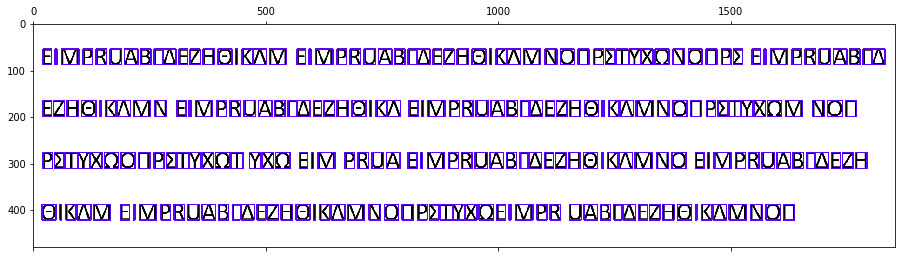

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from skimage.transform import resize

np.random.seed(42)

import warnings
warnings.filterwarnings("ignore")

#read image
img = cv2.imread('greek_alphabet2.png')

#grayscale
gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)

#binarize 
ret,thresh = cv2.threshold(gray,127,255,cv2.THRESH_BINARY_INV)

#find contours
ctrs, hier = cv2.findContours(thresh.copy(), cv2.RETR_EXTERNAL, 
cv2.CHAIN_APPROX_SIMPLE)

#sort contours
def sort_contours(contour, cols):
    tolerance_factor = 10
    origin = cv2.boundingRect(contour)
    return ((origin[1] // tolerance_factor) * tolerance_factor) * cols + origin[0]

sorted_ctrs = sorted(ctrs, key=lambda x:sort_contours(x, img.shape[1]))


segments = []
for i, ctr in enumerate(sorted_ctrs):
    # Get bounding box
    x, y, w, h = cv2.boundingRect(ctr)
    
    area = cv2.contourArea(ctr)
    if h>= 2 and w>=1:
        # Getting ROI
        roi = img[y:y+h, x:x+w]

        # show ROI
        roi = resize(roi, (28, 28, 1))
        roi = np.reshape(roi, (28,28))
        segments.append(roi)
        #cv2.imshow('charachter'+str(i), roi)
        cv2.rectangle(img,(x,y),( x + w, y + h ),(90,0,255),2)
        #print(roi.shape)

segments = np.array(segments)
print('Segments shape: ', segments.shape)

training = np.reshape(segments, (segments.shape[0], 28*28))
print('Training shape: ', training.shape)

plt.matshow(img)

In [2]:
unique_target = list('EIMPRUΑΒΓΔΕΖΗΘΙΚΛΜEIMPRUΑΒΓΔΕΖΗΘΙΚΛΜΝΟΠΡΣΤΥΧΩΝΟΠΡΣEIMPRUΑΒΓΔΕΖΗΘΙΚΛΜΝEIMPRUΑΒΓΔΕΖΗΘΙΚΛEIMPRUΑΒΓΔΕΖΗΘΙΚΛΜΝΟΠΡΣΤΥΧΩΜΝΟΠΡΣΤΥΧΩΟΠΡΣΤΥΧΩΤΥΧΩEIMPRUΑEIMPRUΑΒΓΔΕΖΗΘΙΚΛΜΝΟEIMPRUΑΒΓΔΕΖΗΘΙΚΛΜEIMPRUΑΒΓΔΕΖΗΘΙΚΛΜΝΟΠΡΣΤΥΧΩEIMPRUΑΒΓΔΕΖΗΘΙΚΛΜΝΟΠ')

train_target = []
for i in unique_target:
    train_target.append(i)
    
train_target = np.array(train_target)

print('Target shape:', train_target.shape)

Target shape: (228,)


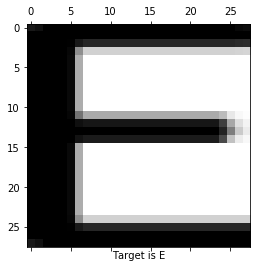

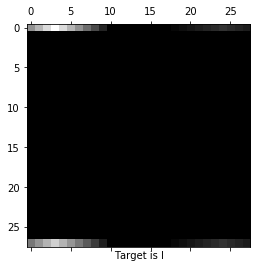

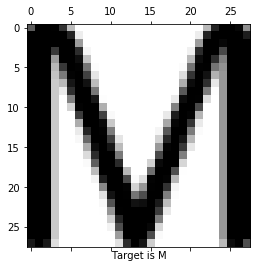

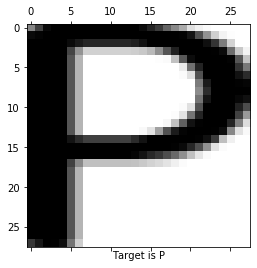

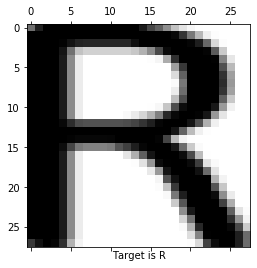

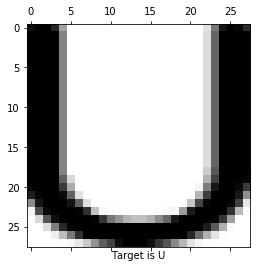

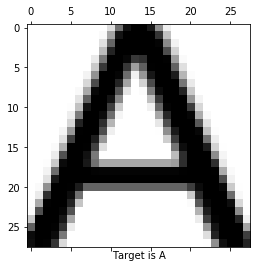

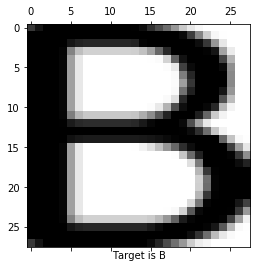

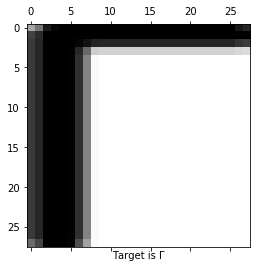

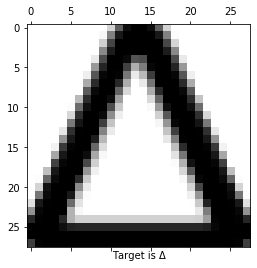

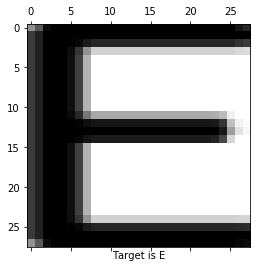

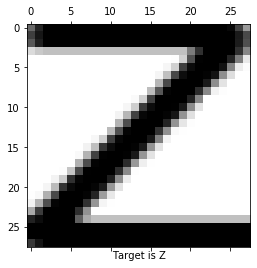

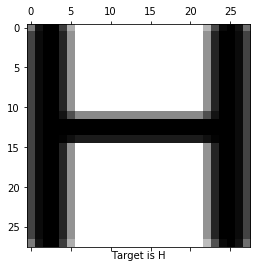

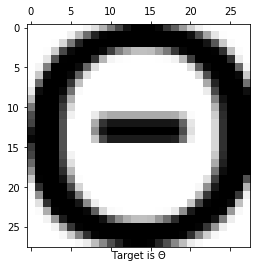

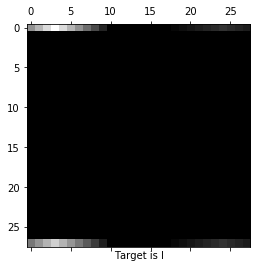

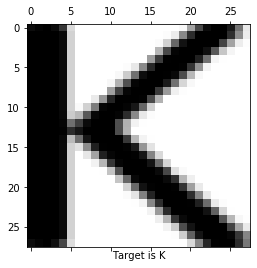

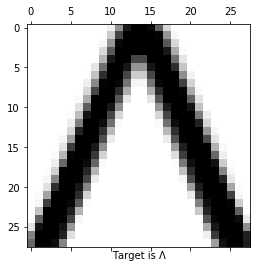

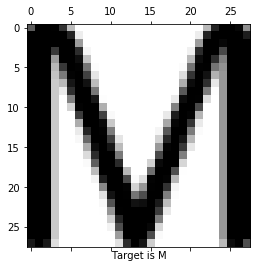

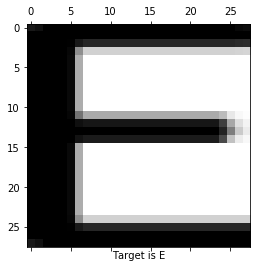

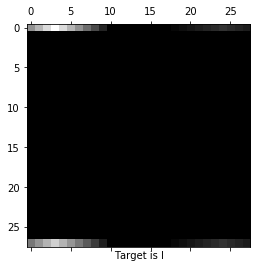

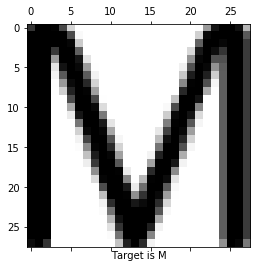

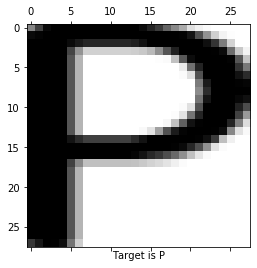

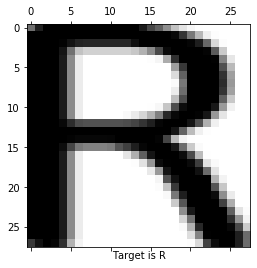

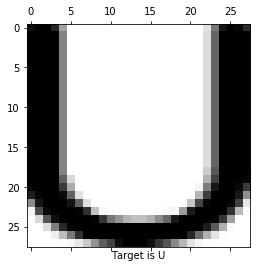

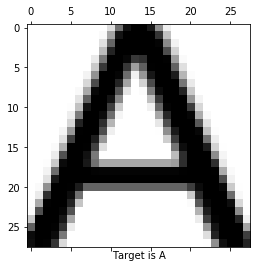

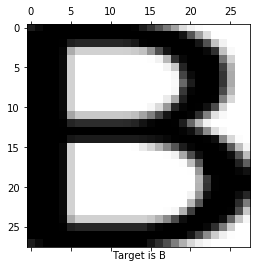

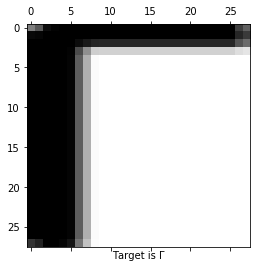

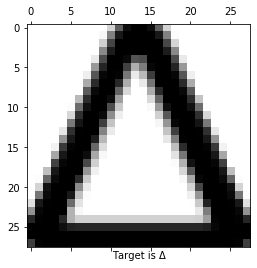

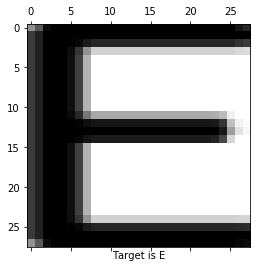

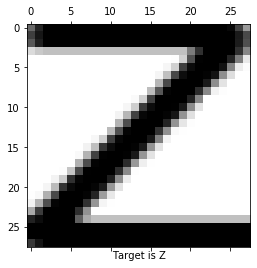

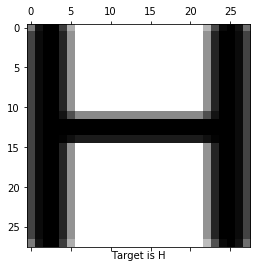

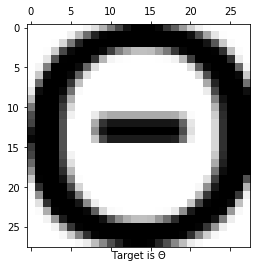

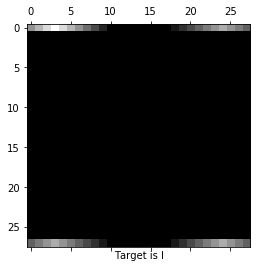

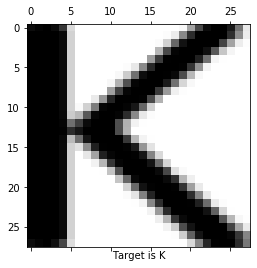

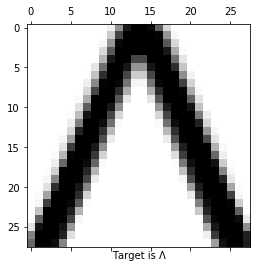

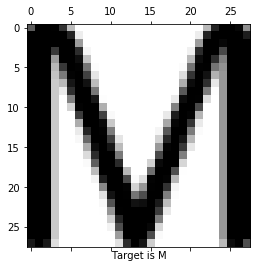

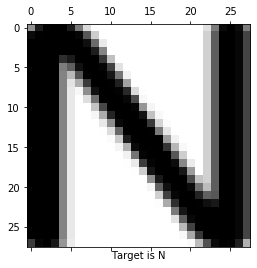

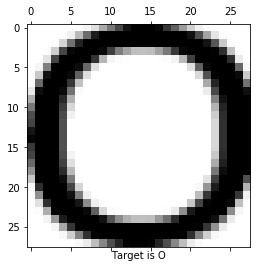

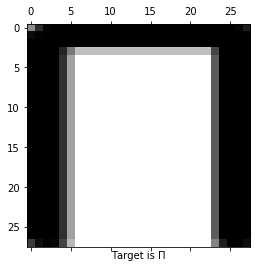

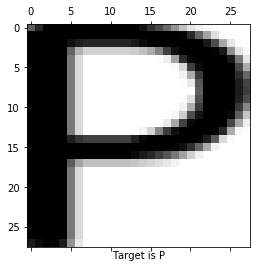

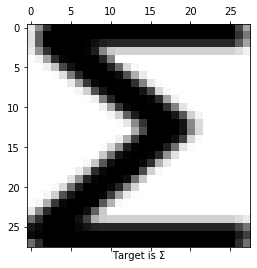

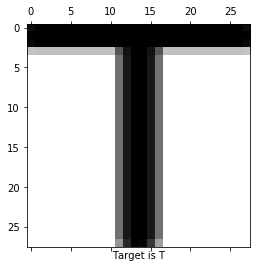

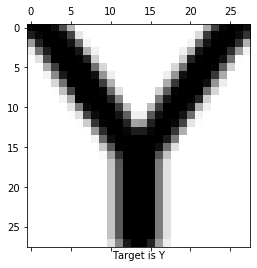

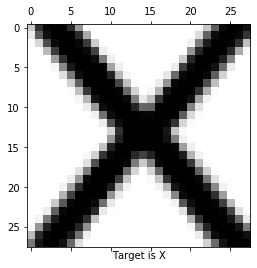

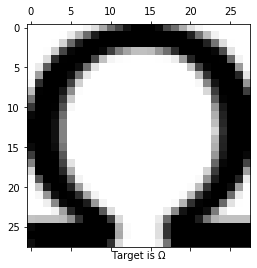

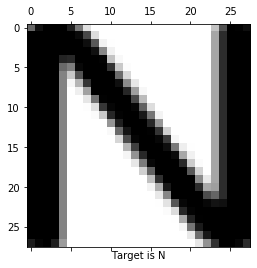

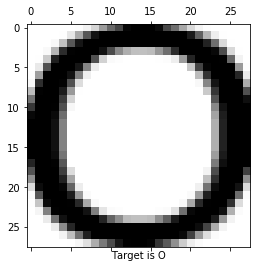

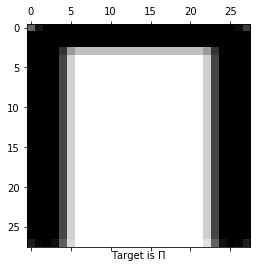

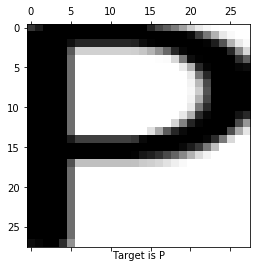

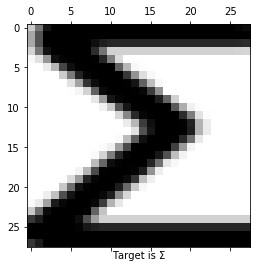

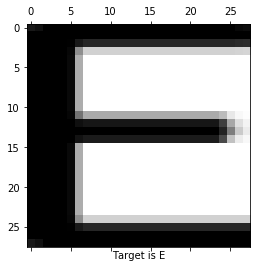

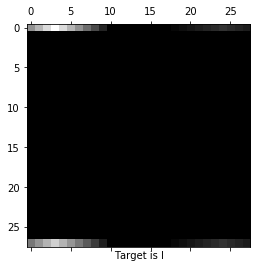

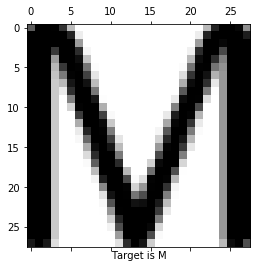

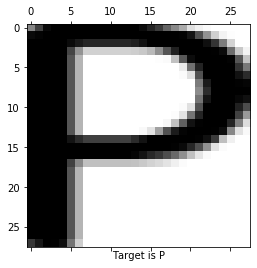

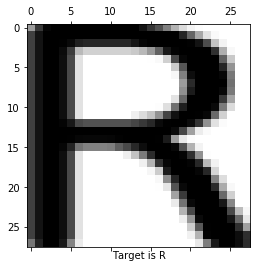

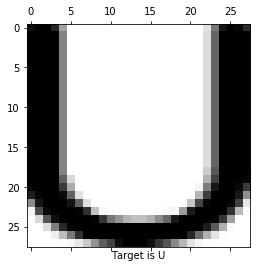

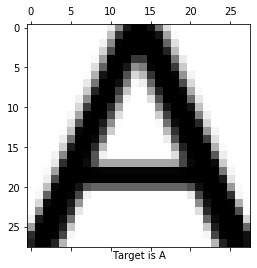

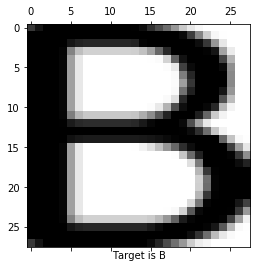

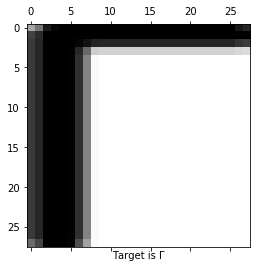

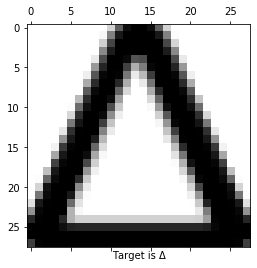

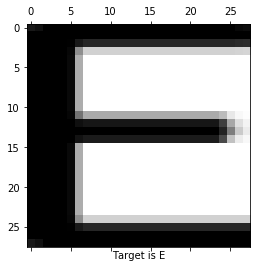

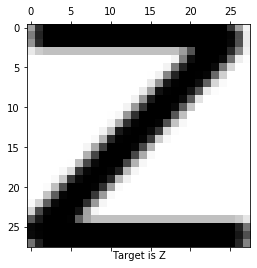

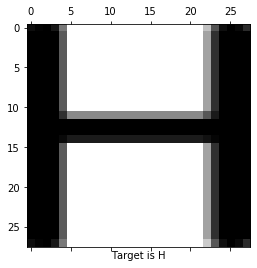

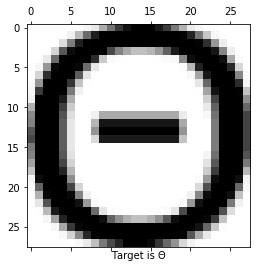

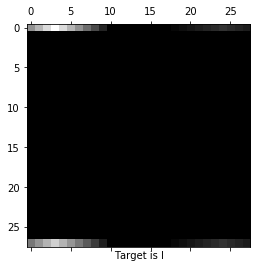

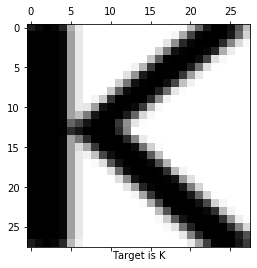

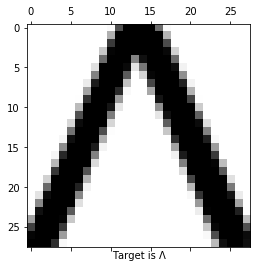

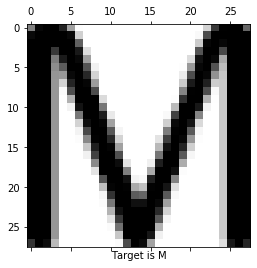

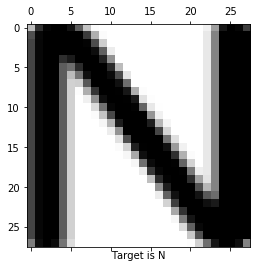

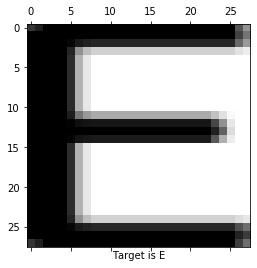

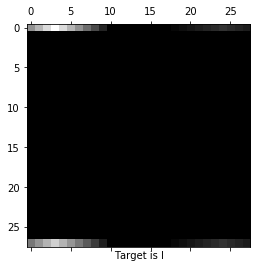

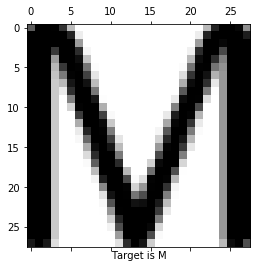

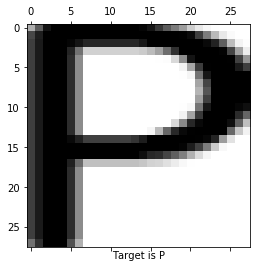

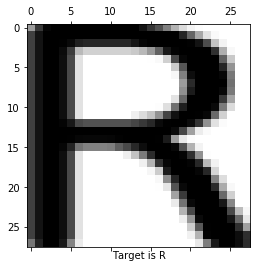

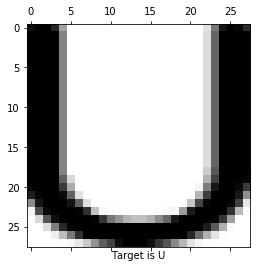

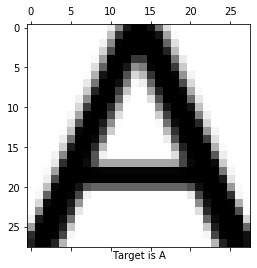

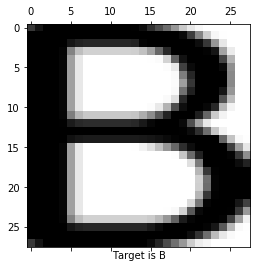

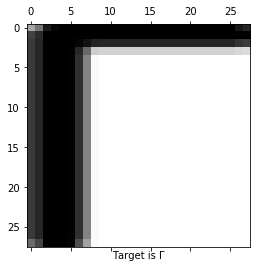

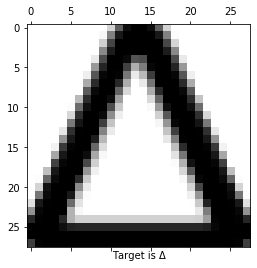

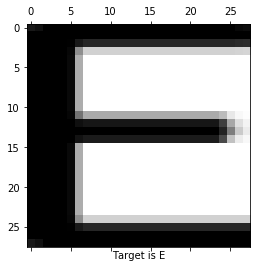

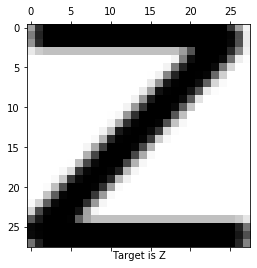

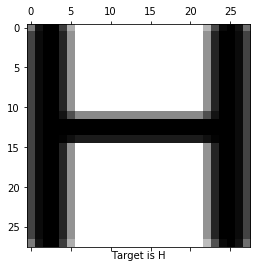

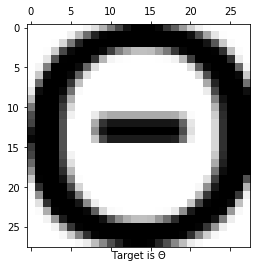

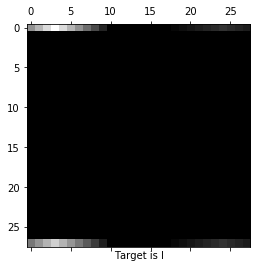

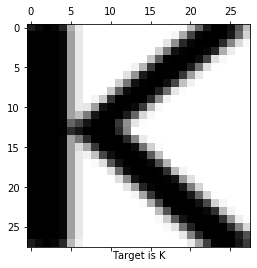

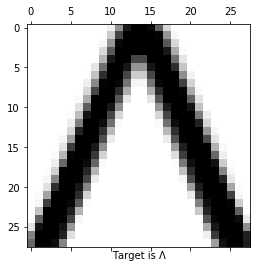

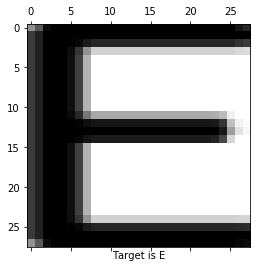

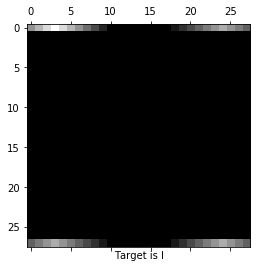

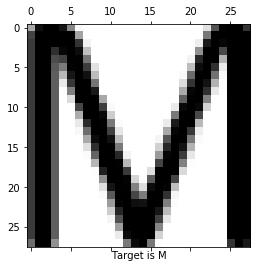

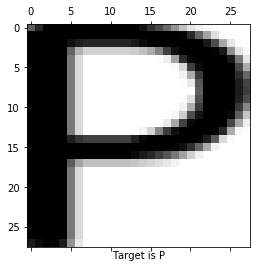

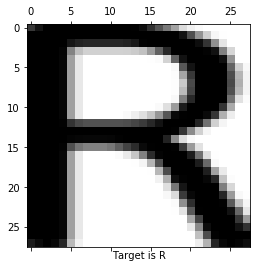

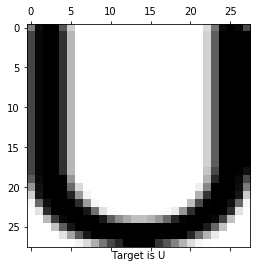

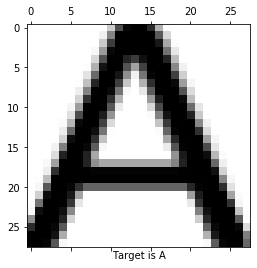

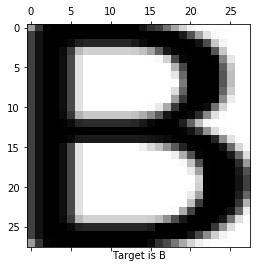

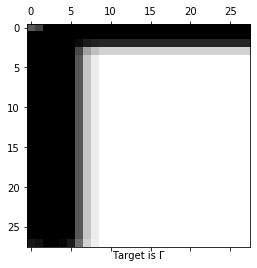

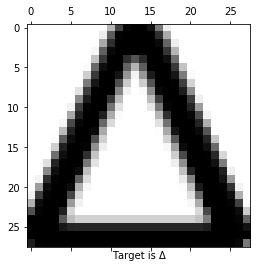

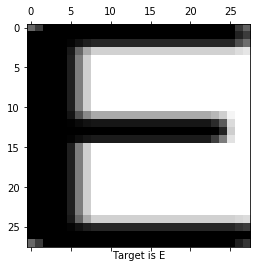

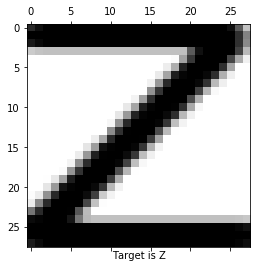

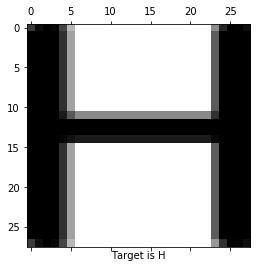

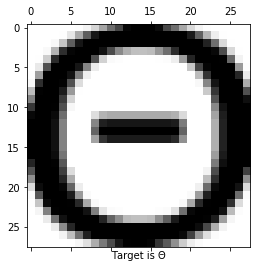

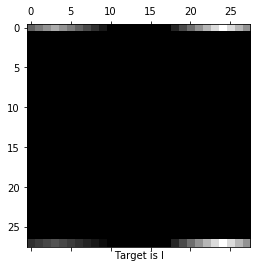

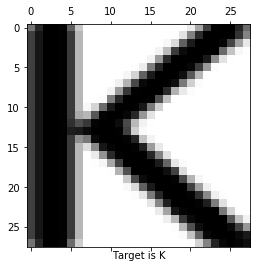

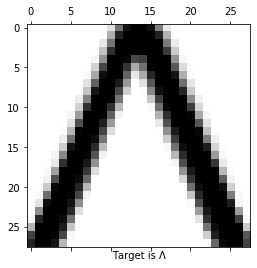

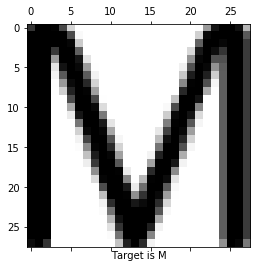

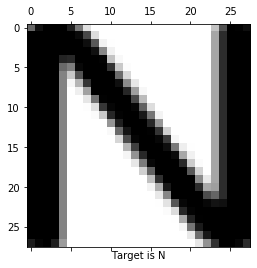

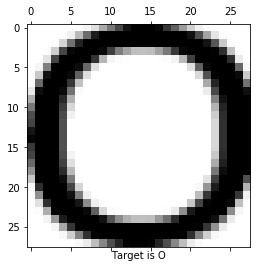

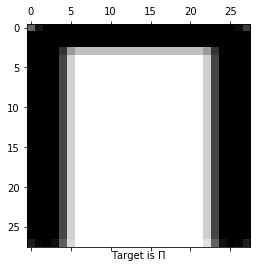

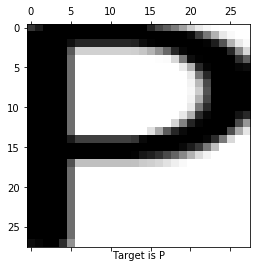

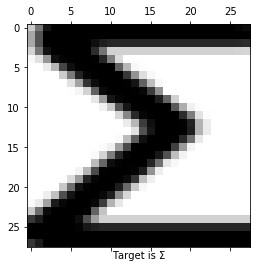

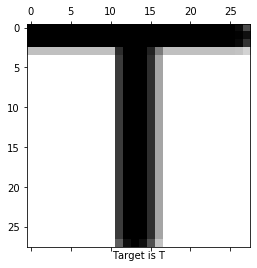

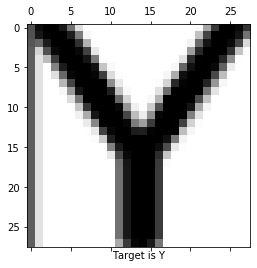

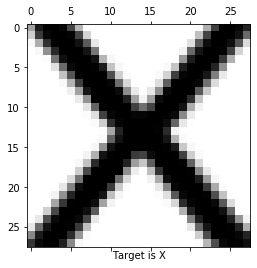

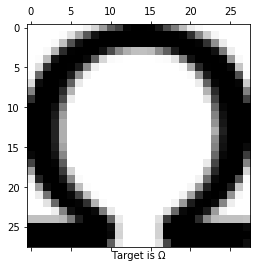

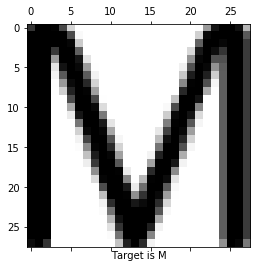

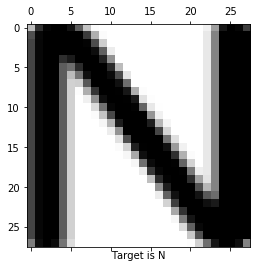

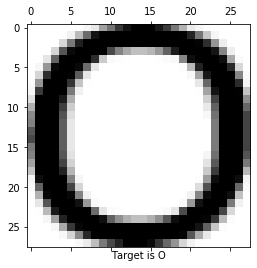

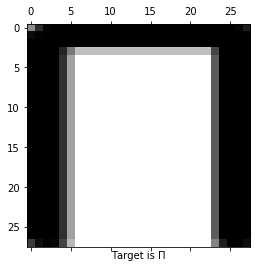

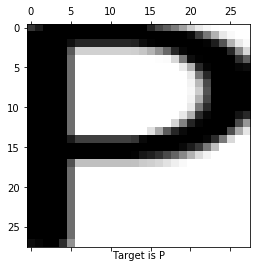

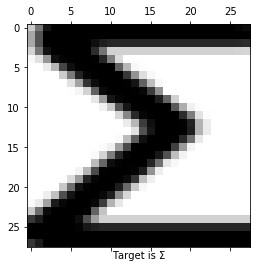

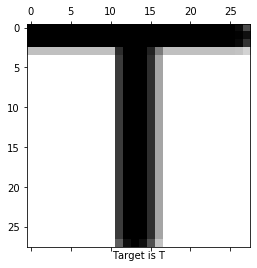

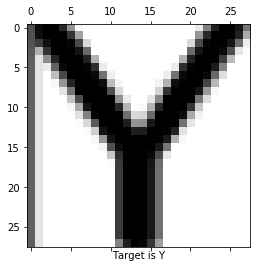

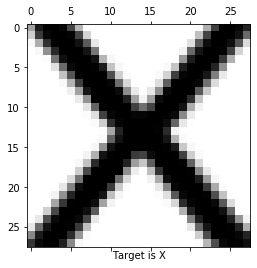

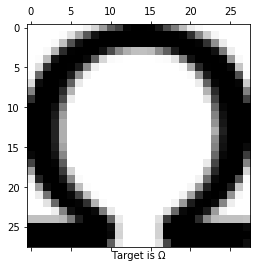

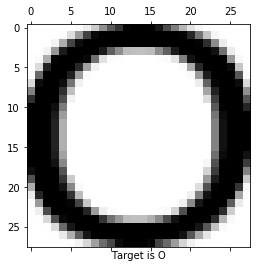

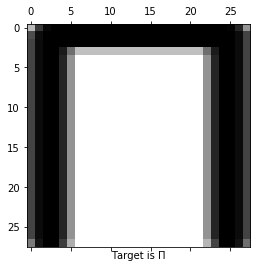

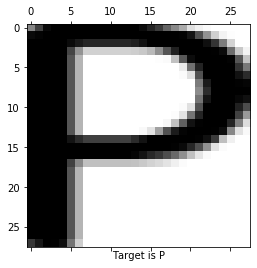

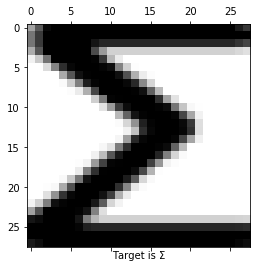

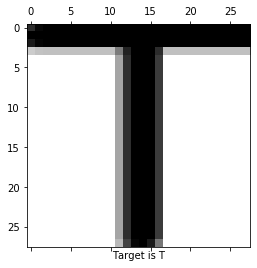

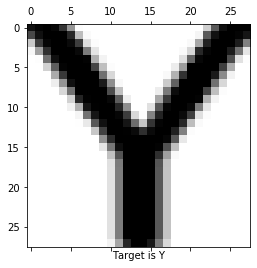

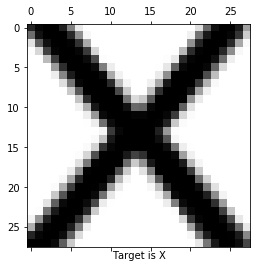

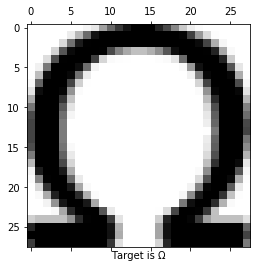

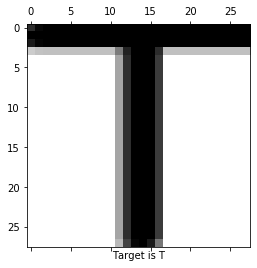

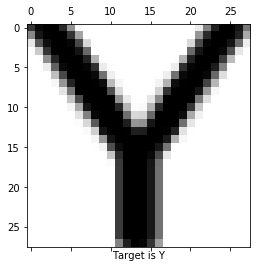

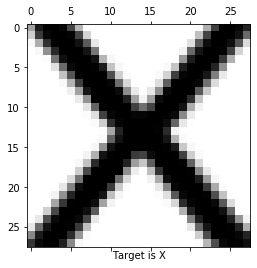

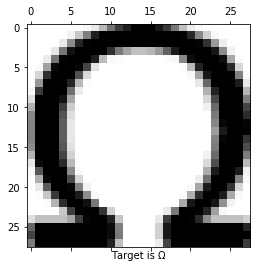

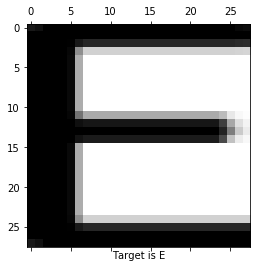

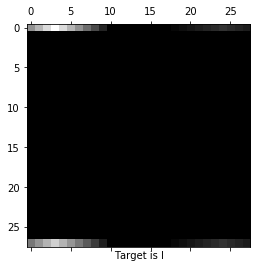

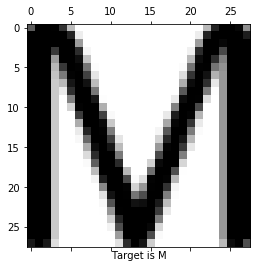

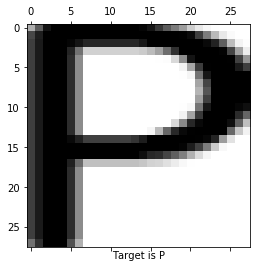

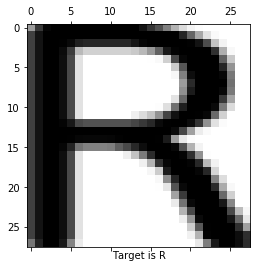

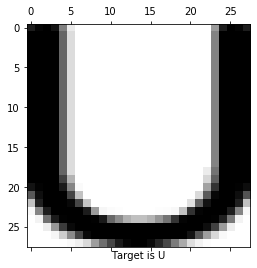

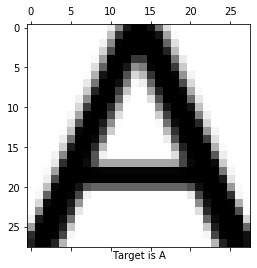

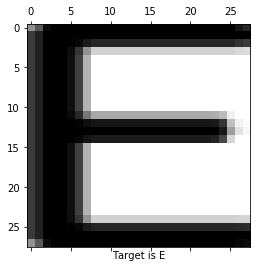

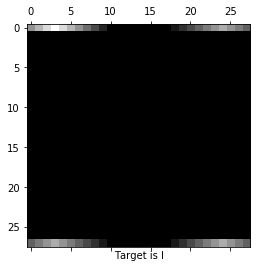

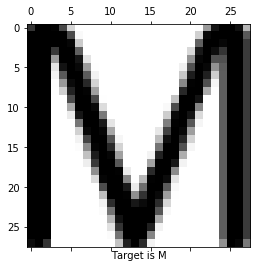

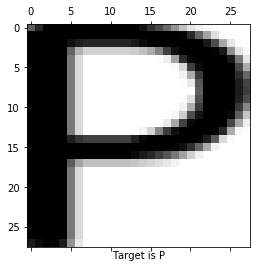

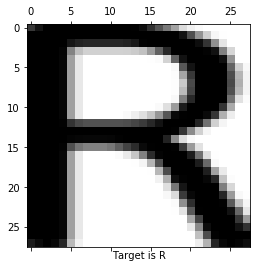

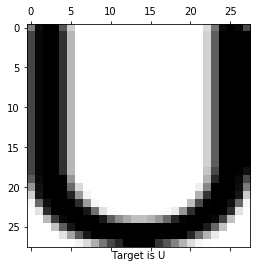

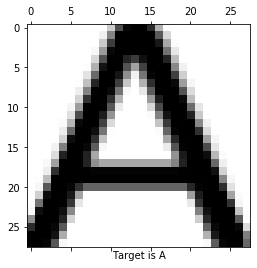

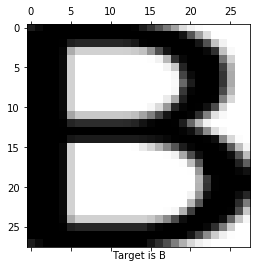

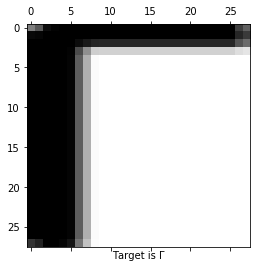

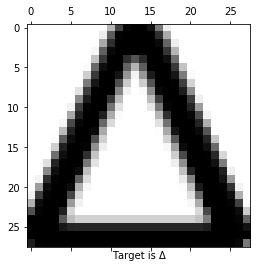

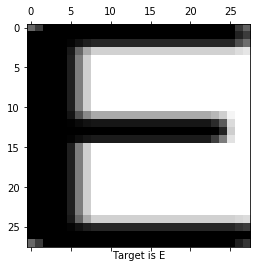

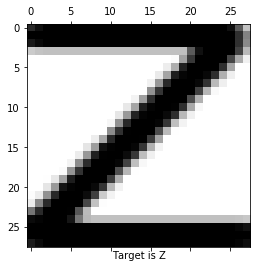

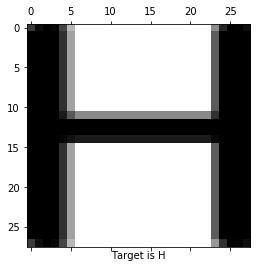

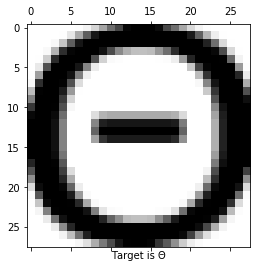

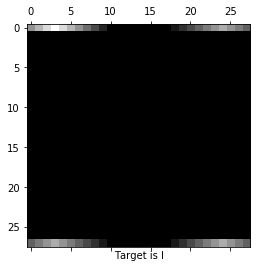

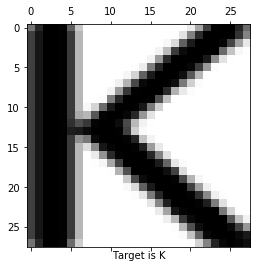

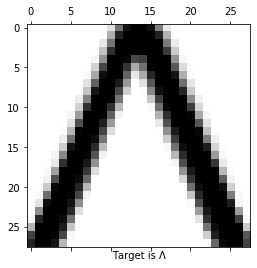

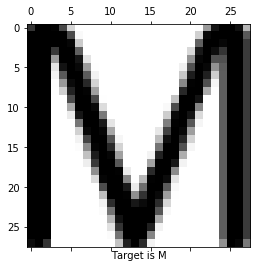

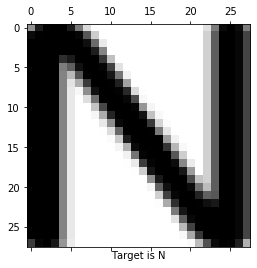

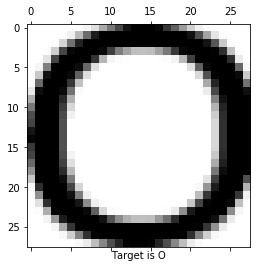

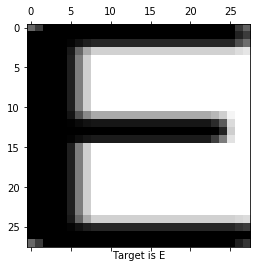

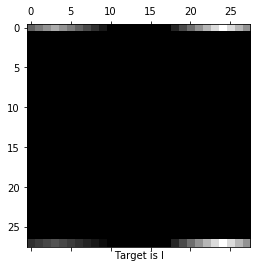

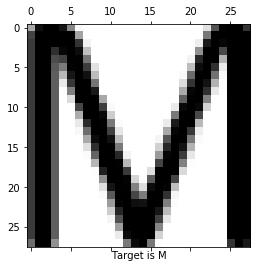

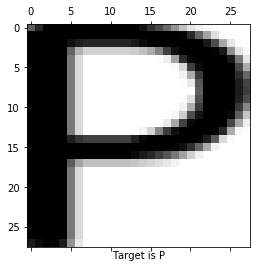

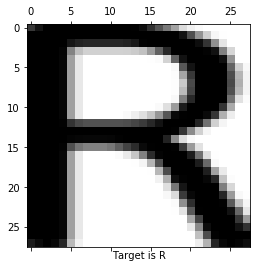

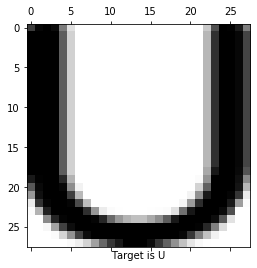

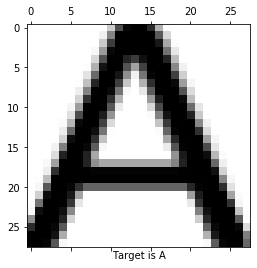

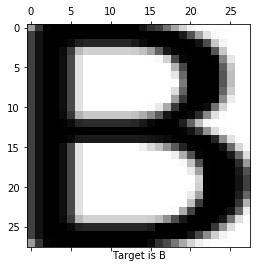

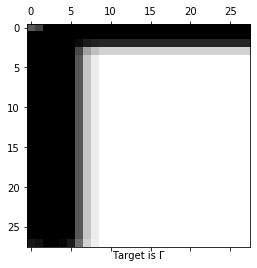

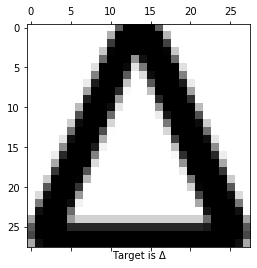

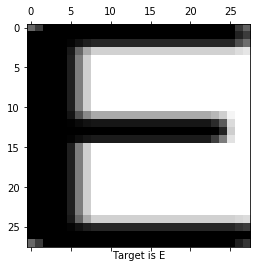

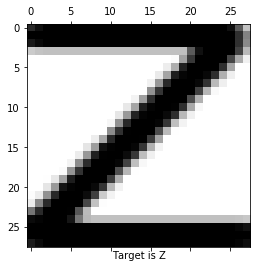

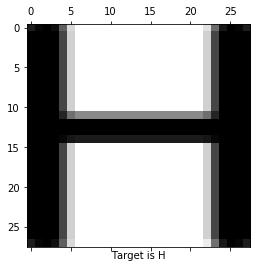

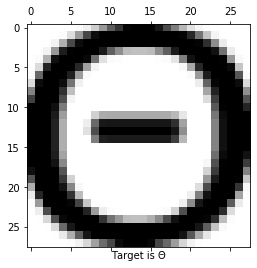

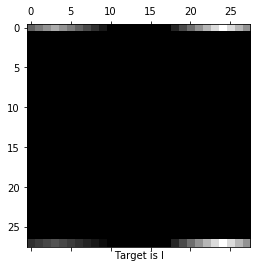

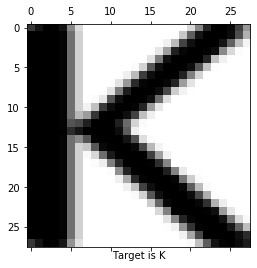

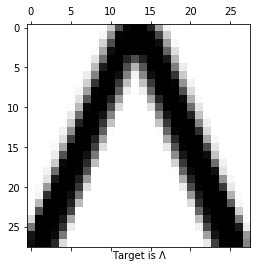

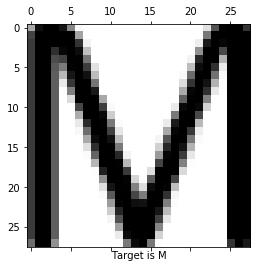

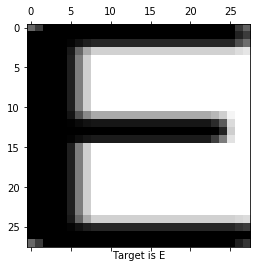

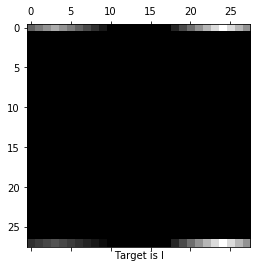

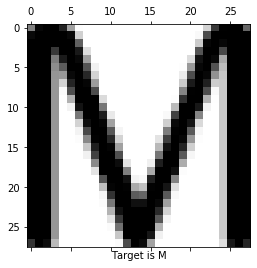

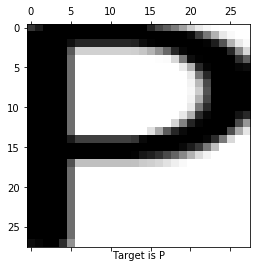

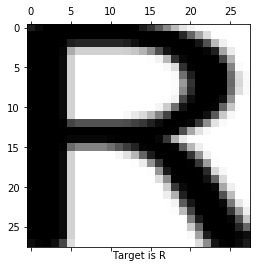

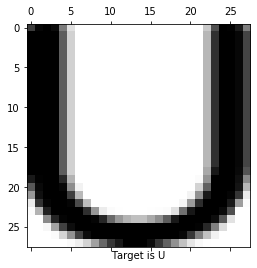

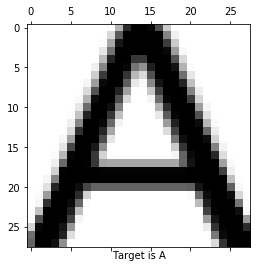

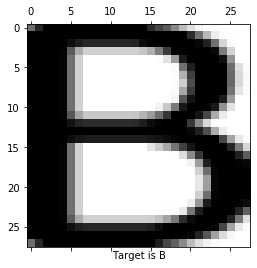

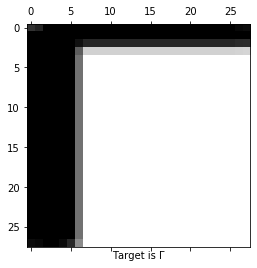

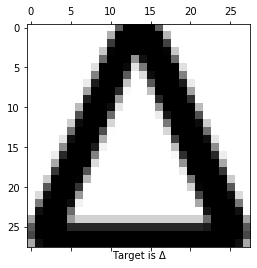

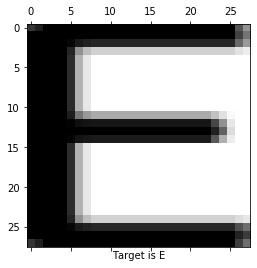

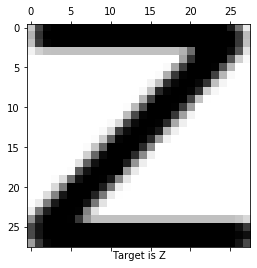

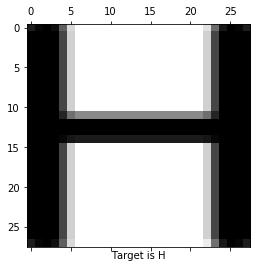

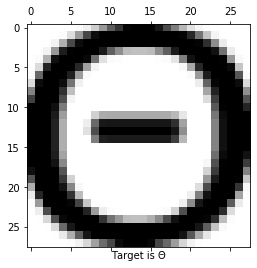

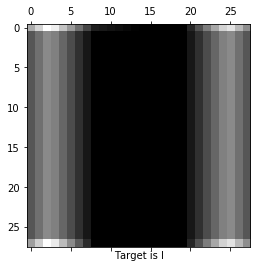

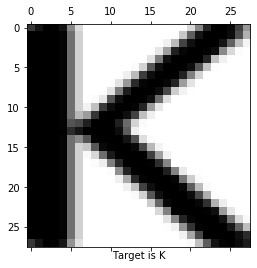

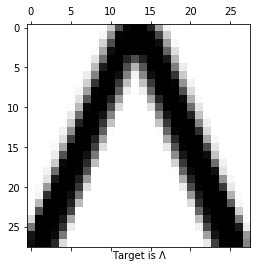

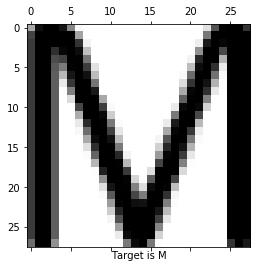

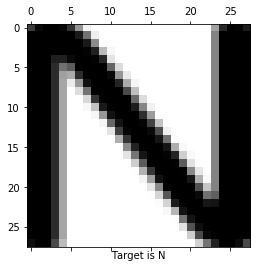

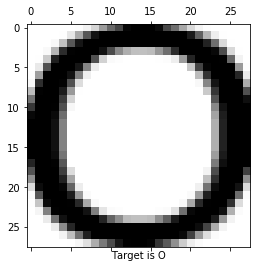

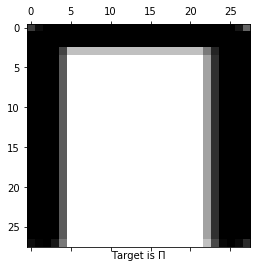

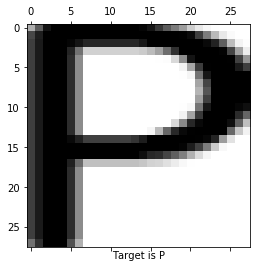

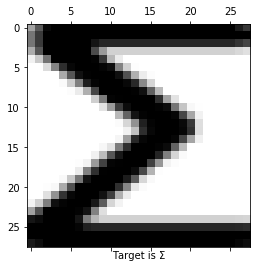

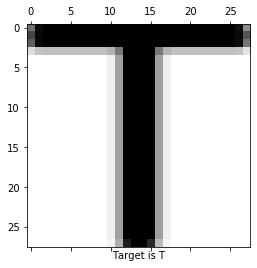

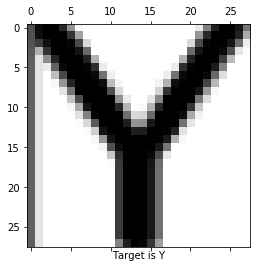

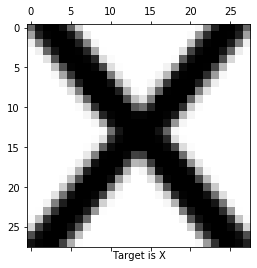

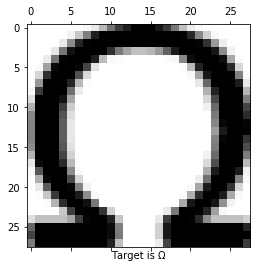

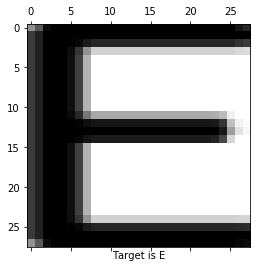

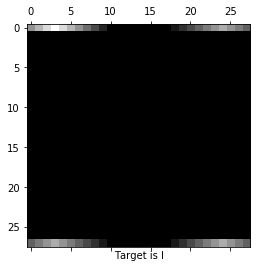

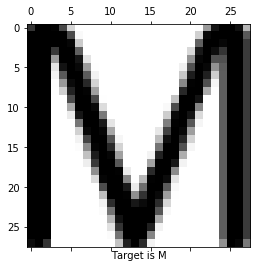

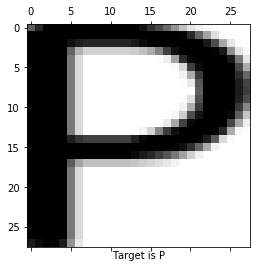

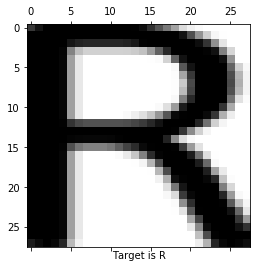

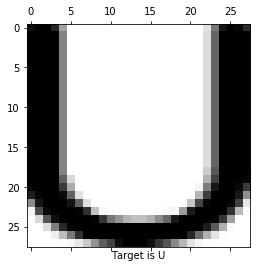

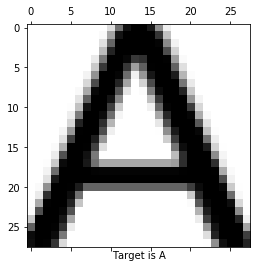

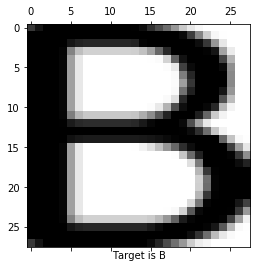

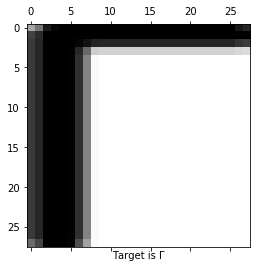

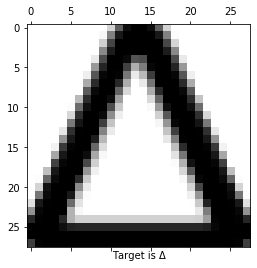

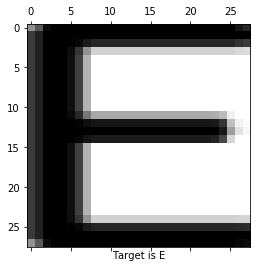

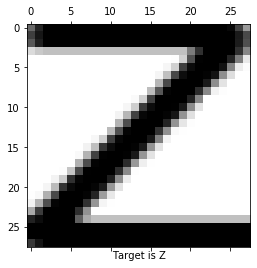

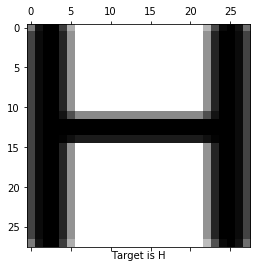

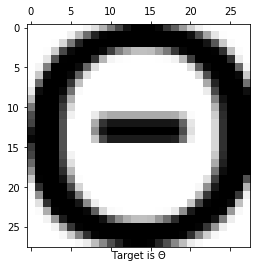

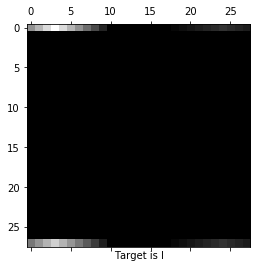

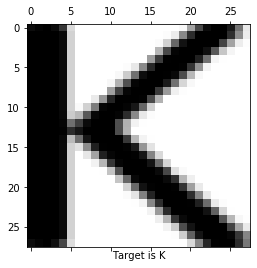

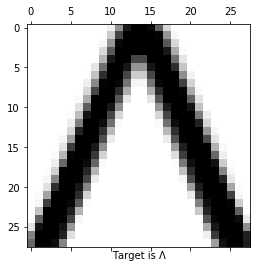

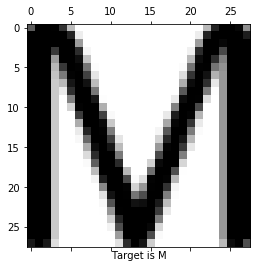

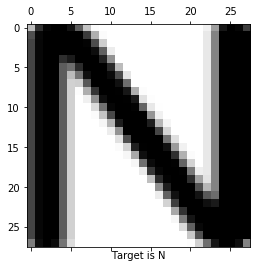

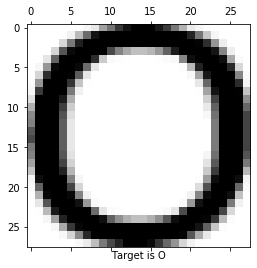

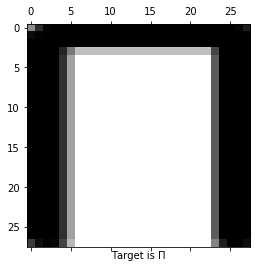

In [3]:
for i in range(0, segments.shape[0]):
    plt.matshow(segments[i], cmap = 'gray')
    plt.xlabel('Target is ' + train_target[i])

Segments shape:  (582, 28, 28)
Data shape:  (582, 784)


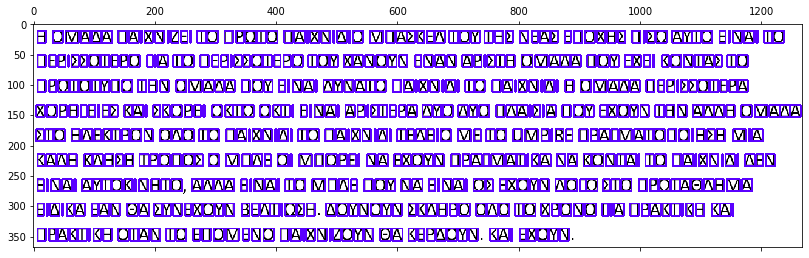

In [4]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from skimage.transform import resize

#read image
img = cv2.imread('writing_extract_greek.png')

#grayscale
gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)

#binarize 
ret,thresh = cv2.threshold(gray,127,255,cv2.THRESH_BINARY_INV)

#find contours
ctrs, hier = cv2.findContours(thresh.copy(), cv2.RETR_EXTERNAL, 
cv2.CHAIN_APPROX_SIMPLE)

#sort contours
def sort_contours(contour, cols):
    tolerance_factor = 10
    origin = cv2.boundingRect(contour)
    return ((origin[1] // tolerance_factor) * tolerance_factor) * cols + origin[0]

sorted_ctrs = sorted(ctrs, key=lambda x:sort_contours(x, img.shape[1]))

segments = []
for i, ctr in enumerate(sorted_ctrs):
    # Get bounding box
    x, y, w, h = cv2.boundingRect(ctr)
    
    area = cv2.contourArea(ctr)
    if area>= 12:
        # Getting ROI
        roi = img[y:y+h, x:x+w]

        # show ROI
        roi = resize(roi, (28, 28, 1))
        roi = np.reshape(roi, (28,28))
        segments.append(roi)
        #cv2.imshow('charachter'+str(i), roi)
        cv2.rectangle(img,(x,y),( x + w, y + h ),(90,0,255),2)
        #print(roi.shape)

segments = np.array(segments)
print('Segments shape: ', segments.shape)

test = np.reshape(segments, (segments.shape[0], 28*28))
print('Data shape: ', test.shape)

plt.matshow(img)

In [5]:
plt.rcParams["figure.figsize"] = (5,5)

In [6]:
unique_target = list('ΗΟΜΑΔΑΠΑΙΧΝΙΖΕΙΤΟΠΡΩΤΟΠΑΙΧΝΙΔΙΟΜΠΑΣΚΕΛΤΟΥΤΗΣΝΕΑΣΕΠΟΧΗΣΠΙΣΩΑΥΤΟΕΙΝΑΙΤΟΠΕΡΙΣΣΟΤΕΡΟΓΙΑΤΟΠΕΡΙΣΣΟΤΕΡΟΤΟΥΧΑΝΟΥΝΕΝΑΝΑΡΙΣΤΗΟΜΑΔΑΠΟΥΕΧΕΙΚΟΝΤΑΣΤΟΠΡΩΤΟΤΥΠΟΤΗΝΟΜΑΔΑΠΟΥΕΙΝΑΙΔΥΝΑΤΟΠΑΙΧΝΙΔΙΤΟΠΑΙΧΝΙΔΙΗΟΜΑΔΑΠΕΡΙΣΣΟΤΕΡΑΧΟΡΗΓΕΙΕΣΚΑΙΣΚΟΡΕΙΟΚΤΩΟΚΤΙΕΙΝΑΙΑΡΙΣΤΕΡΑΔΥΟΔΥΟΠΛΑΙΣΙΑΠΟΥΕΧΟΥΝΤΗΝΑΛΛΗΟΜΑΔΑΣΤΟΗΛΕΚΤΡΟΝΟΛΟΤΟΠΑΙΧΝΙΔΙΤΟΠΑΙΧΝΙΔΙΤΕΛΕΙΟΜΕΤΟUMPIREΠΡΑΓΜΑΤΟΠΟΙΗΣΗΜΙΑΚΑΛΗΚΛΗΣΗΤΡΟΠΟΣΟΜΠΛΕΟΙΜΠΟΡΕΙΝΑΕΧΟΥΝΠΡΑΓΜΑΤΙΚΑΝΑΚΟΝΤΑΙΤΟΠΑΙΧΝΙΔΙΔΕΝΕΙΝΑΙΑΥΤΟΚΙΝΗΤΟΑΛΛΑΕΙΝΑΙΤΟΜΠΛΕΠΟΥΝΑΕΙΝΑΙΩΣΕΧΟΥΝΛΟΓΩΣΤΟΠΡΩΤΑΘΛΗΜΑΕΙΔΙΚΑΕΑΝΘΑΣΥΝΕΧΟΥΝΒΕΛΤΙΩΣΗΔΟΥΝΟΥΝΣΚΛΗΡΟΟΛΟΤΟΧΡΟΝΟΓΙΑΠΡΑΚΤΙΚΗΚΑΙΠΡΑΚΤΙΚΗΟΤΑΝΤΟΕΠΟΜΕΝΟΠΑΙΧΝΙΖΟΥΝΘΑΚΕΡΔΟΥΝΚΑΙΕΧΟΥΝ')

test_target = []
for i in unique_target:
    test_target.append(i)
    
test_target = np.array(test_target)

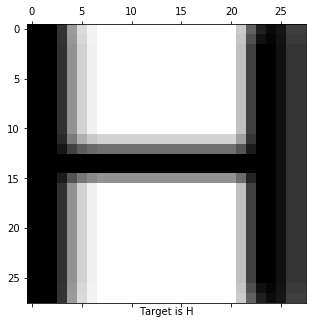

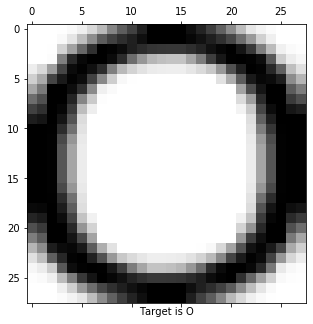

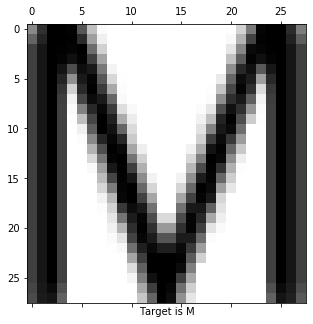

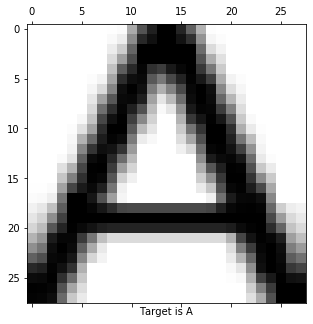

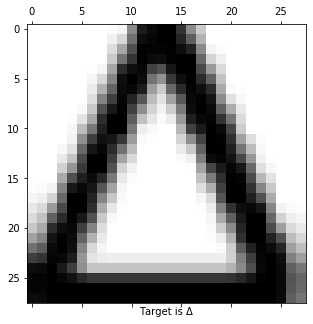

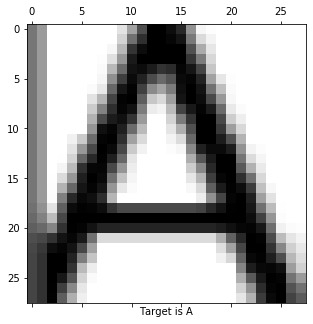

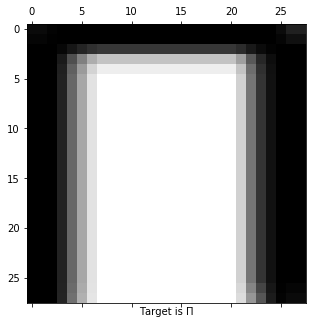

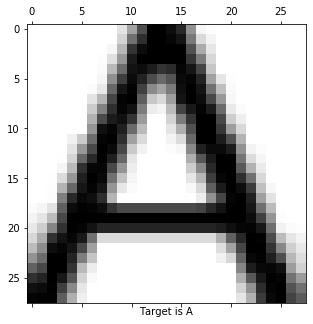

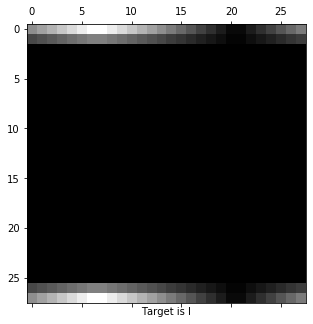

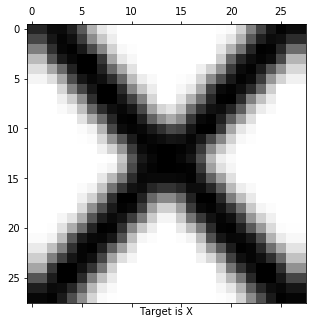

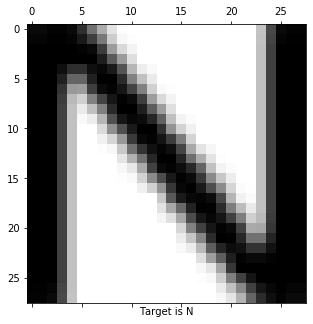

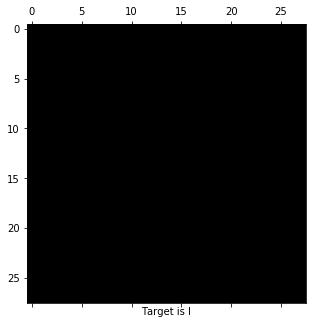

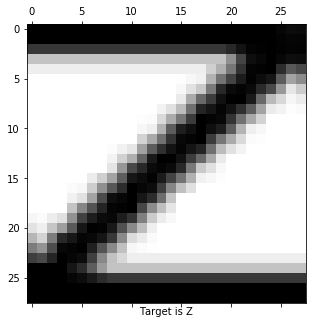

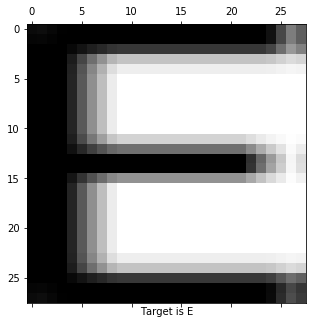

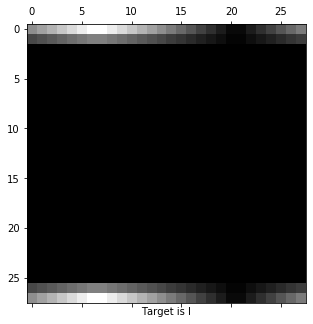

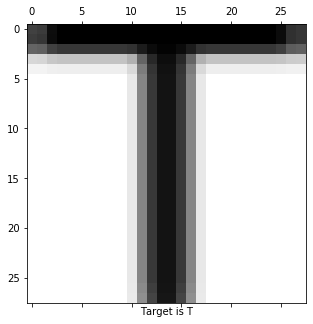

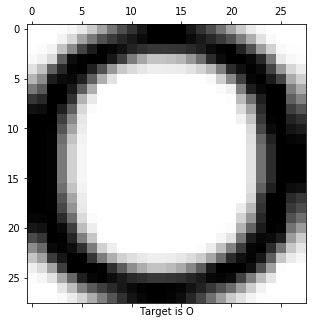

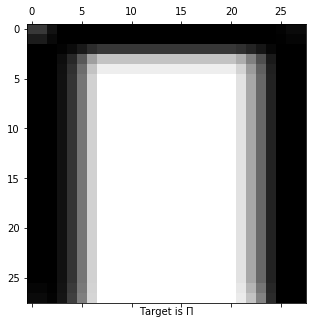

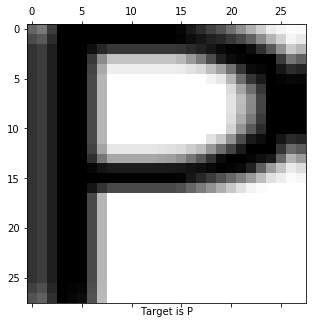

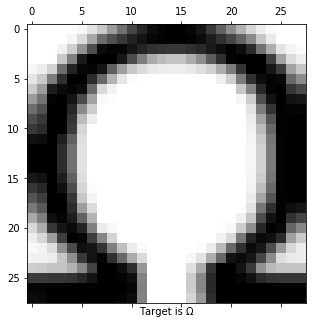

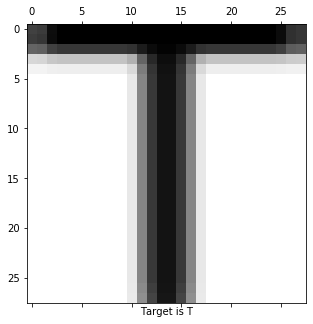

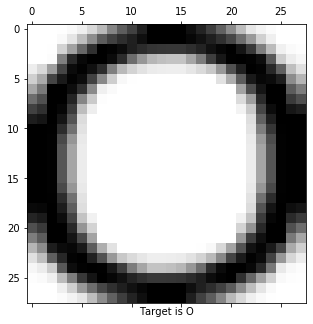

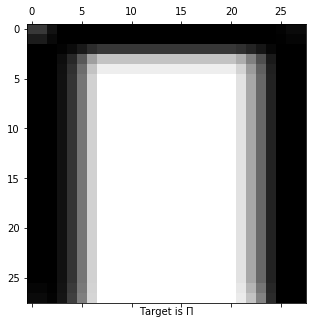

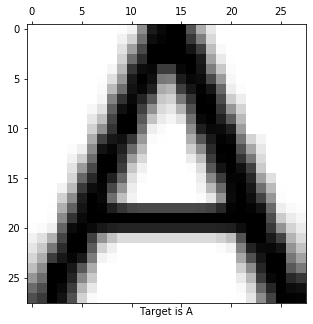

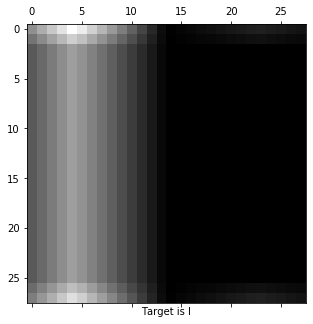

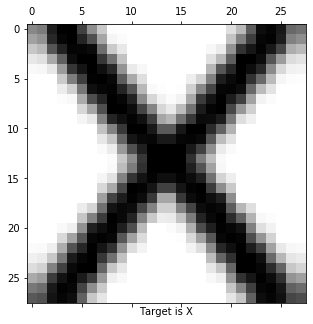

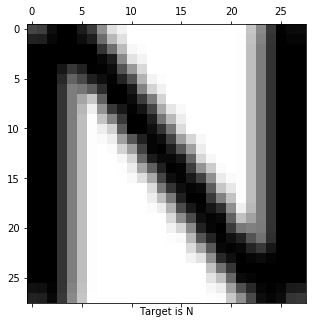

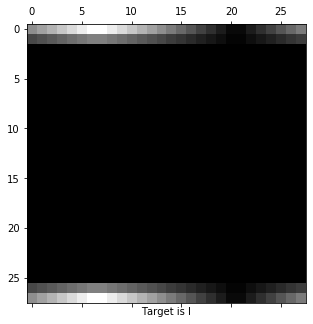

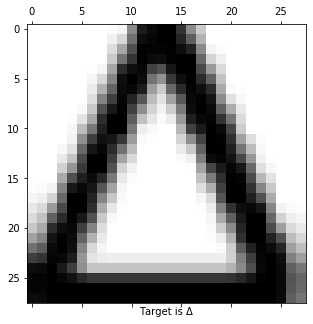

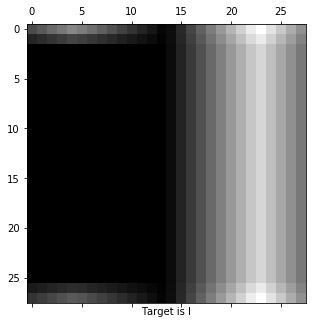

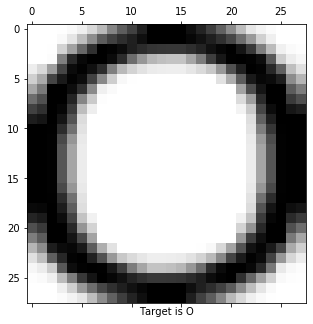

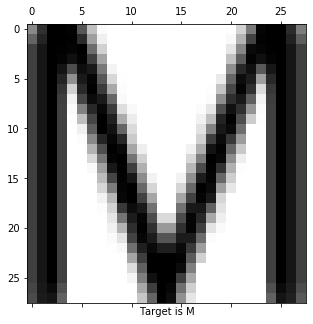

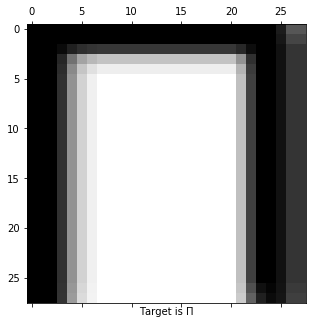

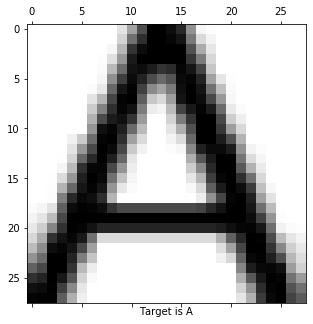

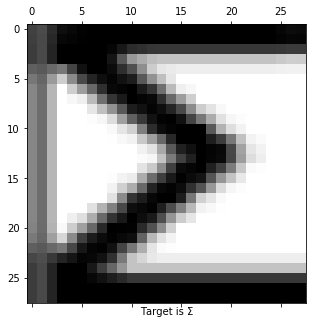

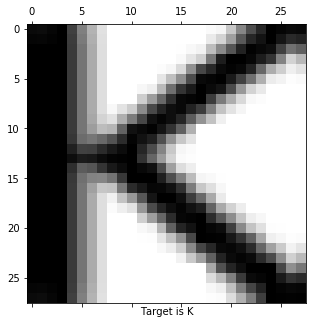

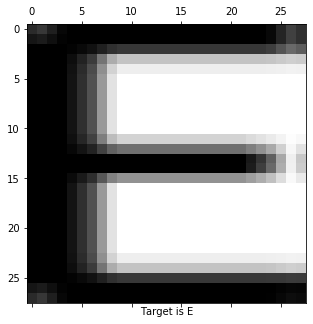

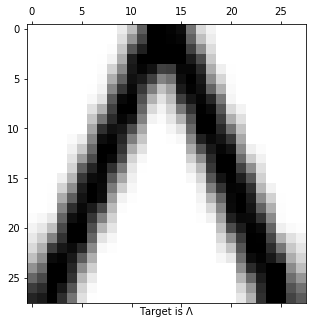

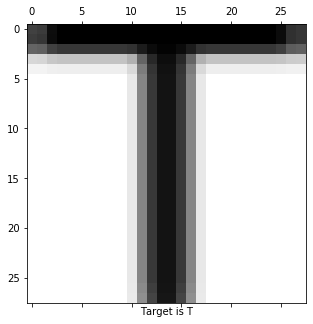

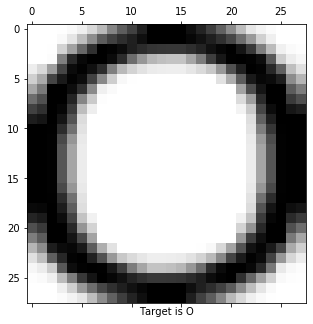

In [7]:
for i in range(0, 40):
    plt.matshow(segments[i], cmap = 'gray')
    plt.xlabel('Target is ' + test_target[i])

In [8]:
n_samples = len(test)

In [9]:
X_train = training
y_train = train_target
X_val = test[:round(.8 * n_samples)]
y_val = test_target[:round(.8 * n_samples)]
X_test = test[round(.8 * n_samples):]
y_test = test_target[round(.8 * n_samples):]

In [10]:
from sklearn.neighbors import KNeighborsClassifier

knn_clf = KNeighborsClassifier(n_jobs=-1, weights='distance', n_neighbors=5)
knn_clf.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=5, p=2,
                     weights='distance')

In [11]:
from sklearn.metrics import confusion_matrix

y_val_pred = knn_clf.predict(X_val)
c_matrix = confusion_matrix(y_val, y_val_pred)

## Evaluation

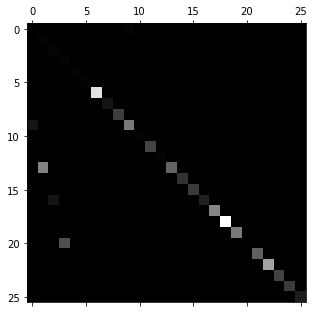

In [12]:
plt.matshow(c_matrix, cmap=plt.cm.gray)
plt.show()

In [13]:
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score, hamming_loss
from sklearn.metrics import classification_report

print("Precision: " + str(precision_score(y_val, y_val_pred, average = 'micro')))
print("Recall: " + str(recall_score(y_val, y_val_pred, average = 'micro')))
print("F1 Score: " + str(f1_score(y_val, y_val_pred, average = 'micro')))
print("Hamming Loss: " + str(hamming_loss(y_val, y_val_pred)))
print("Accuracy Score: " + str(accuracy_score(y_val, y_val_pred)))

#Checking performance our model with classification report.
print(classification_report(y_val, y_val_pred))

Precision: 0.869098712446352
Recall: 0.869098712446352
F1 Score: 0.869098712446352
Hamming Loss: 0.13090128755364808
Accuracy Score: 0.869098712446352
              precision    recall  f1-score   support

           E       0.00      0.00      0.00         1
           I       0.03      1.00      0.06         1
           M       0.17      1.00      0.29         1
           P       0.05      1.00      0.10         1
           R       1.00      1.00      1.00         1
           U       1.00      1.00      1.00         1
           Α       1.00      1.00      1.00        54
           Γ       1.00      1.00      1.00         5
           Δ       1.00      1.00      1.00        15
           Ε       0.97      0.85      0.91        34
           Ζ       1.00      1.00      1.00         1
           Η       1.00      1.00      1.00        16
           Θ       1.00      1.00      1.00         1
           Ι       1.00      0.44      0.61        55
           Κ       1.00      1.00     

### ROC Curve

In [14]:
import numpy as np
import matplotlib.pyplot as plt
from itertools import cycle

from sklearn import svm, datasets
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier
from scipy import interp
from sklearn.metrics import roc_auc_score

In [15]:
# Binarize the output
bin_y_train = label_binarize(y_train, classes=list(np.unique(y_train)))

In [16]:
# Binarize the output
bin_y_val = label_binarize(y_val, classes=list(np.unique(y_val)))
n_classes = bin_y_val.shape[1]

In [17]:
# Learn to predict each class against the other
classifier = OneVsRestClassifier(KNeighborsClassifier(n_jobs=-1, weights='distance', n_neighbors=5))
y_roc = classifier.fit(X_val, y_val).predict_proba(X_val)

In [18]:
# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(bin_y_val[:, i], y_roc[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(bin_y_val.ravel(), y_roc.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

No handles with labels found to put in legend.


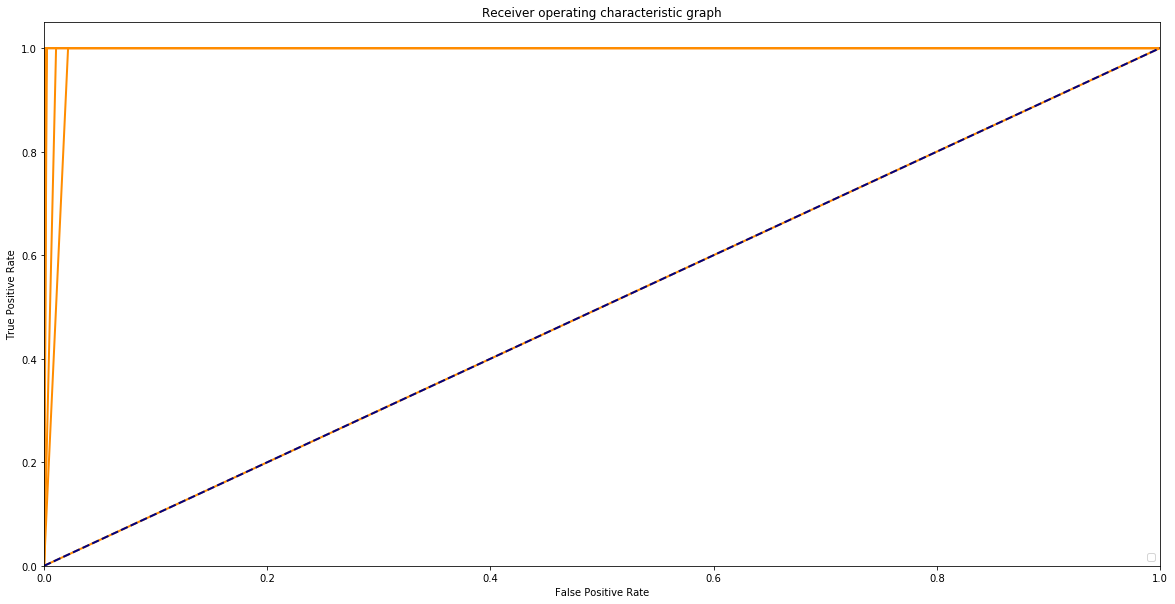

In [19]:
plt.figure(figsize = (20,10))
lw = 2
for i in range(n_classes):
    plt.plot(fpr[i], tpr[i], color='darkorange',
             lw=lw)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic graph')
plt.legend(loc="lower right")
plt.show()

No handles with labels found to put in legend.


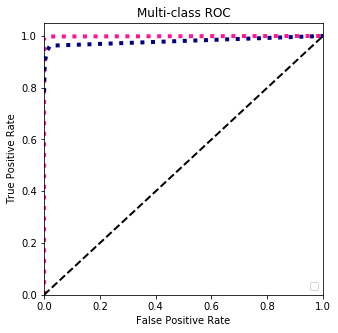

In [20]:
# First aggregate all false positive rates
all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))

# Then interpolate all ROC curves at this points
mean_tpr = np.zeros_like(all_fpr)
for i in range(n_classes):
    mean_tpr += interp(all_fpr, fpr[i], tpr[i])

# Finally average it and compute AUC
mean_tpr /= n_classes

fpr["macro"] = all_fpr
tpr["macro"] = mean_tpr
roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

# Plot all ROC curves
plt.figure()
plt.plot(fpr["micro"], tpr["micro"],
               ''.format(roc_auc["micro"]),
         color='deeppink', linestyle=':', linewidth=4)

plt.plot(fpr["macro"], tpr["macro"],
               ''.format(roc_auc["macro"]),
         color='navy', linestyle=':', linewidth=4)

plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Multi-class ROC')
plt.legend(loc="lower right")
plt.show()

# Hyper parameter tuning

In [21]:
accuracy = []
error = []
for i in range(1,30):
    knn_clf_loop = KNeighborsClassifier(n_jobs=-1, weights='distance', n_neighbors=i)
    knn_clf_loop.fit(X_train, y_train)

    y_val_pred = knn_clf_loop.predict(X_val)
    score = accuracy_score(y_val, y_val_pred)
    loss = hamming_loss(y_val, y_val_pred)
    accuracy.append(score)
    error.append(loss)

Text(0.5, 1.0, 'Accuracy changes when K is increased')

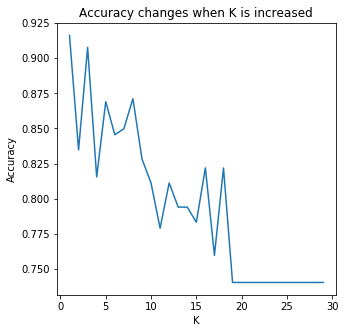

In [22]:
#plotting accuracy
plt.plot(list(range(1,30)), accuracy)
plt.xlabel('K')
plt.ylabel('Accuracy')
plt.title('Accuracy changes when K is increased')

Text(0.5, 1.0, 'Loss changes when K is increased')

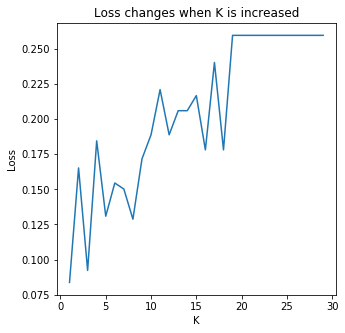

In [23]:
# plotting error
plt.plot(list(range(1,30)), error)
plt.xlabel('K')
plt.ylabel('Loss')
plt.title('Loss changes when K is increased')

In [24]:
from sklearn.model_selection import GridSearchCV

In [25]:
#List Hyperparameters that we want to tune.
leaf_size = list(range(1,50, 10))
p=[1,2]

In [26]:
hyperparameters = dict(leaf_size=leaf_size, p=p)
KNN = KNeighborsClassifier()

In [27]:
clf = GridSearchCV(KNN, hyperparameters, scoring='accuracy', cv=5)

In [28]:
best_classifier= clf.fit(X_val, y_val)

In [29]:
#clf.best_params_
print('Best leaf_size:', best_classifier.best_estimator_.get_params()['leaf_size'])
print('Best p:', best_classifier.best_estimator_.get_params()['p'])

Best leaf_size: 1
Best p: 1


## Final prediction

#### Using the best params

In [30]:
knn_clf = KNeighborsClassifier(n_jobs=-1, weights='distance', n_neighbors=3, p= 1, leaf_size =1)
knn_clf.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=1, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=3, p=1,
                     weights='distance')

In [31]:
y_pred = knn_clf.predict(test)

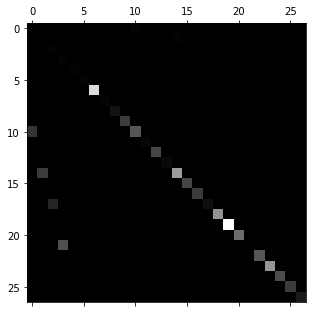

In [32]:
plt.matshow(confusion_matrix(test_target, y_pred), cmap=plt.cm.gray)

In [33]:
print("Precision: " + str(precision_score(test_target, y_pred, average = 'micro')))
print("Recall: " + str(recall_score(test_target, y_pred, average = 'micro')))
print("F1 Score: " + str(f1_score(test_target, y_pred, average = 'micro')))
print("Hamming Loss: " + str(hamming_loss(test_target, y_pred)))
print("Accuracy Score: " + str(accuracy_score(test_target, y_pred)))

Precision: 0.8780068728522337
Recall: 0.8780068728522337
F1 Score: 0.8780068728522337
Hamming Loss: 0.12199312714776632
Accuracy Score: 0.8780068728522337


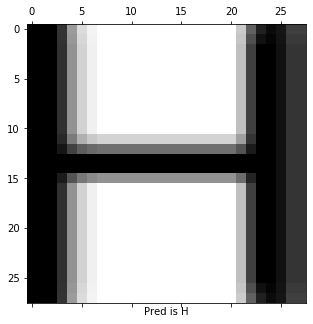

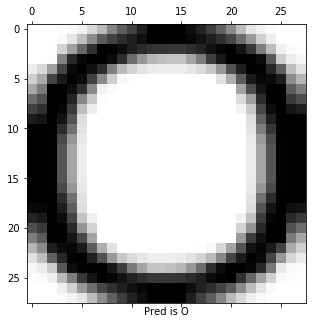

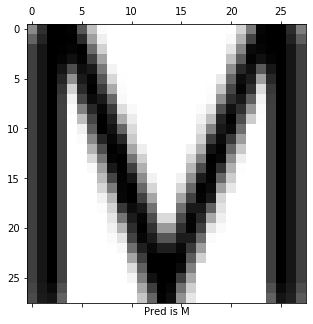

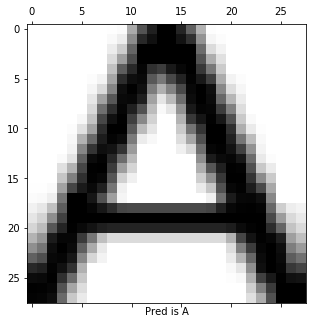

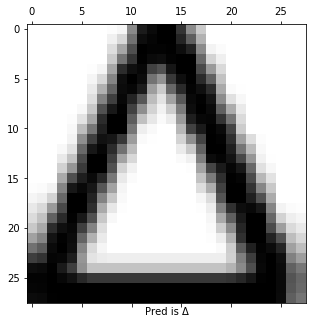

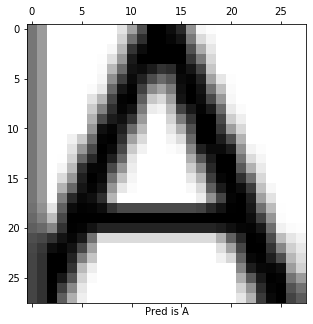

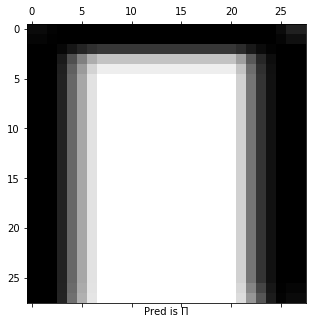

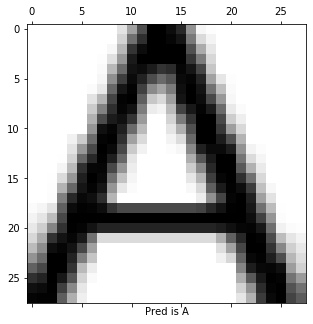

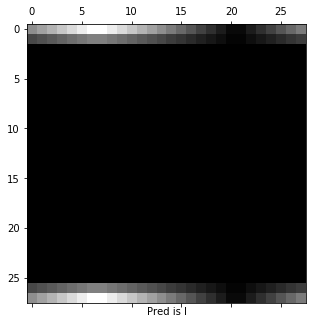

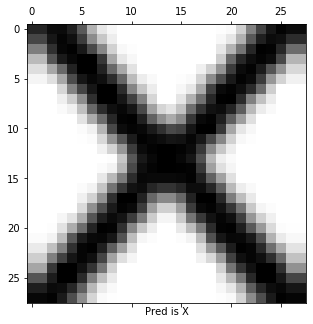

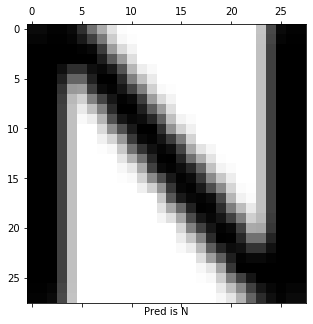

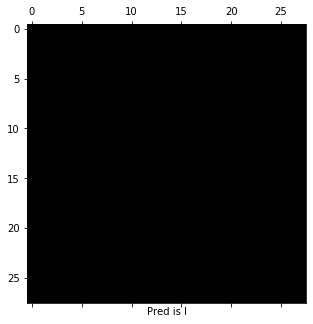

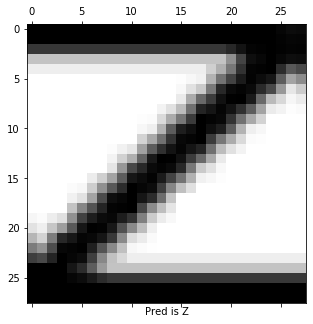

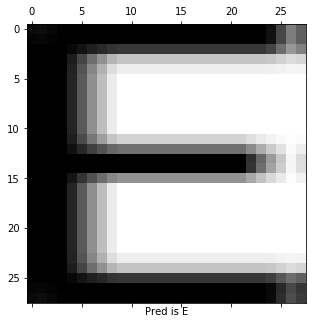

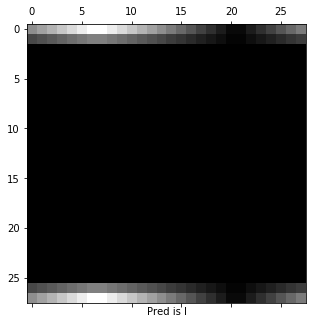

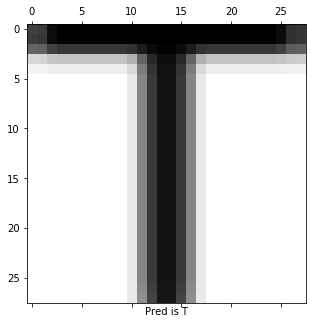

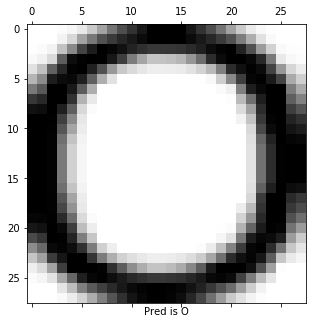

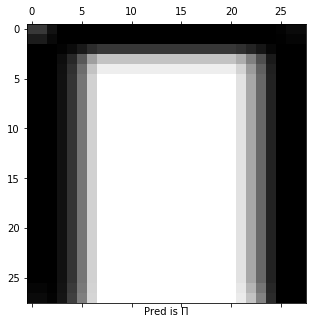

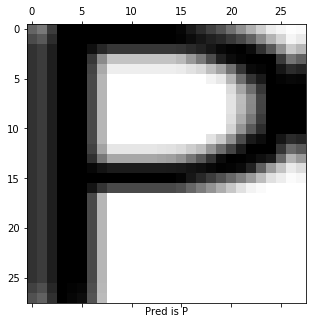

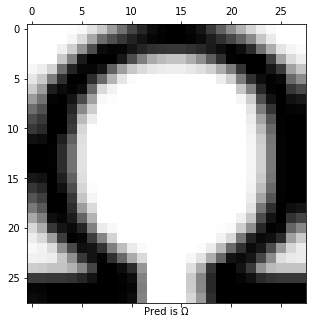

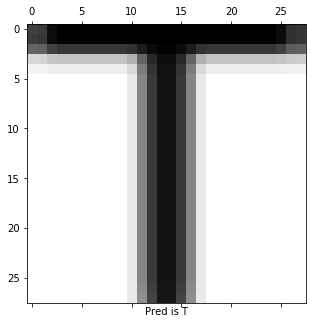

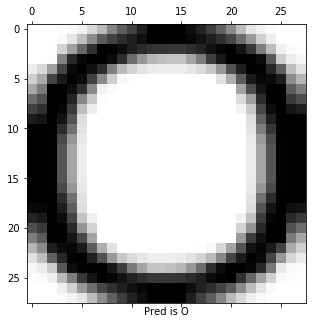

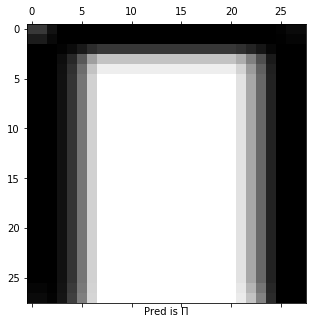

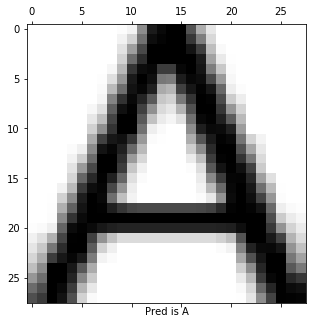

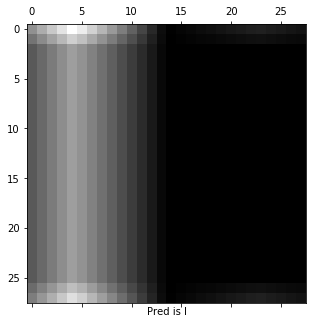

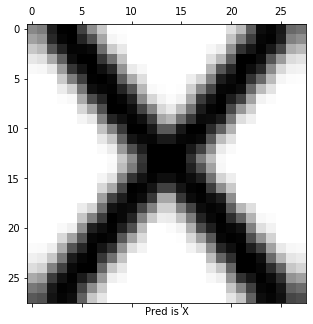

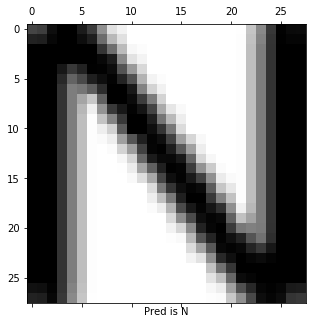

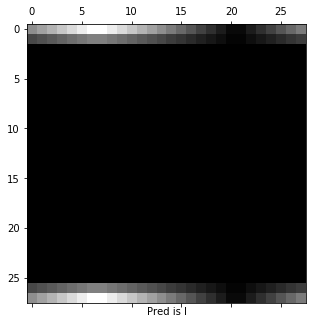

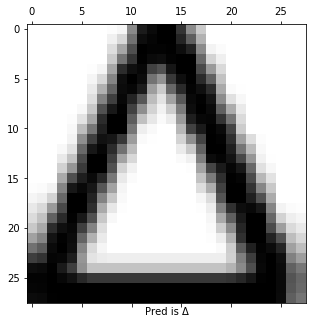

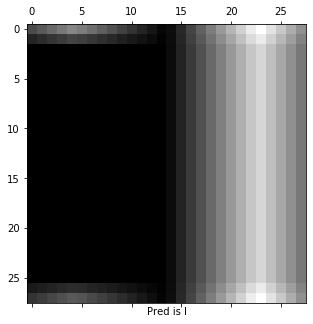

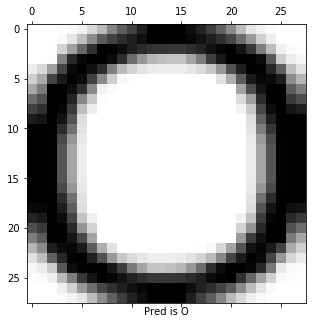

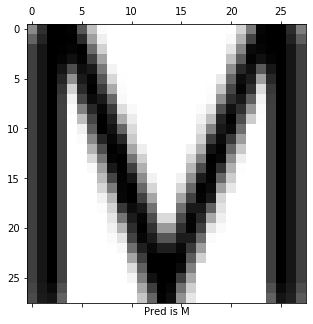

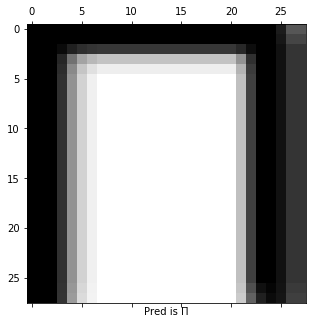

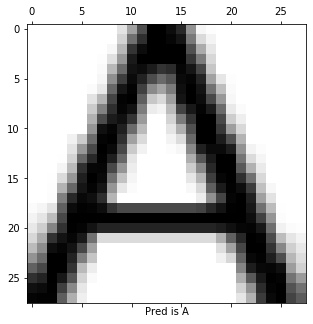

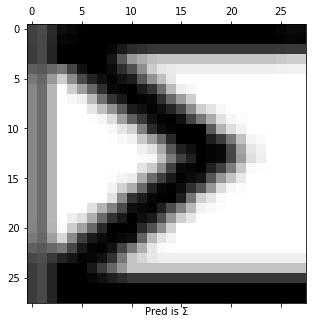

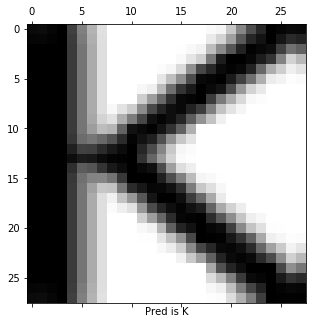

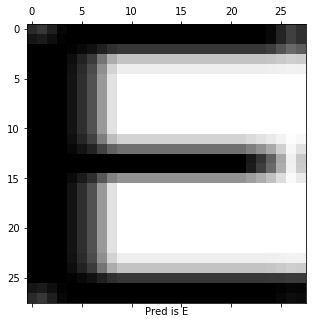

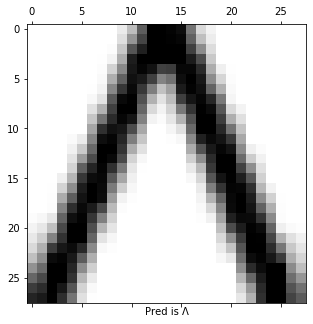

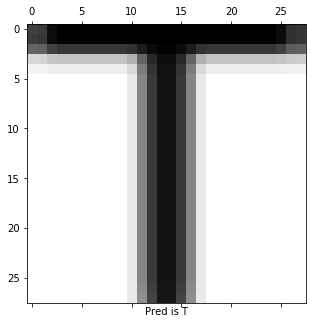

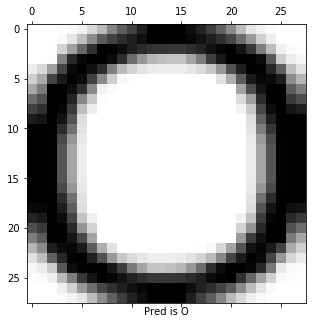

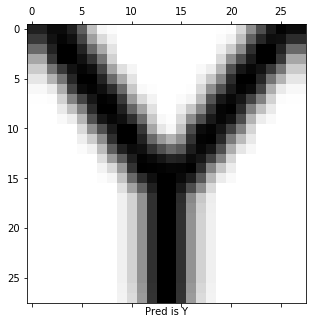

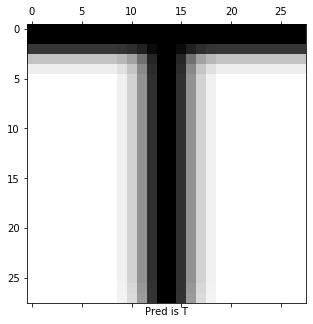

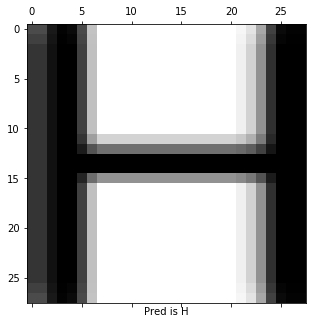

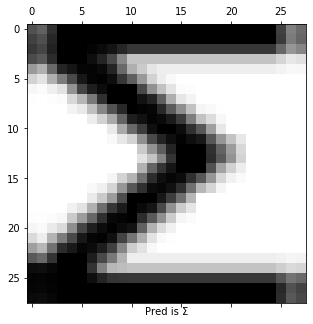

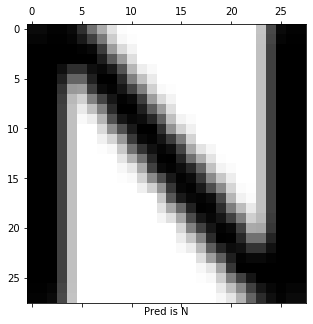

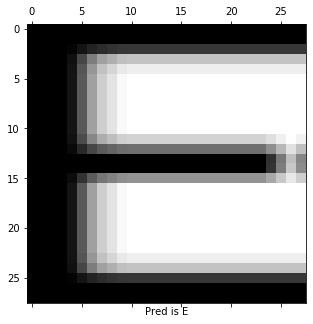

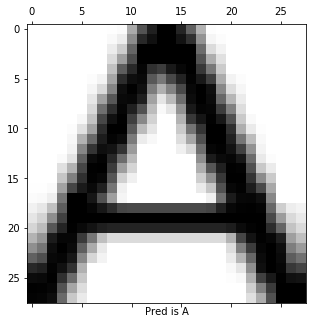

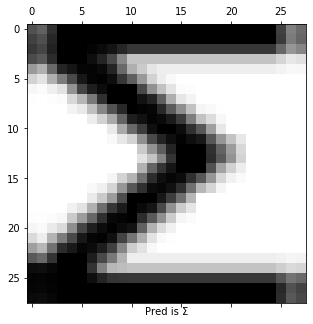

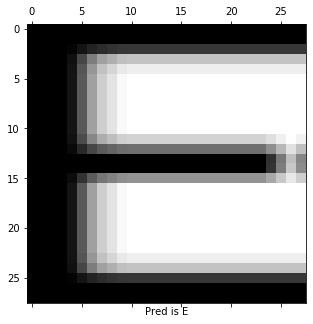

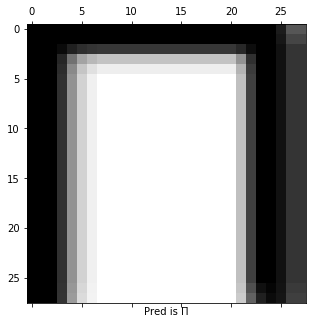

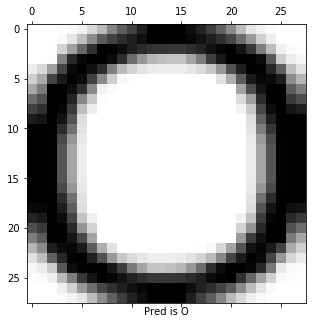

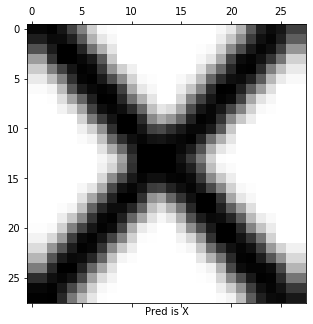

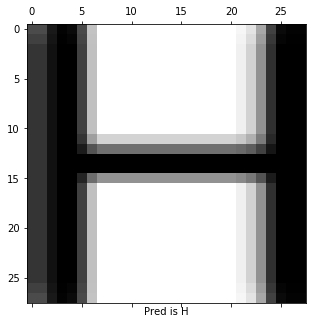

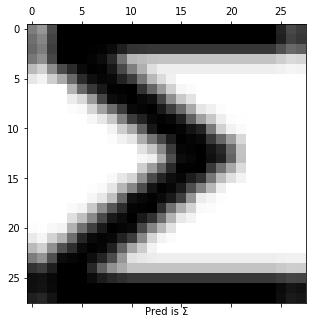

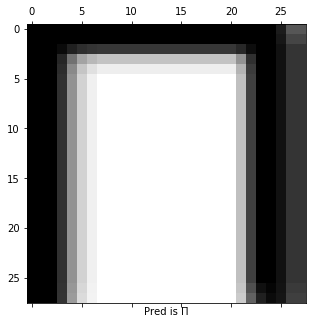

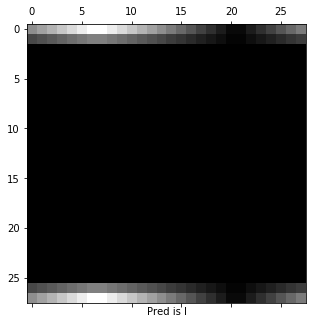

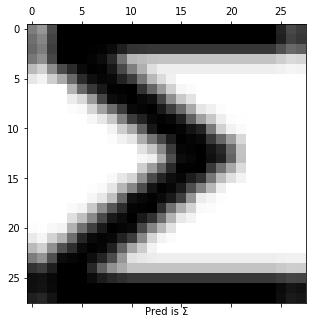

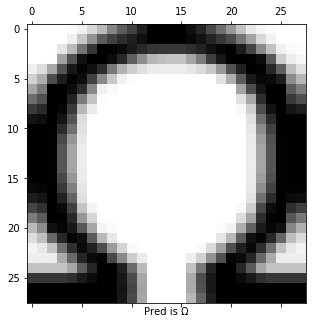

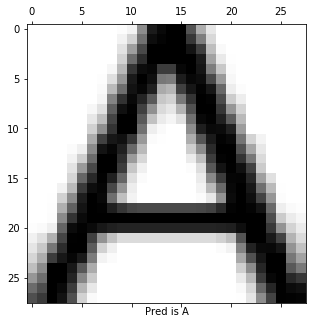

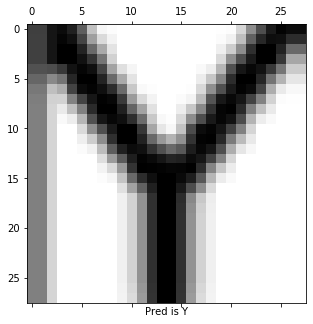

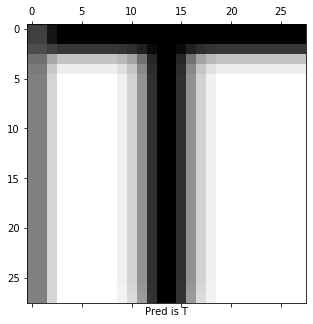

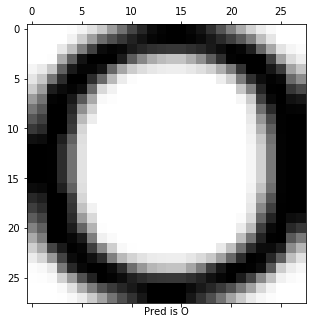

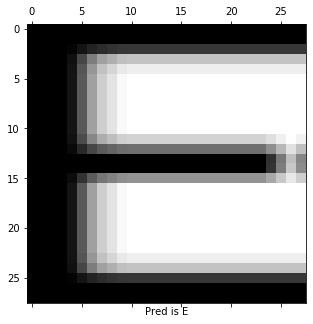

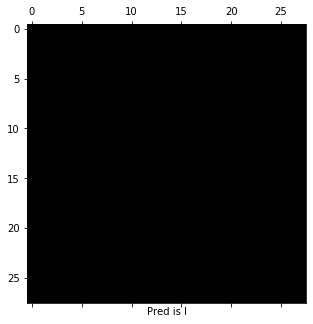

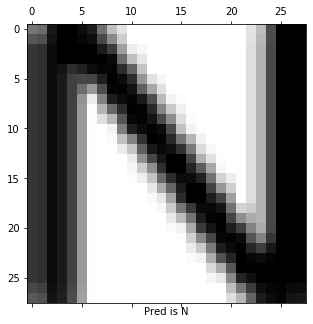

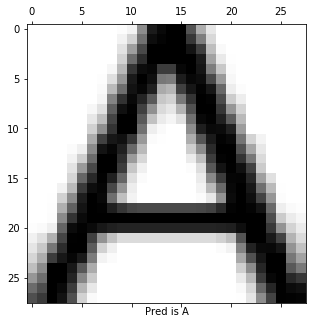

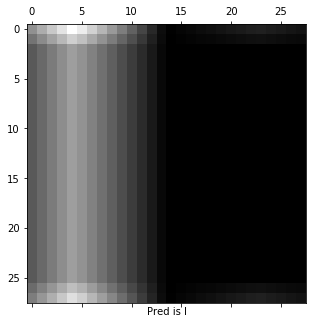

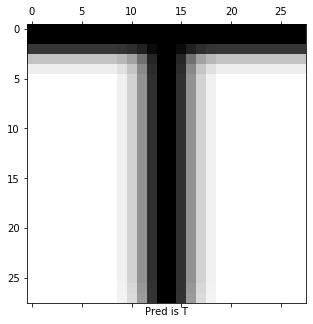

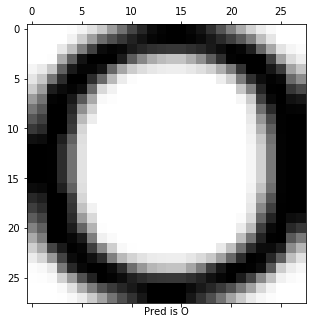

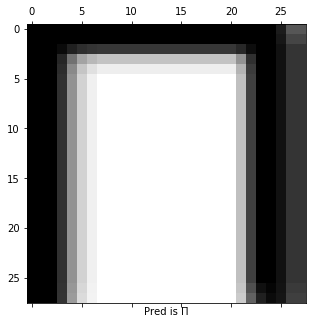

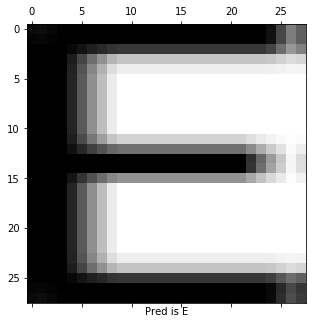

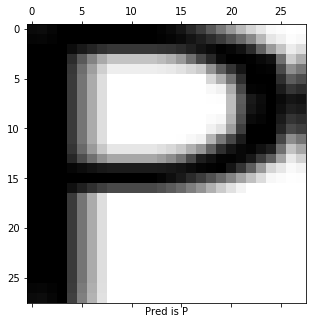

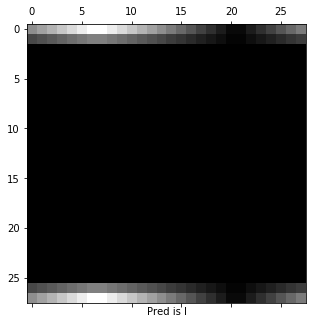

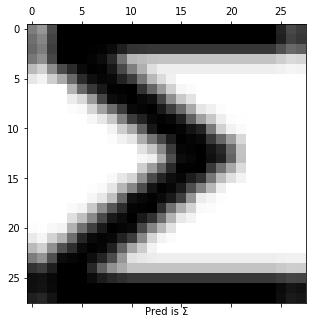

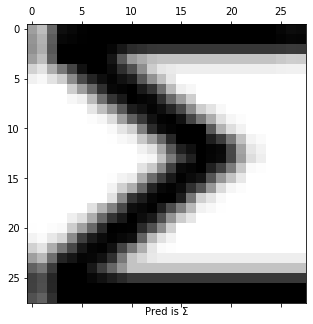

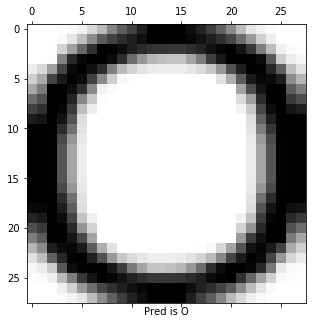

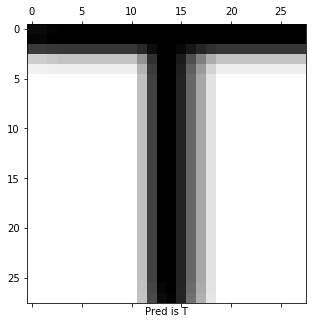

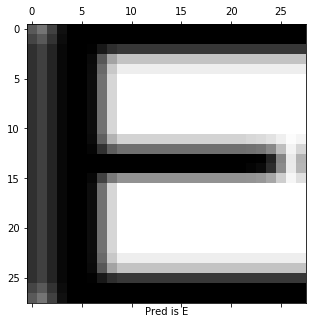

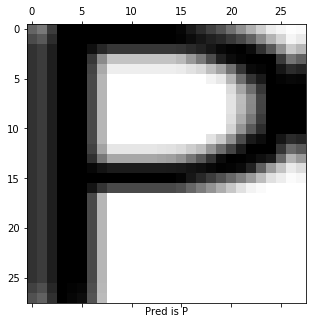

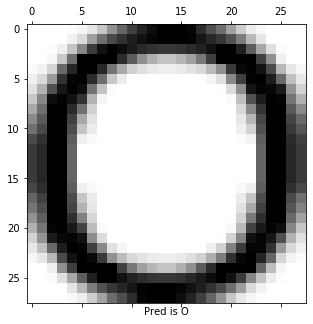

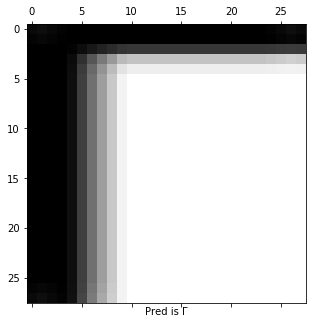

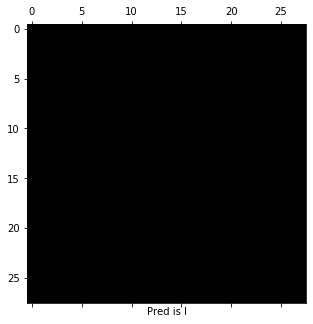

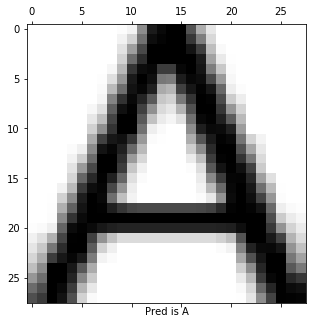

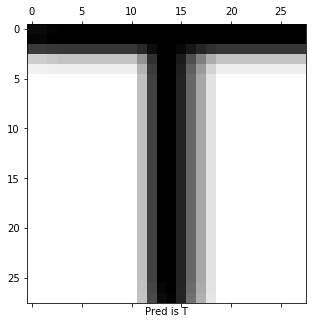

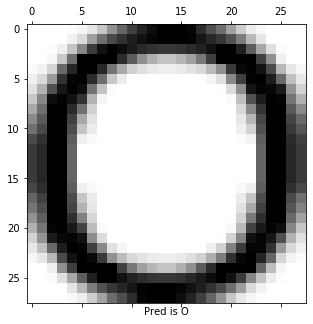

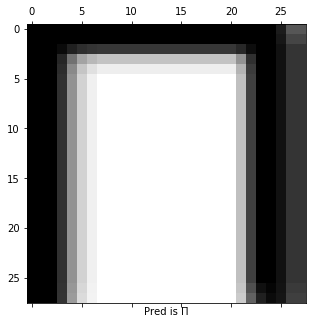

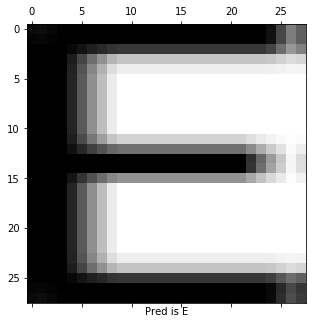

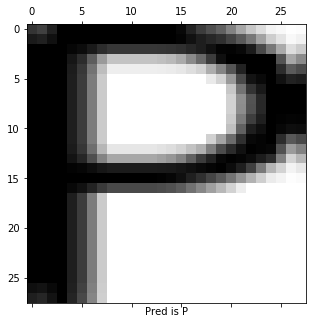

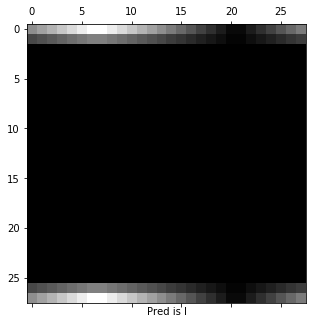

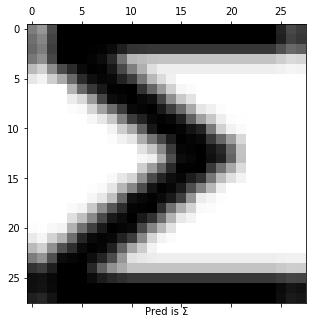

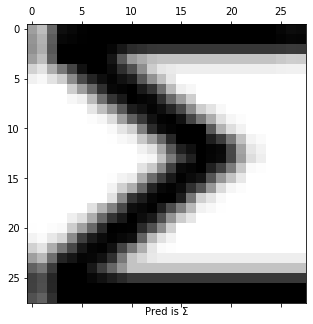

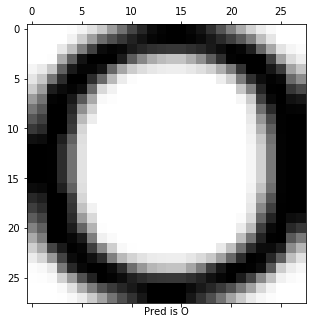

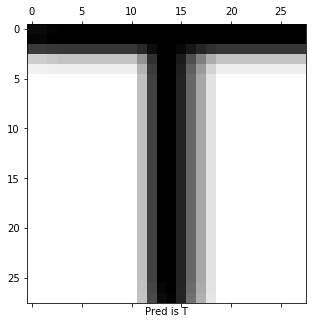

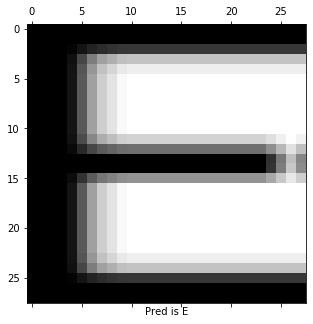

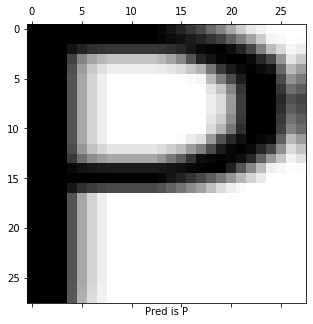

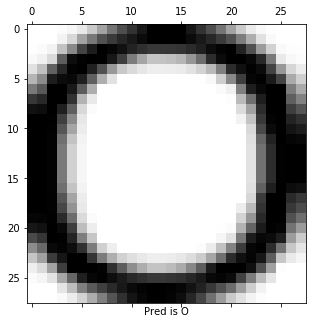

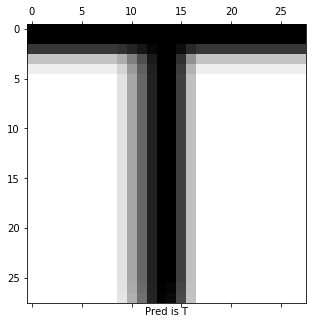

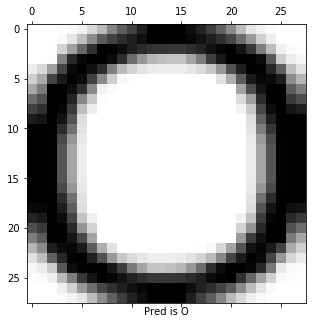

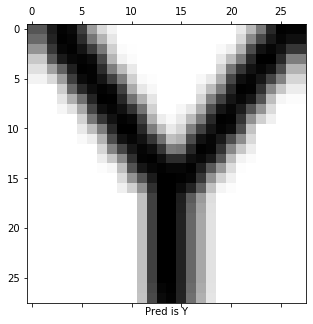

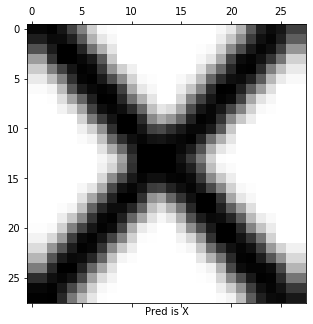

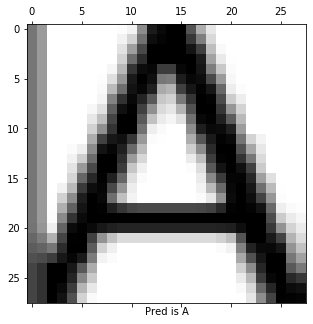

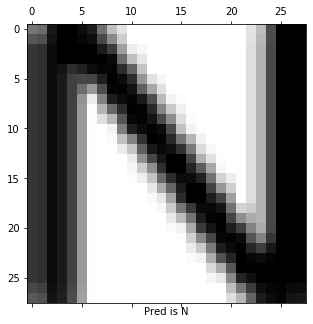

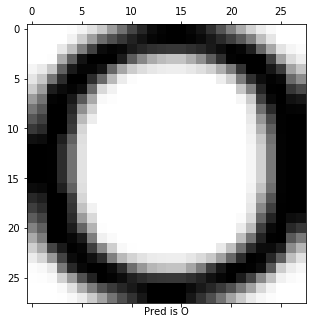

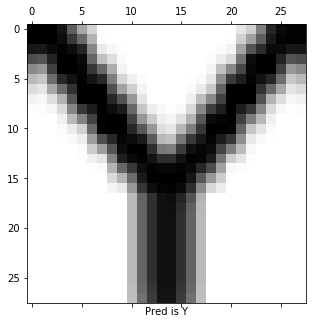

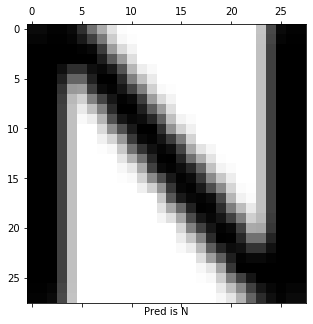

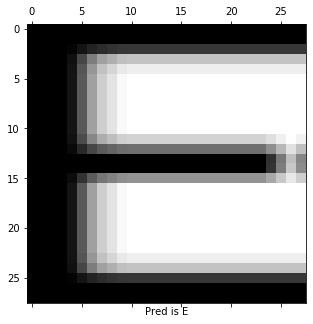

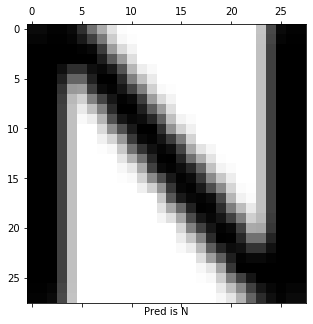

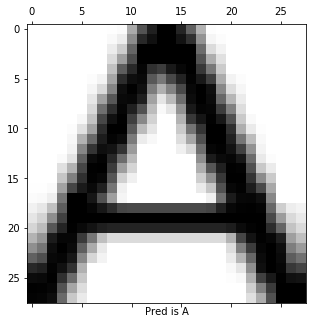

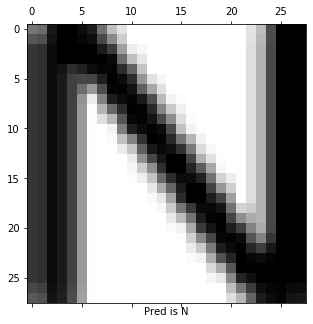

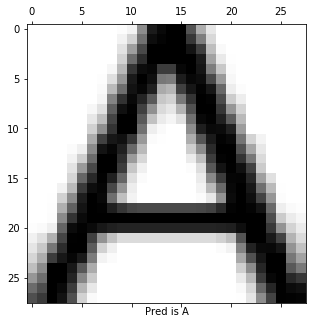

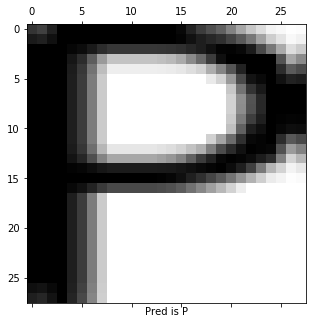

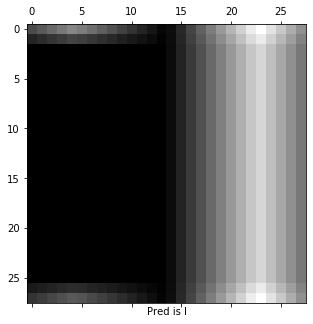

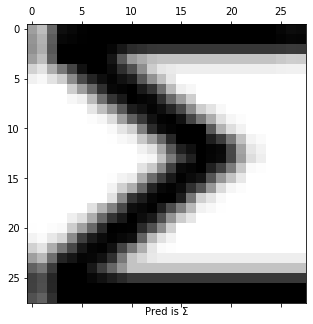

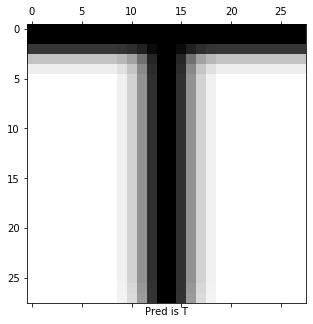

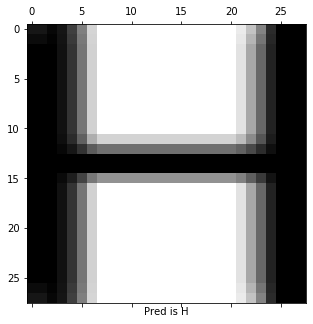

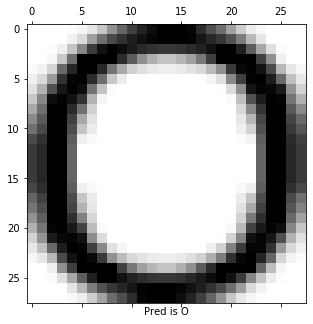

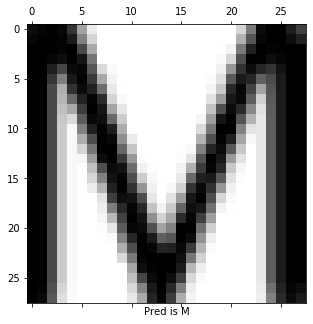

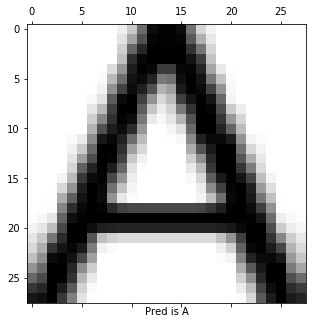

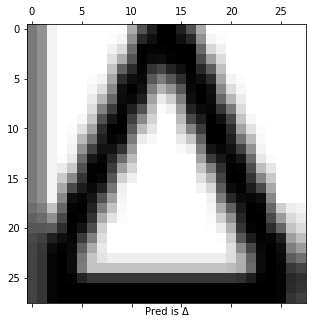

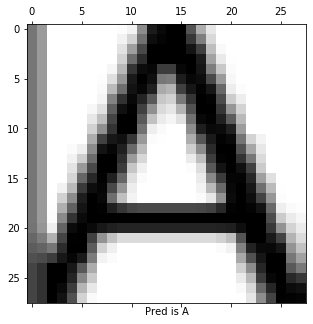

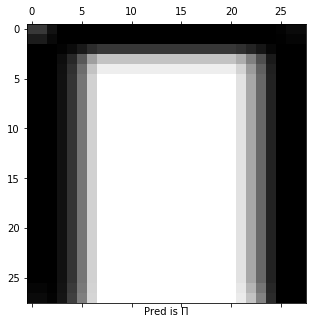

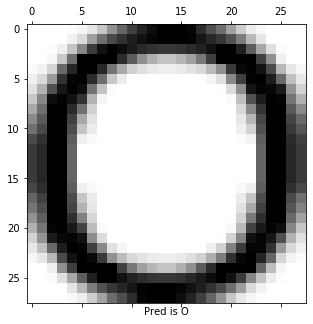

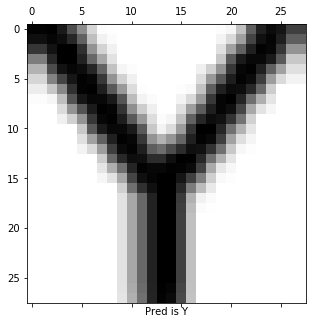

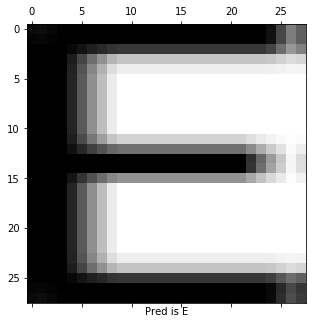

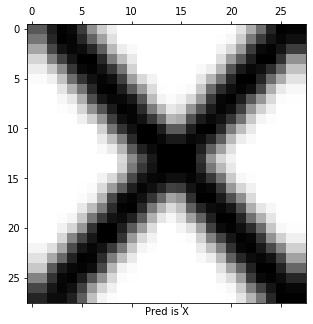

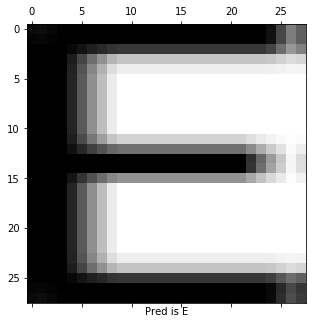

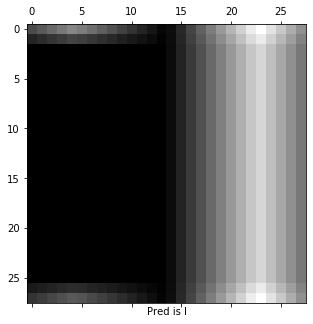

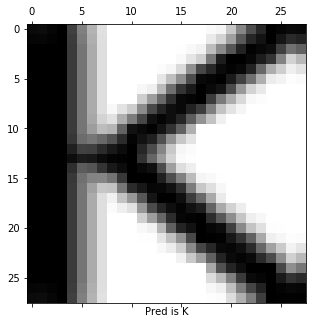

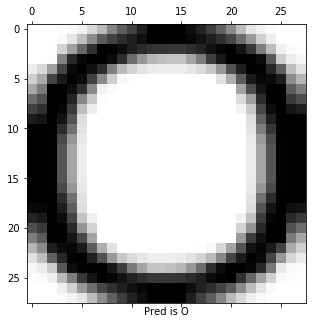

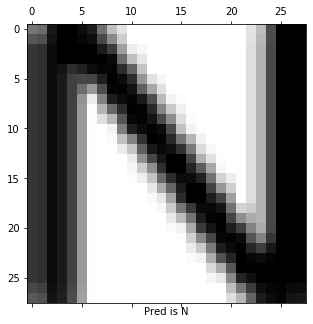

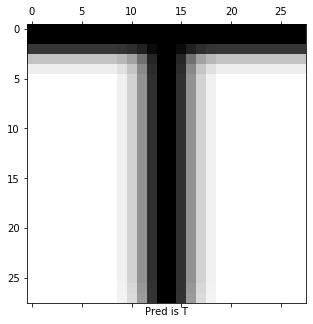

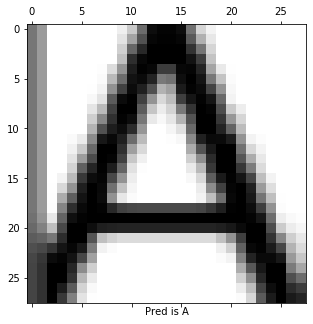

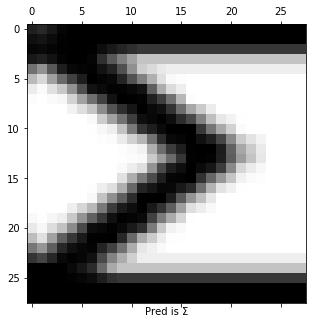

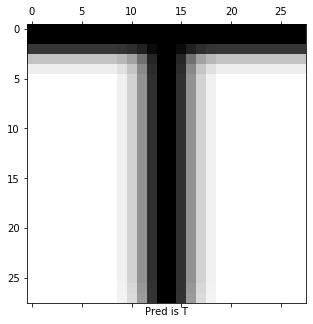

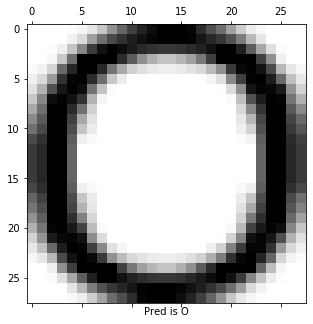

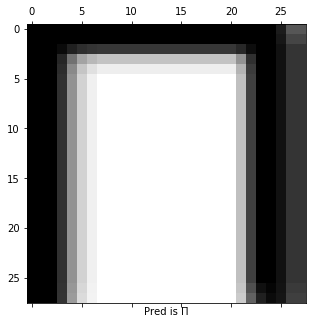

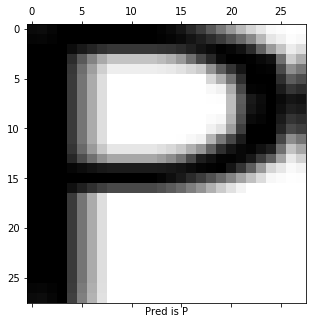

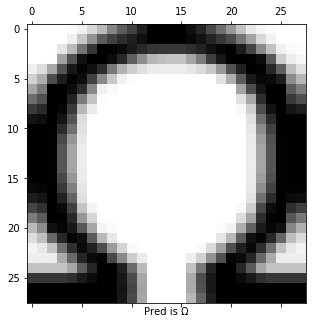

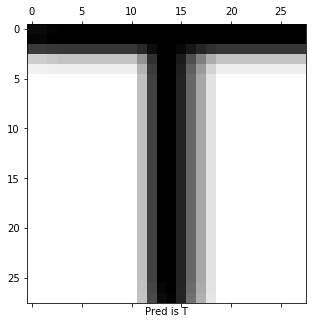

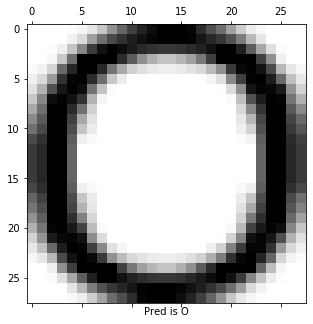

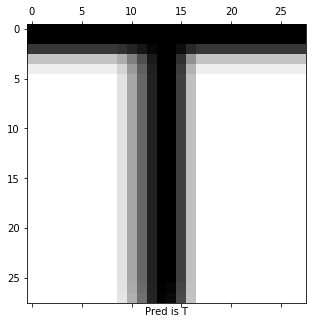

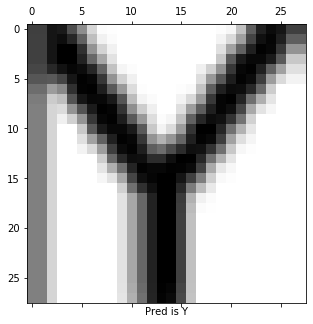

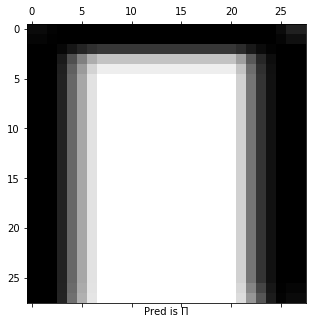

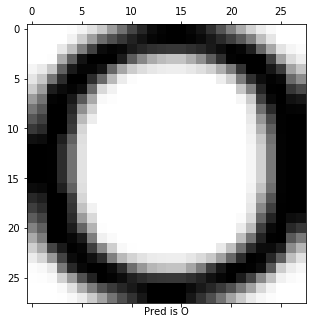

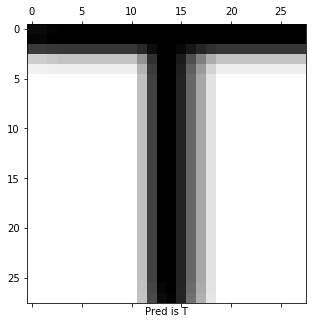

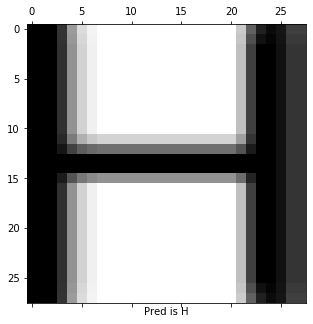

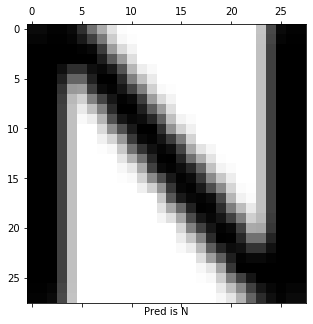

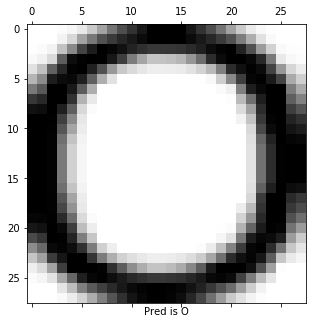

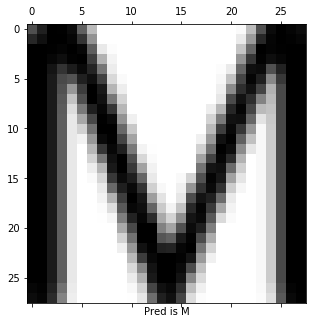

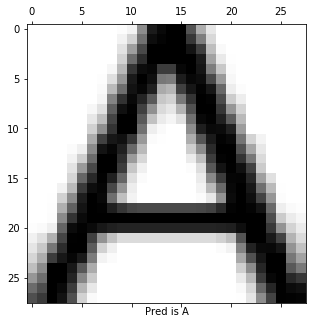

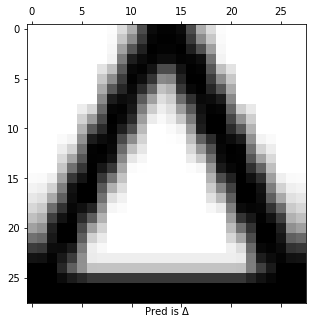

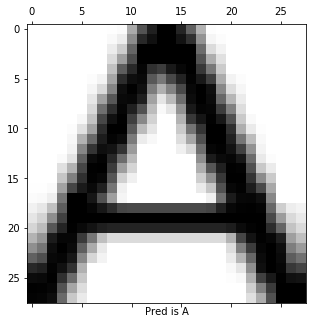

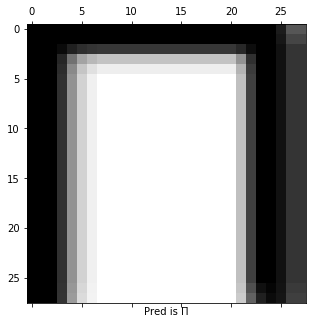

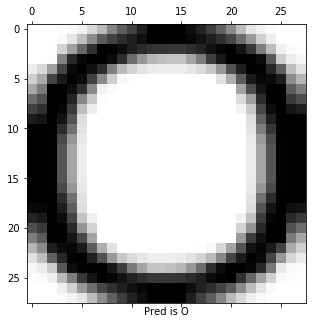

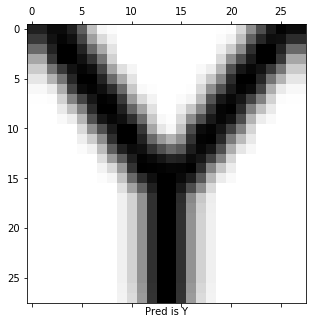

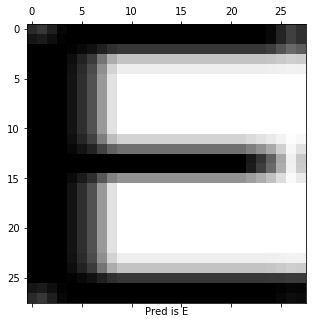

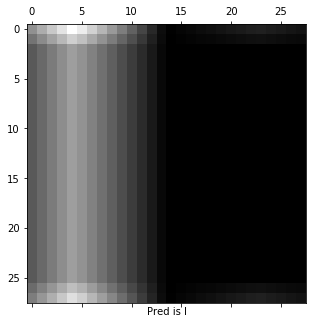

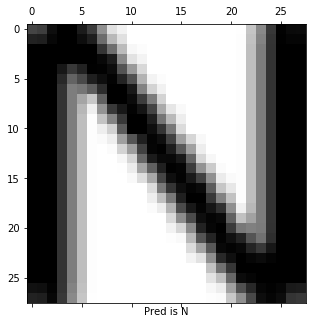

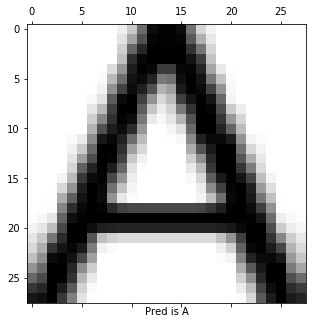

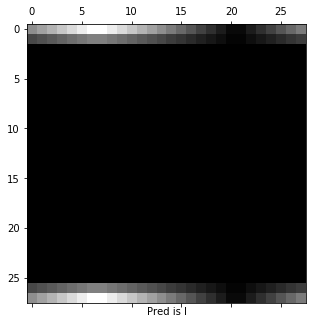

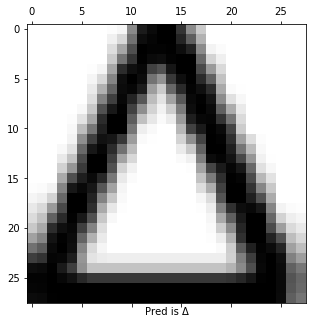

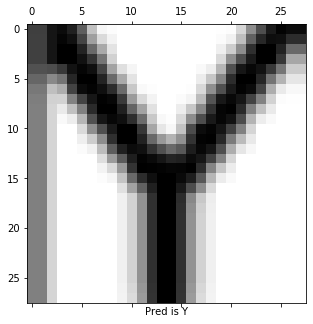

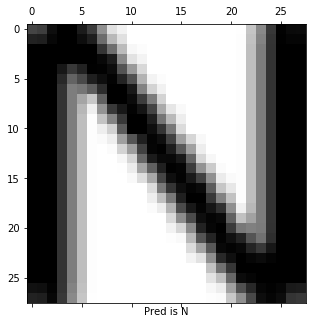

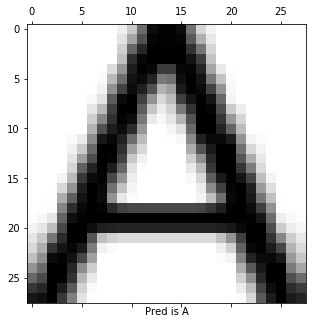

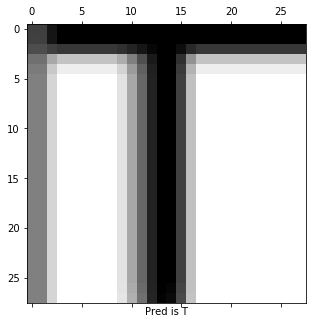

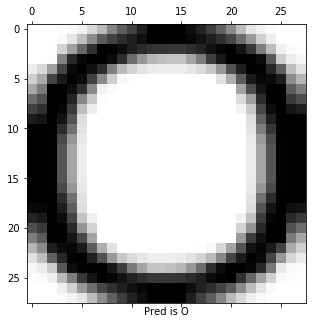

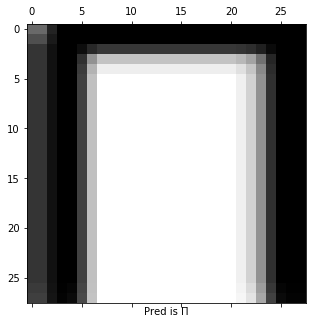

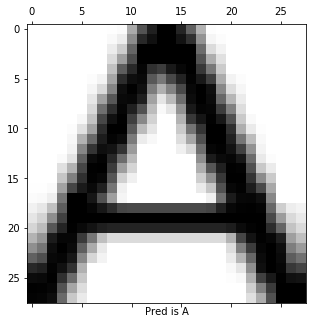

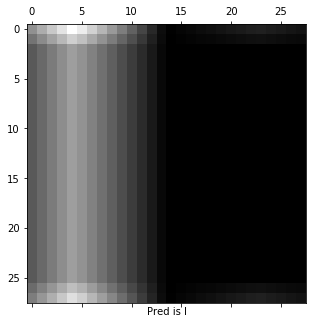

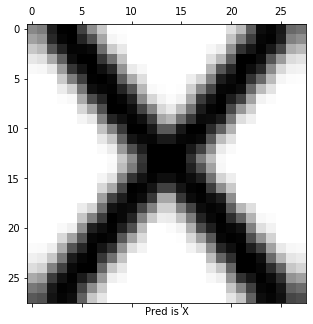

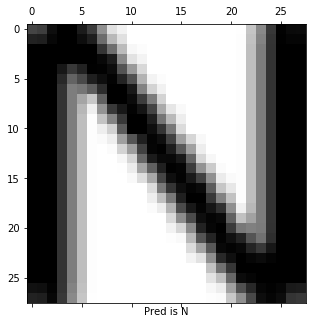

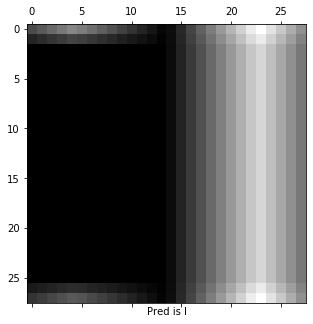

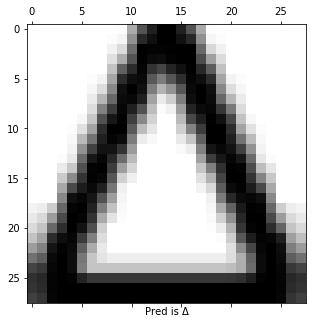

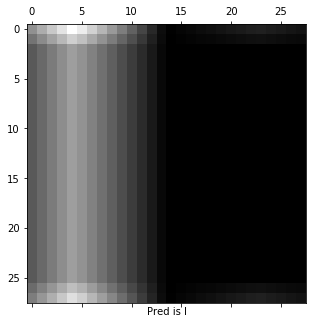

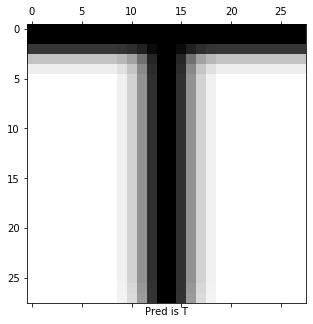

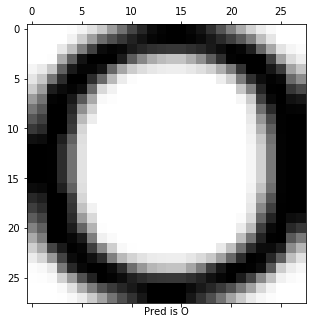

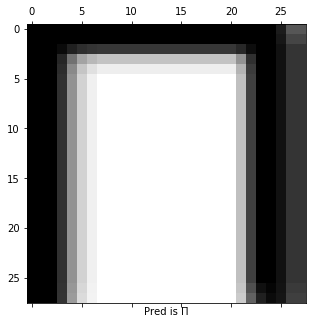

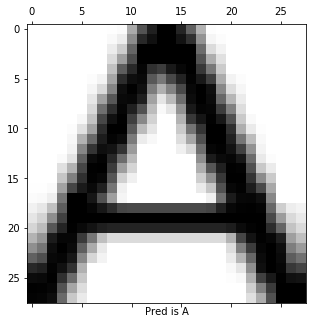

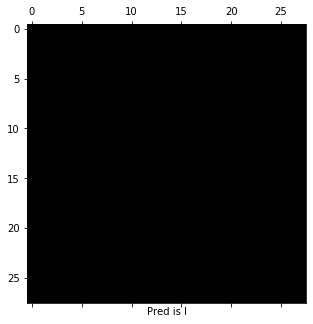

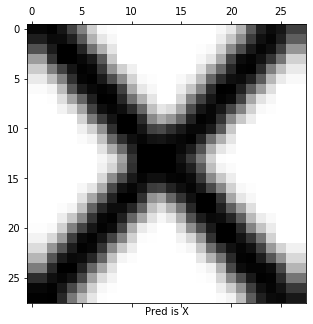

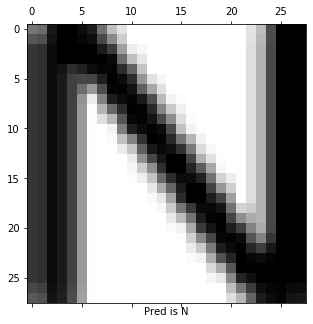

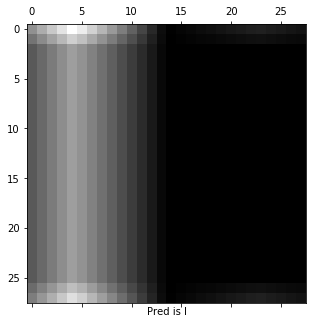

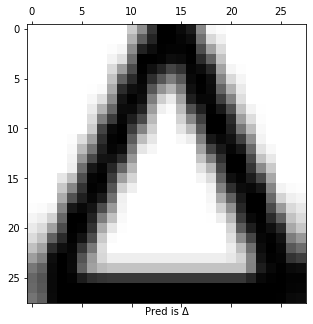

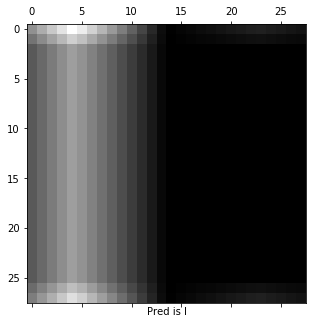

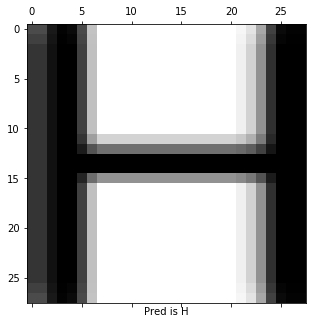

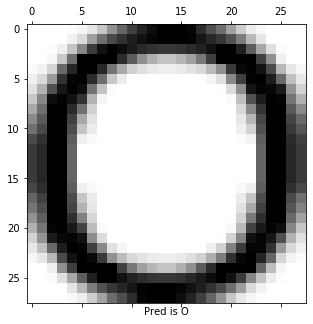

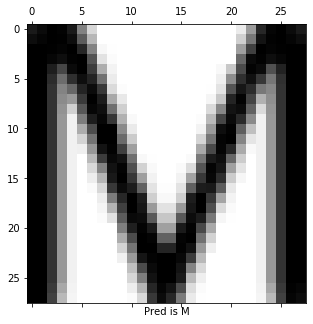

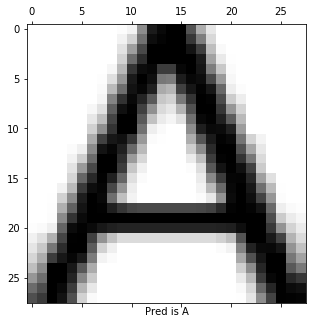

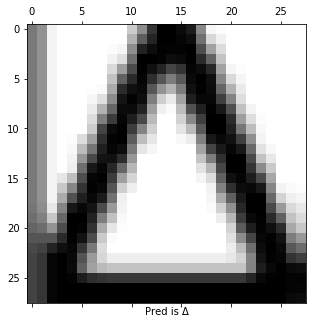

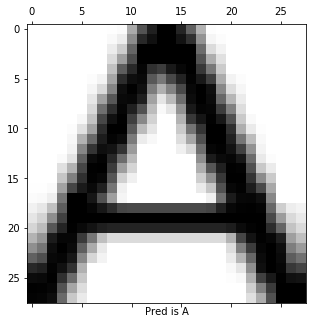

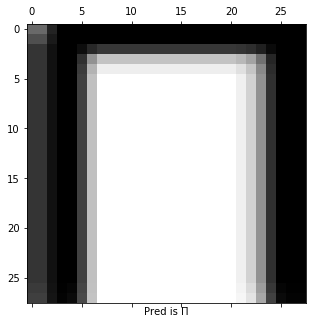

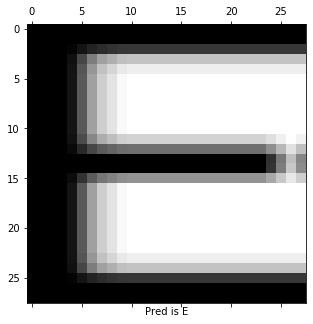

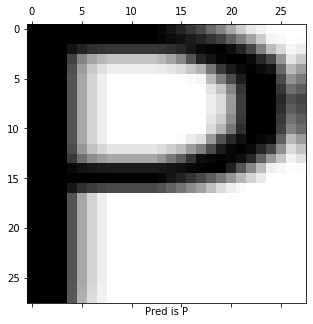

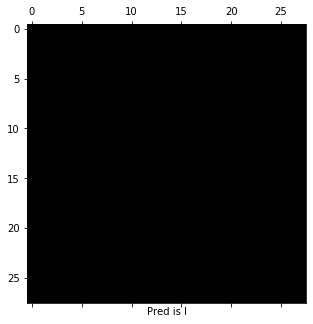

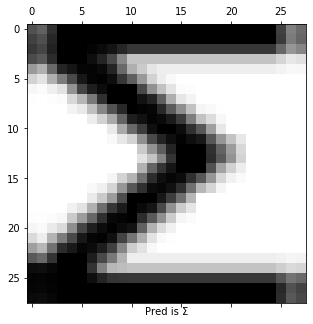

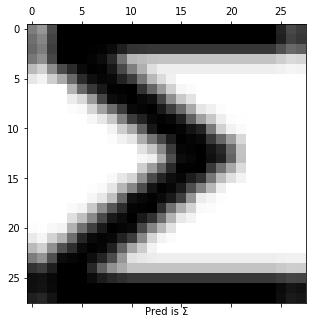

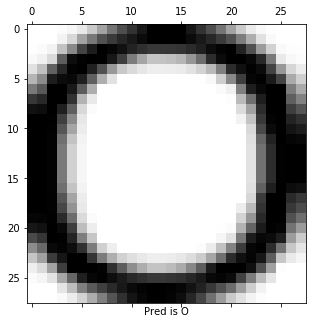

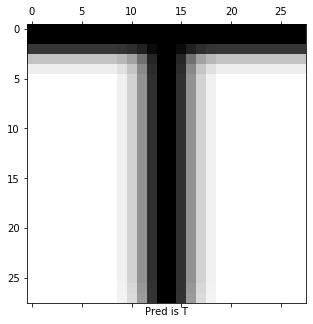

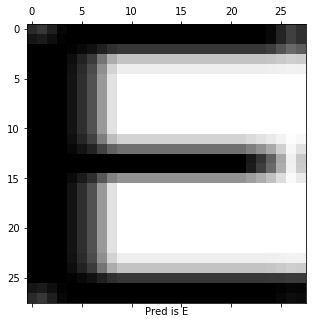

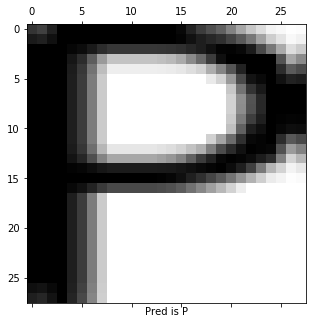

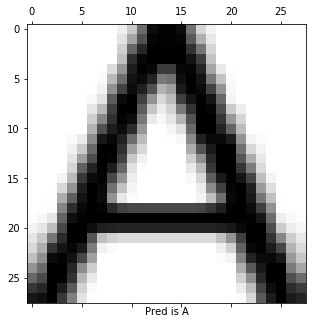

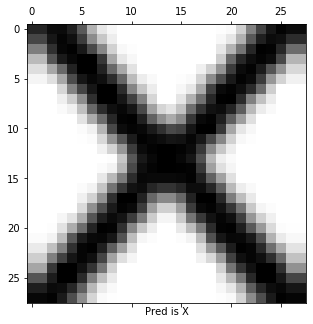

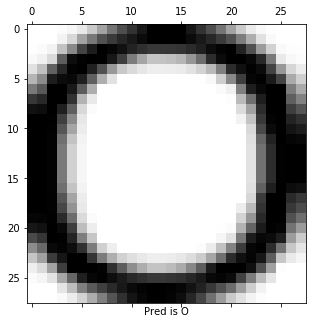

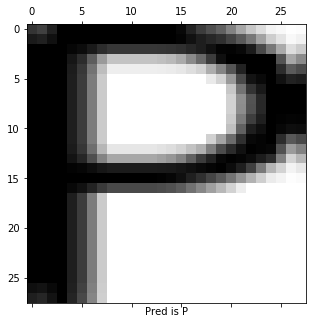

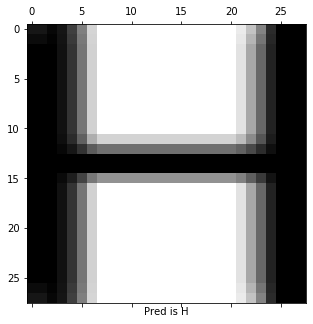

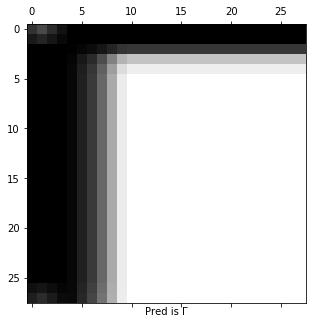

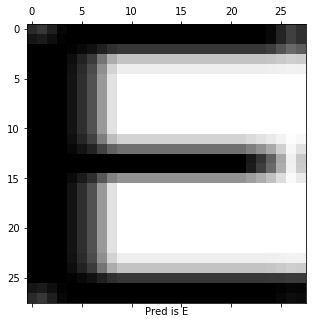

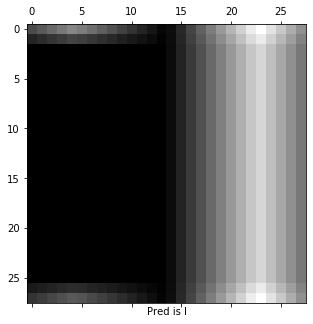

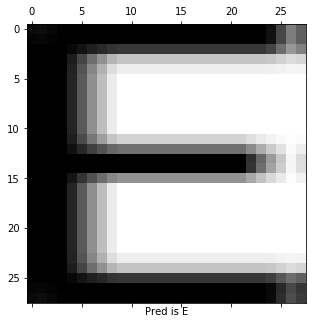

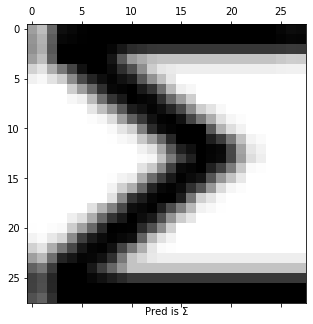

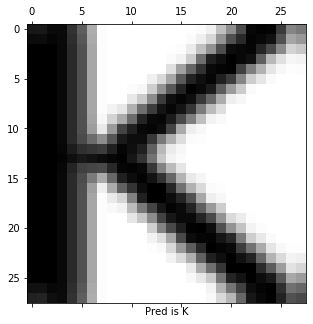

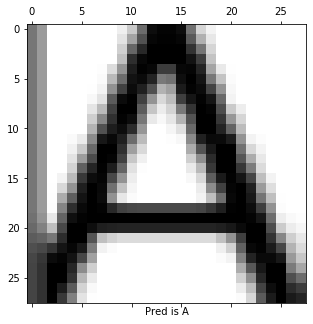

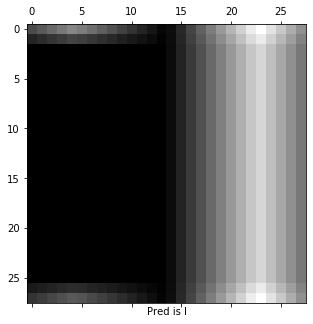

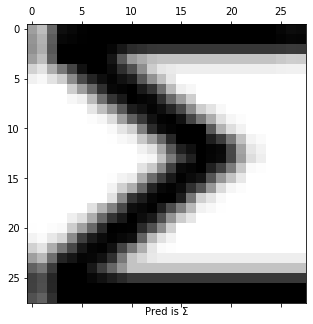

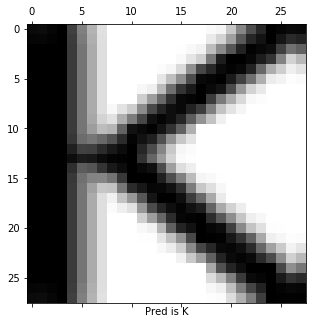

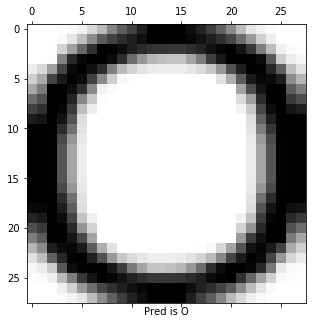

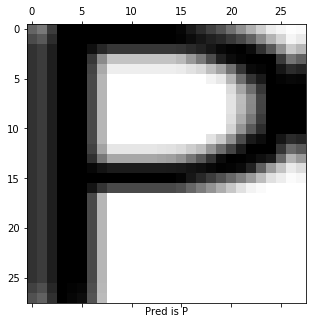

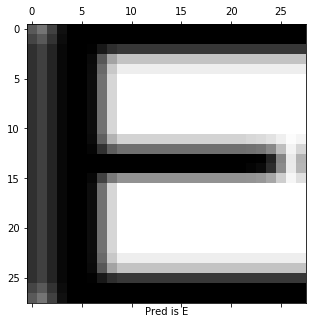

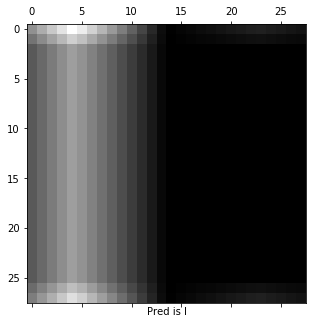

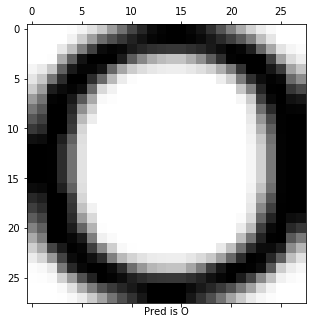

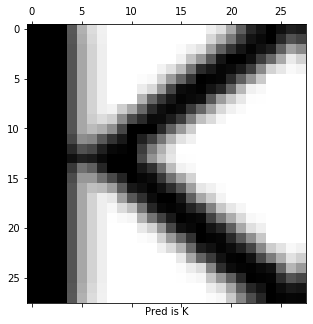

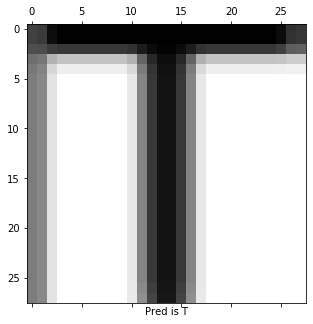

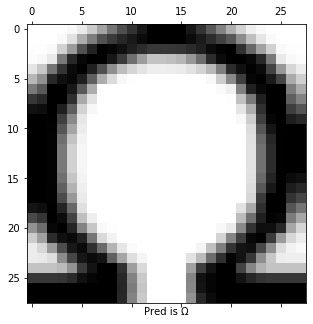

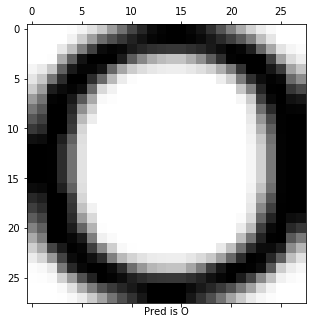

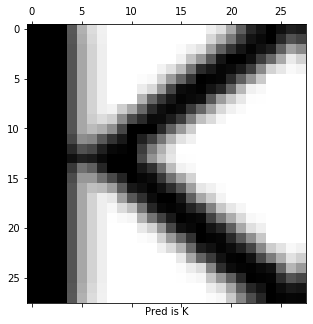

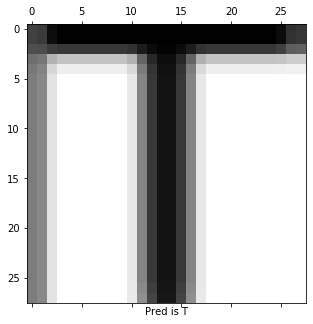

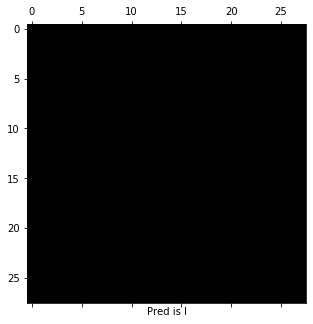

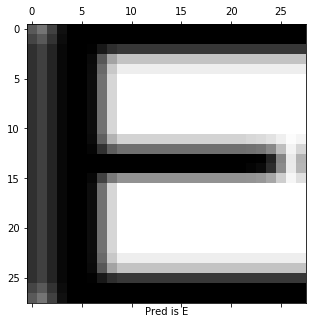

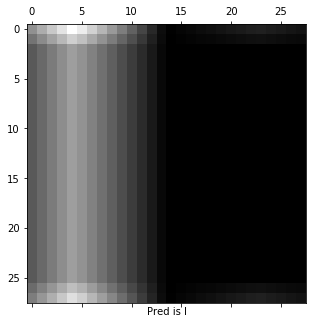

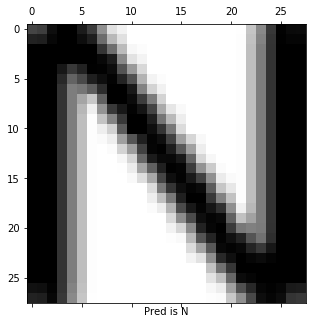

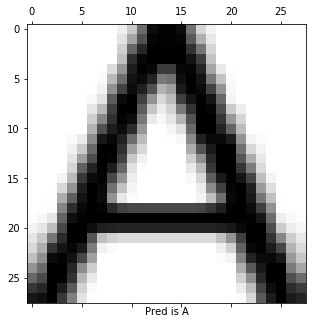

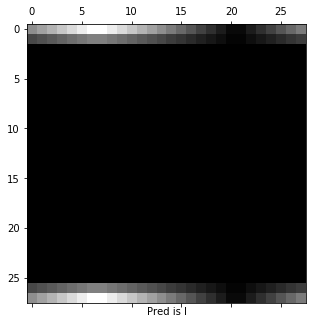

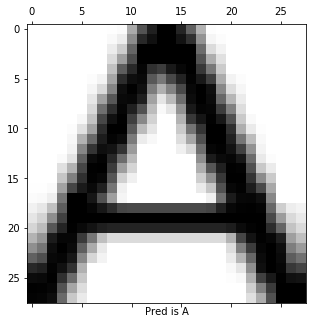

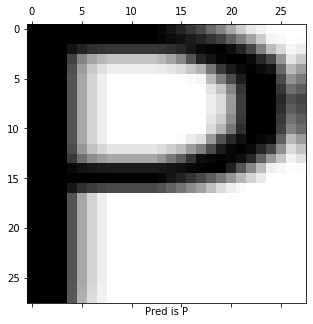

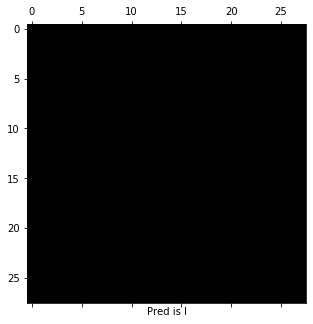

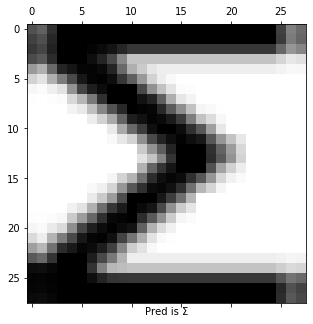

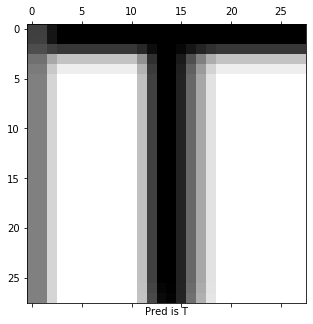

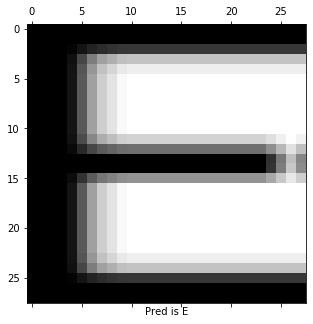

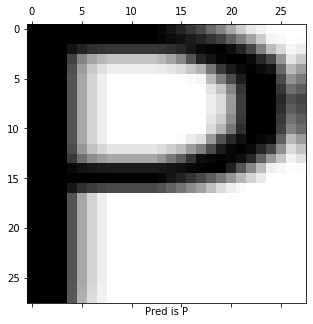

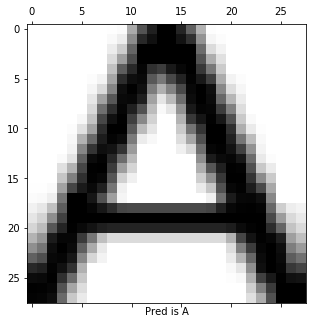

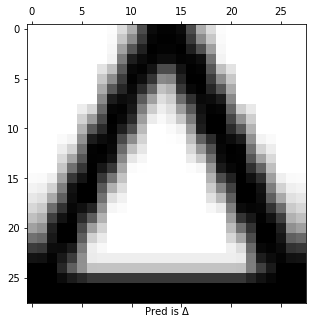

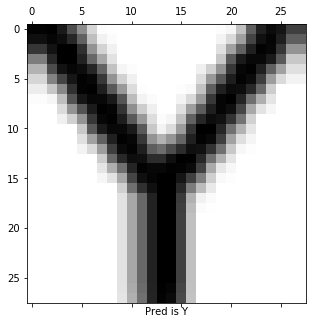

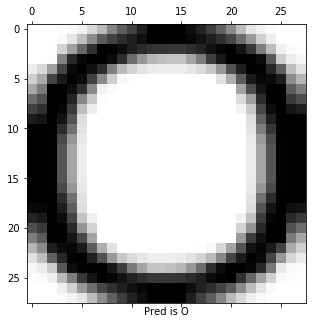

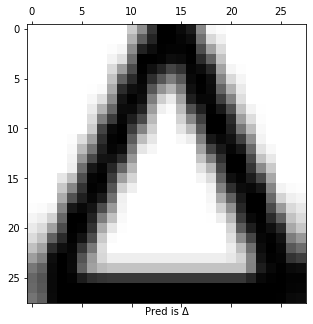

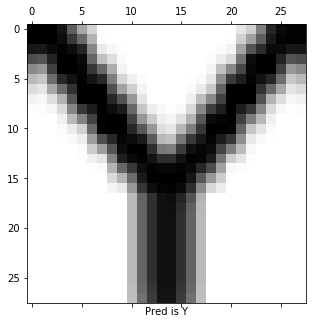

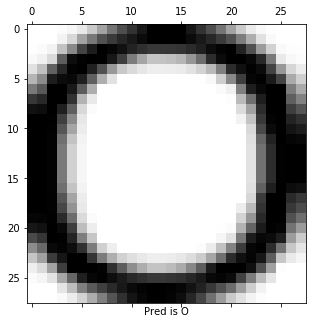

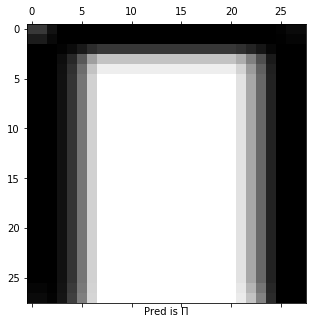

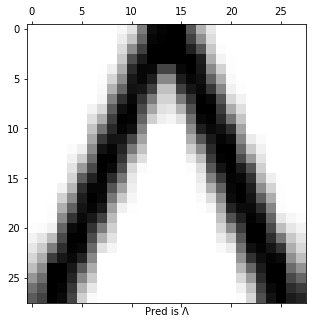

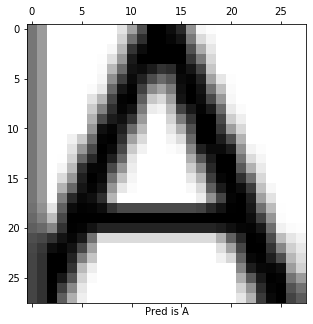

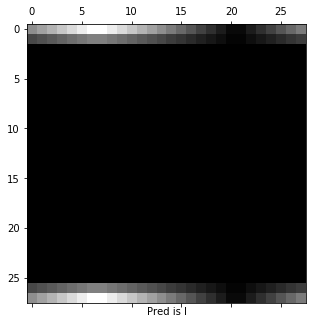

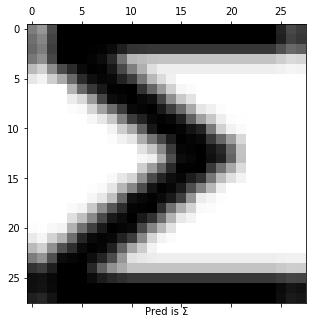

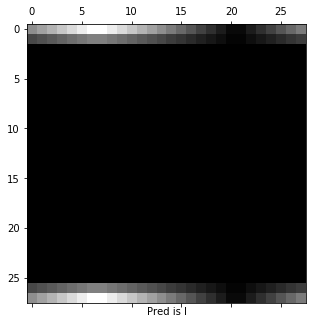

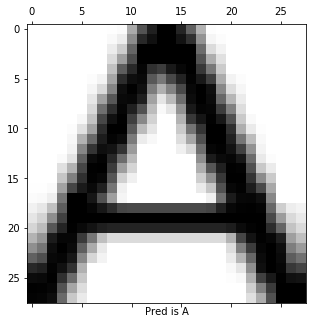

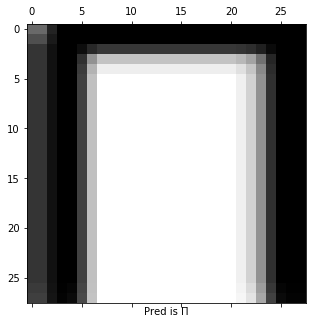

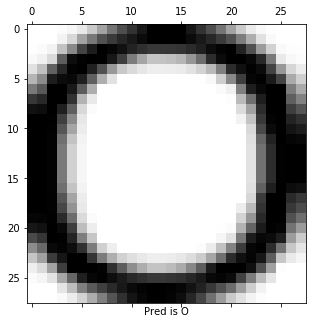

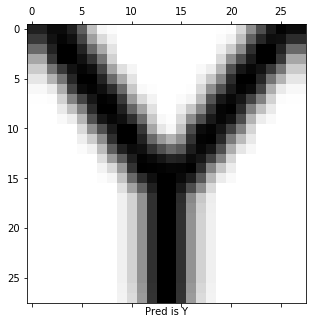

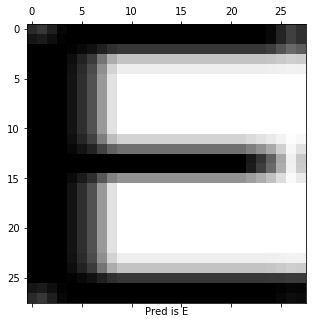

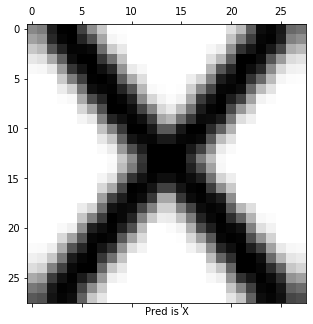

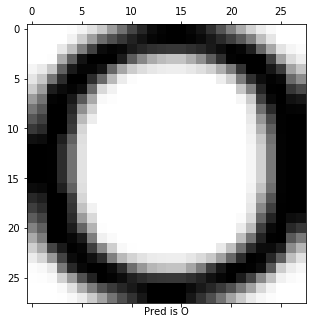

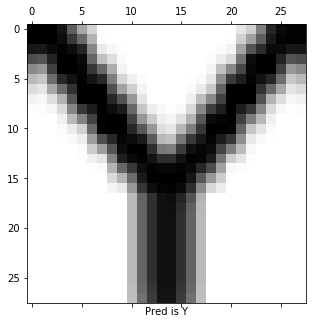

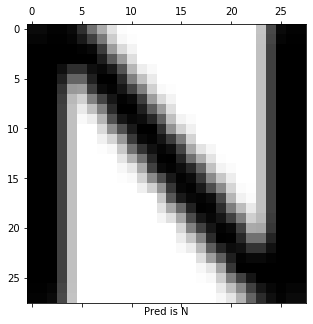

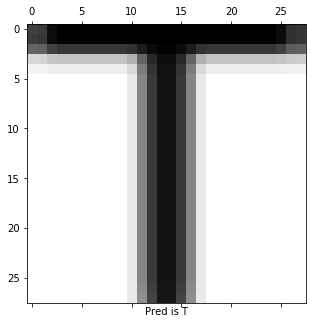

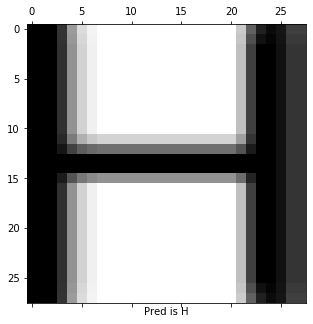

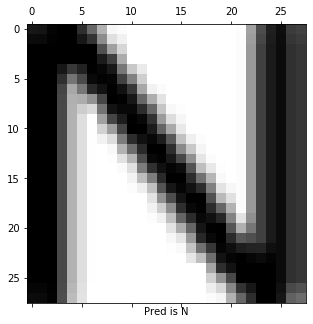

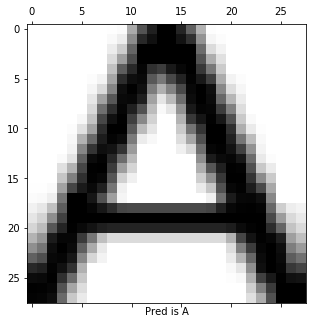

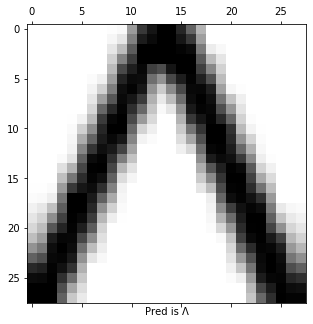

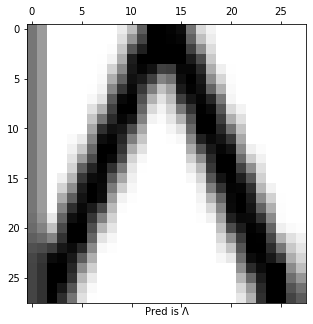

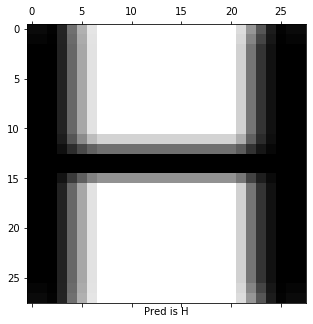

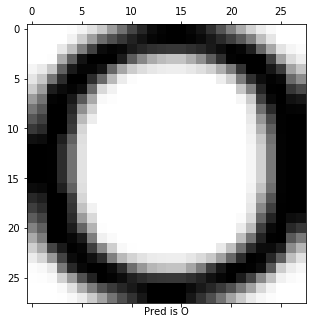

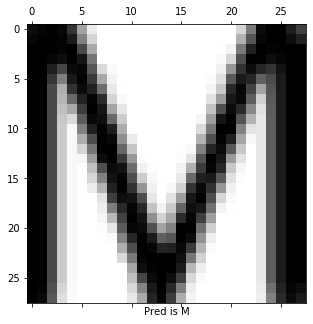

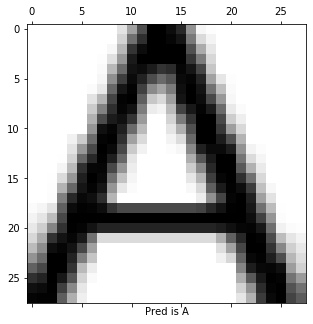

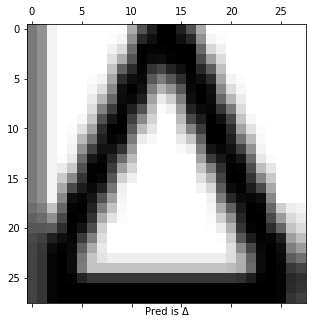

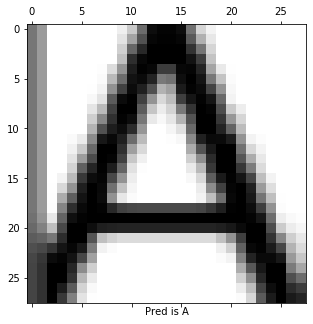

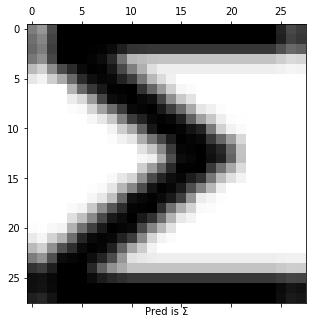

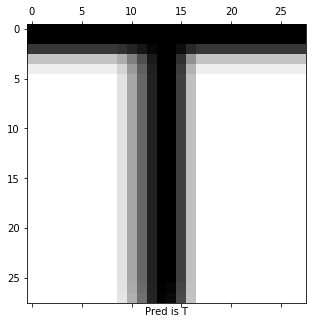

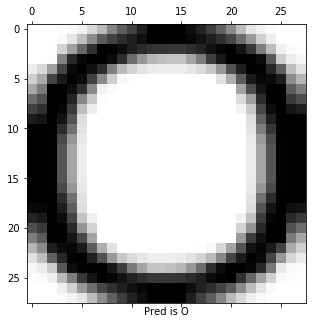

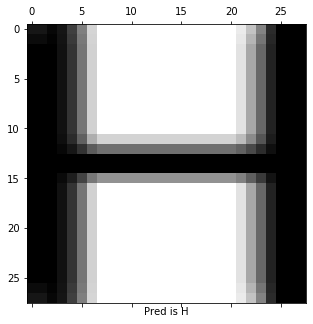

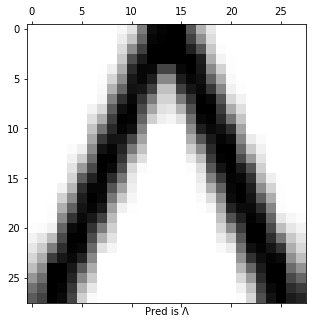

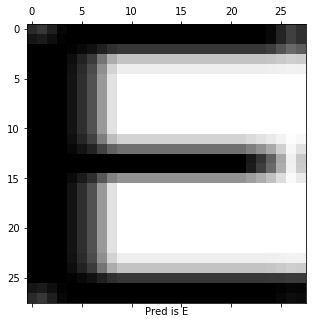

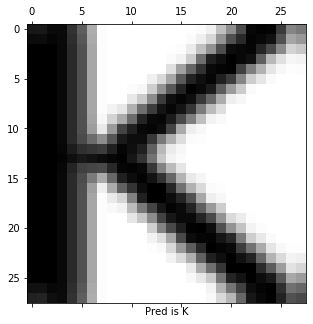

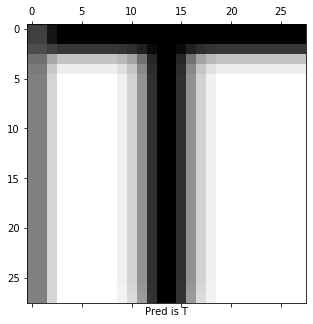

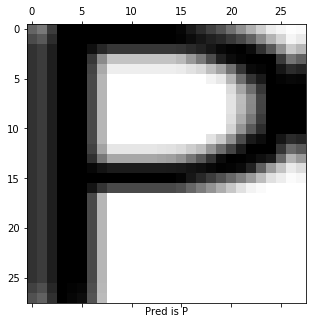

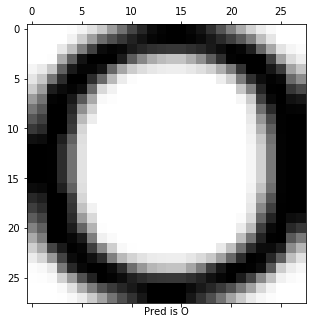

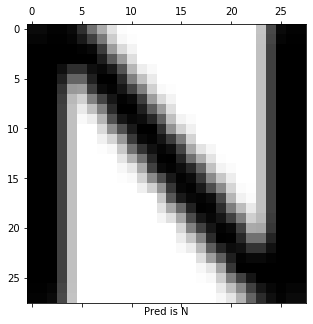

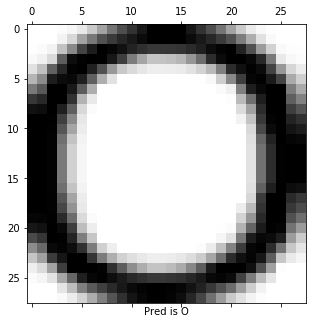

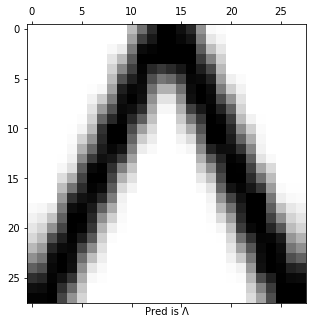

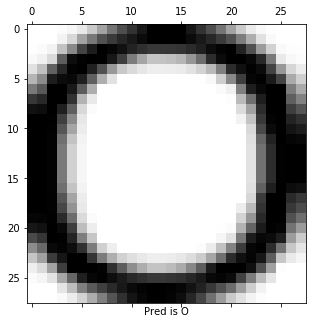

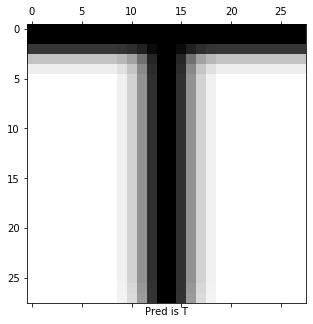

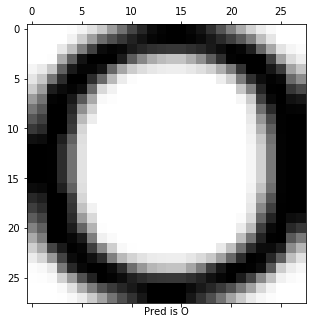

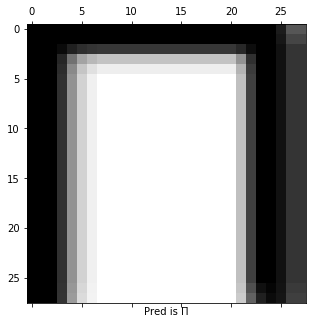

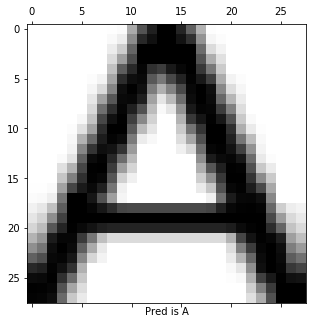

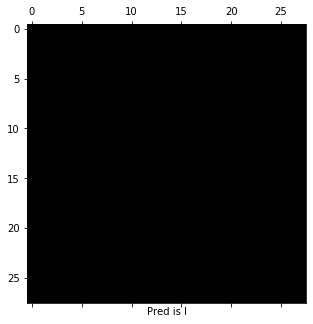

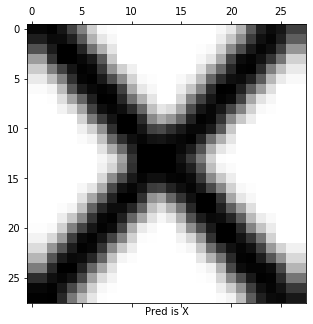

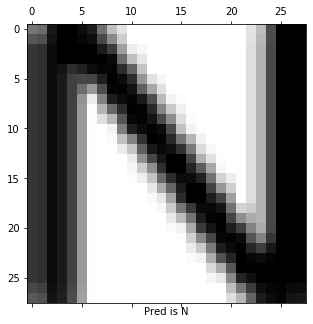

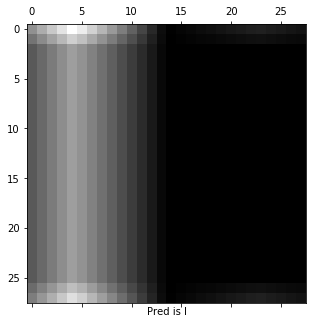

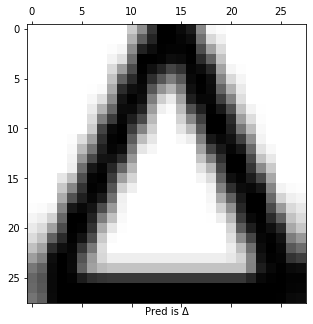

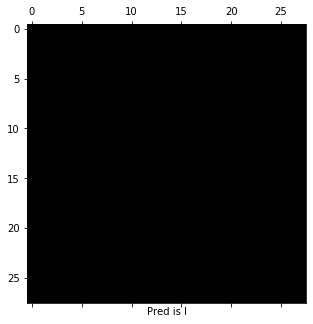

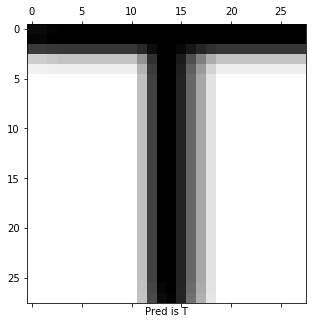

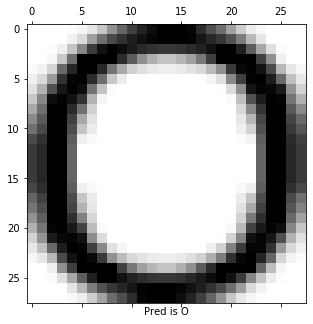

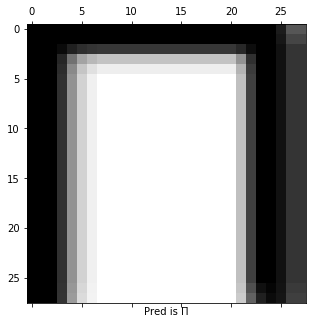

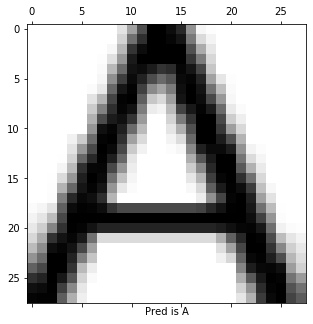

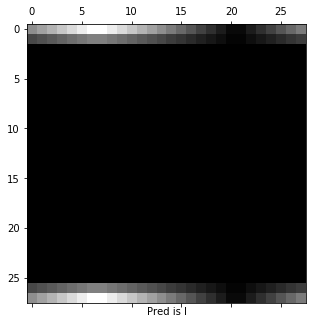

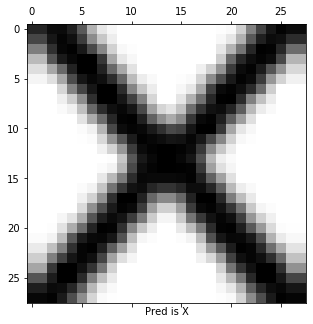

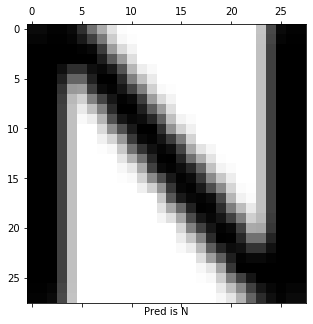

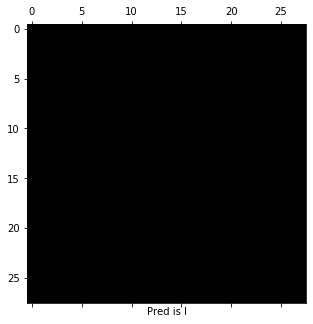

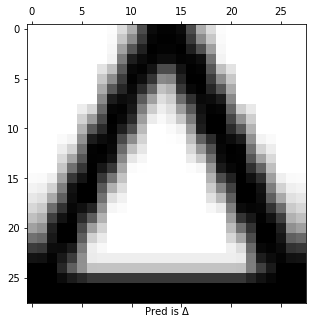

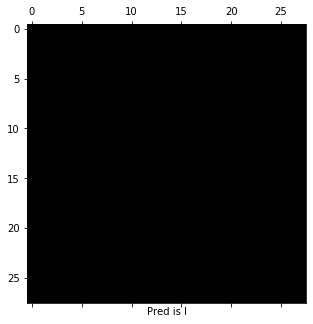

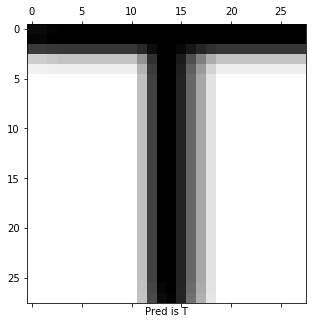

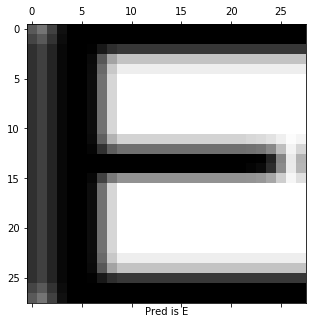

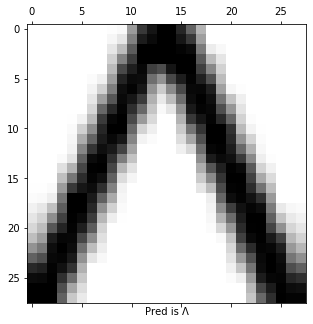

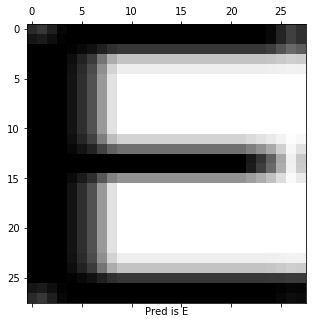

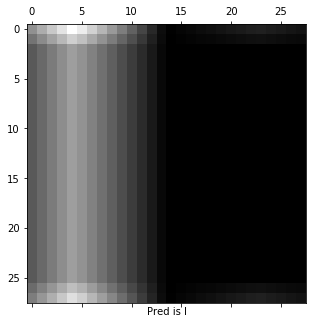

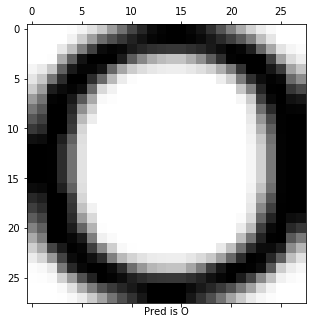

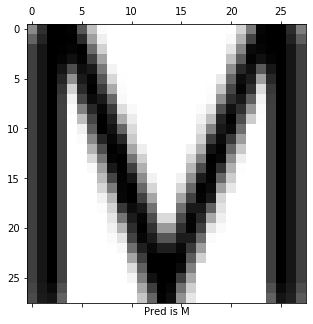

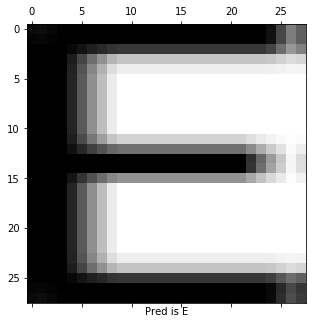

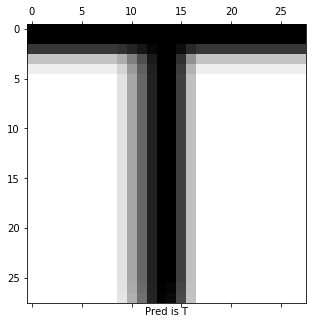

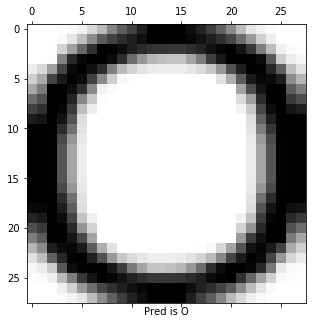

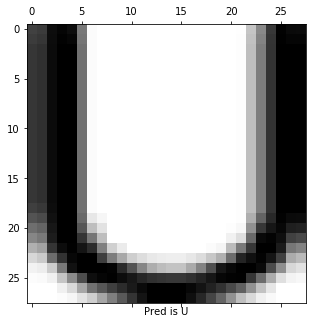

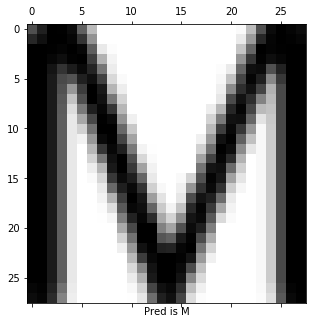

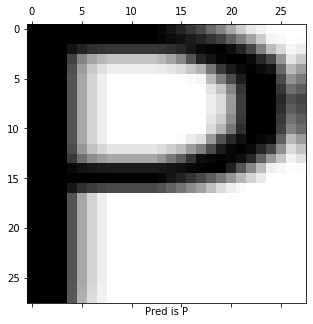

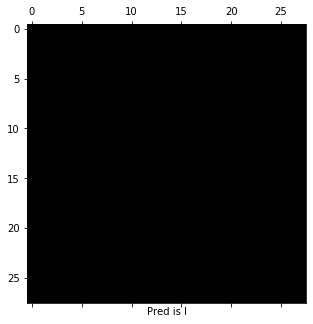

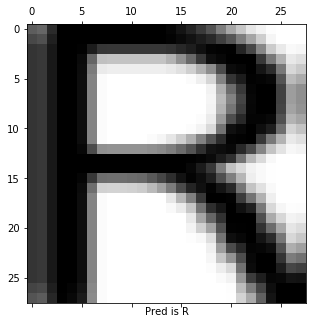

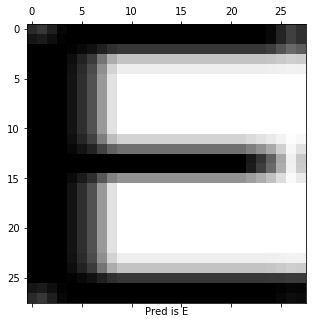

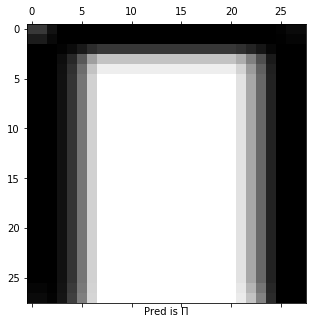

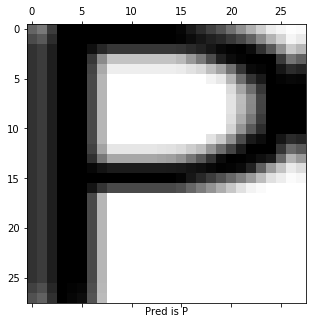

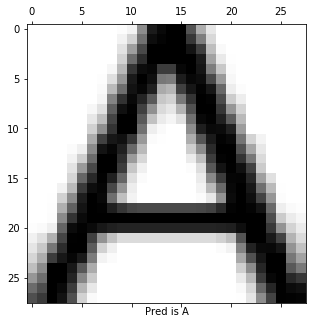

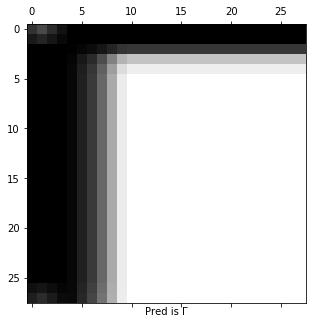

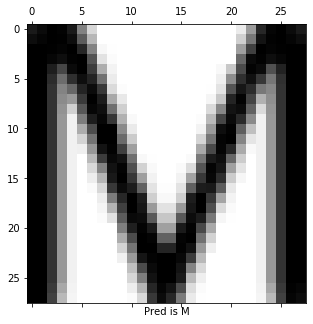

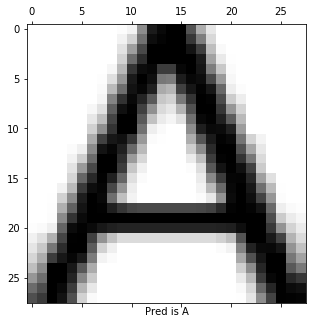

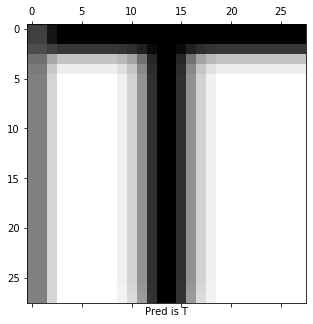

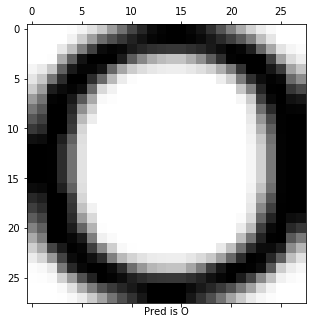

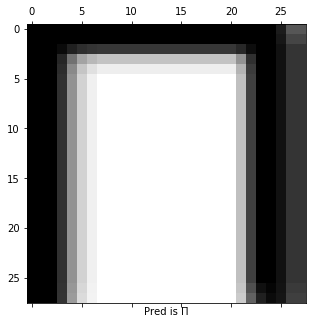

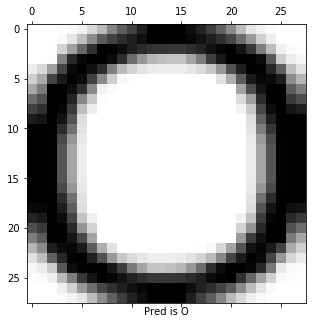

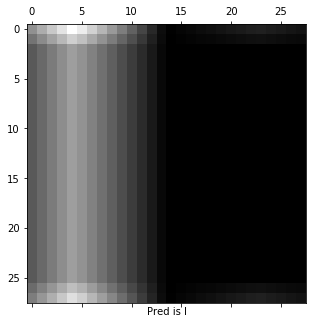

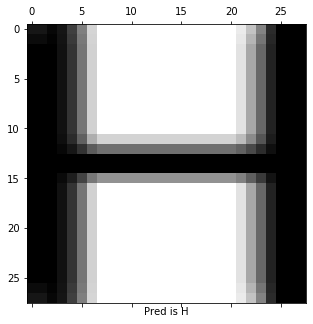

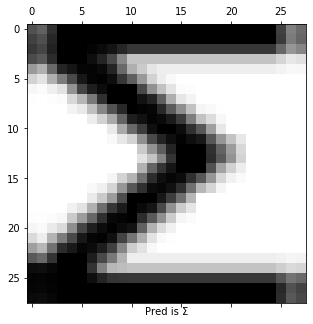

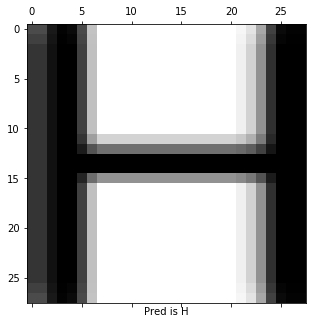

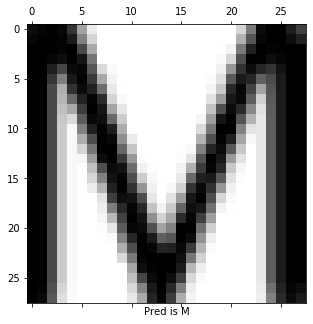

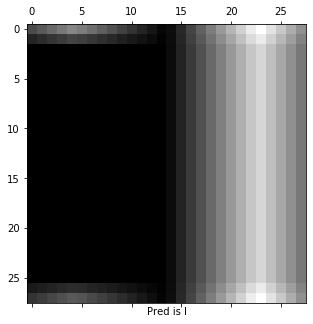

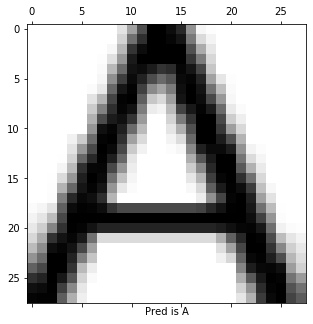

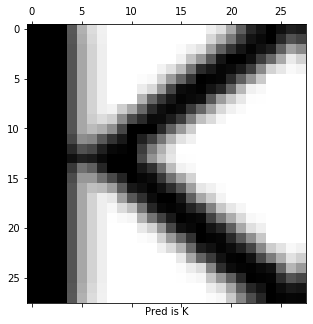

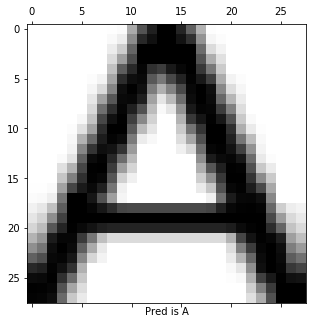

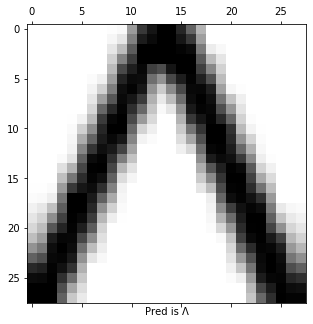

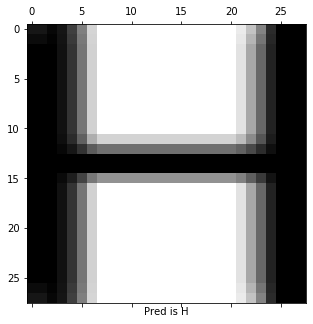

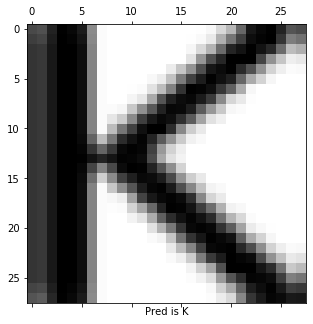

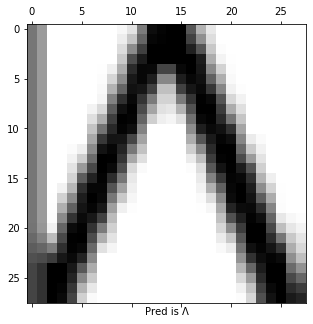

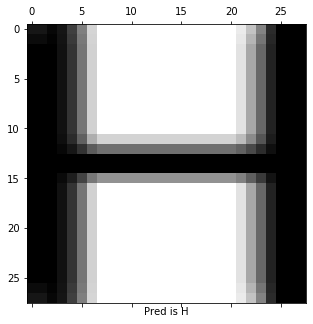

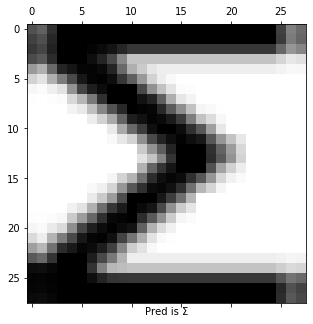

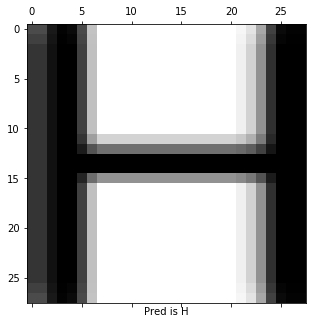

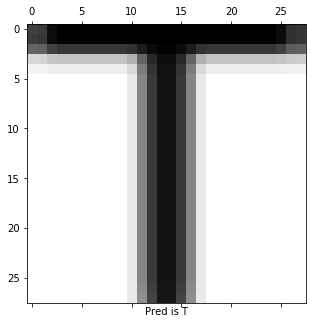

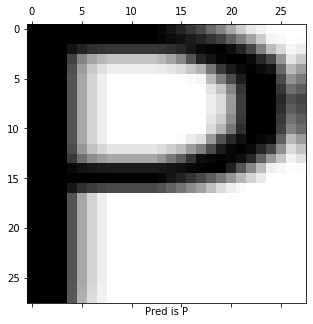

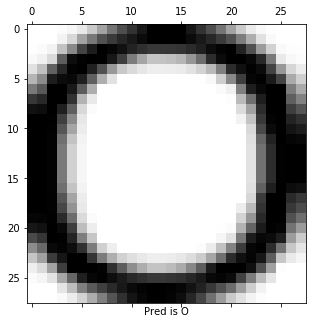

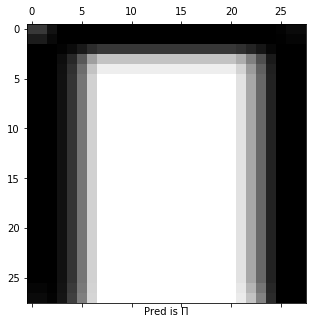

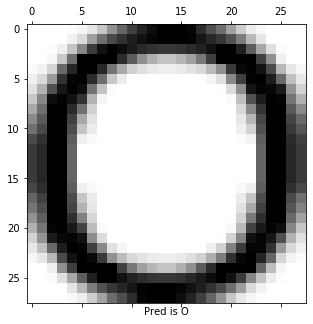

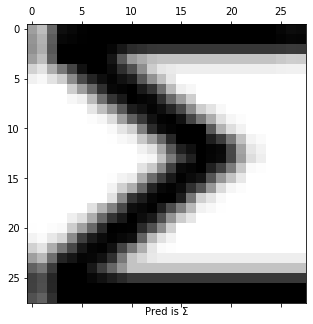

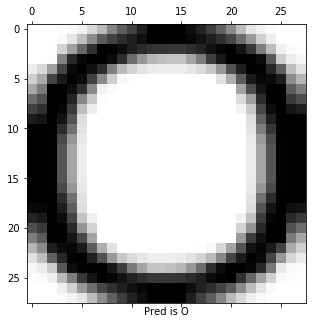

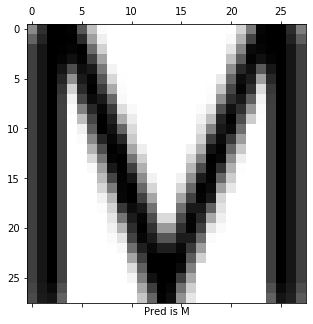

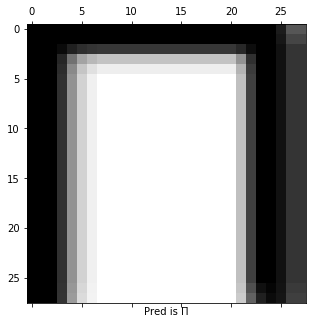

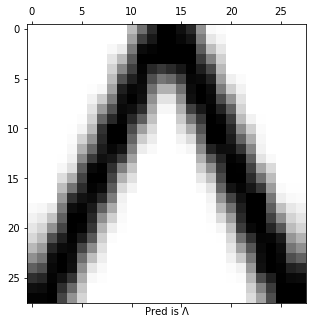

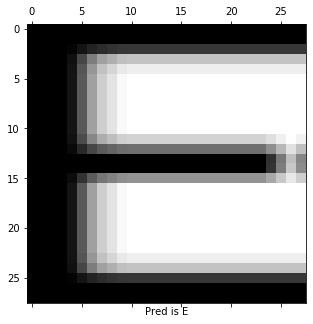

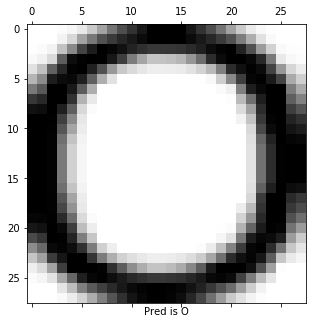

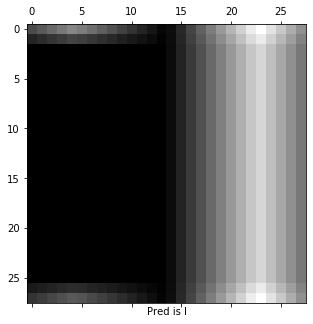

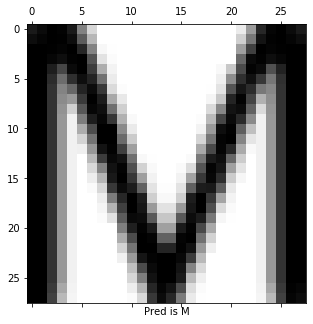

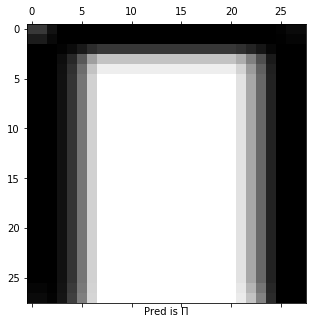

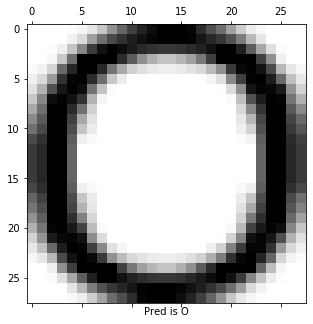

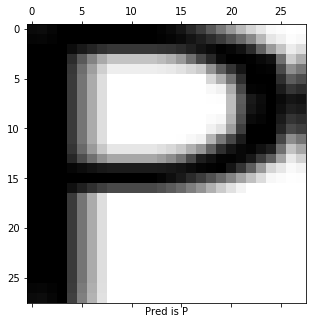

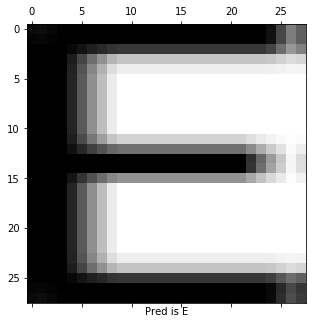

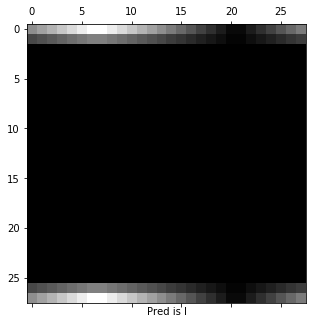

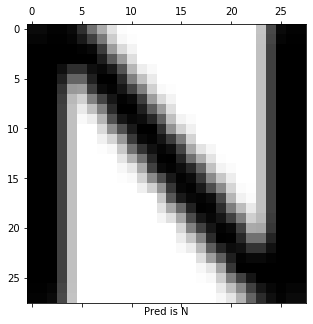

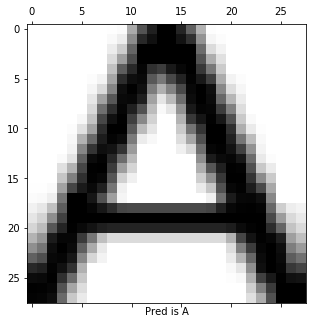

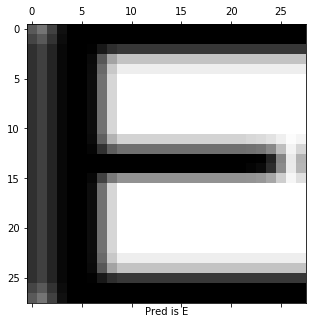

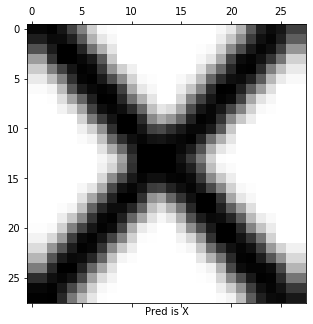

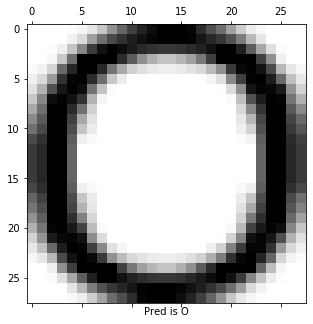

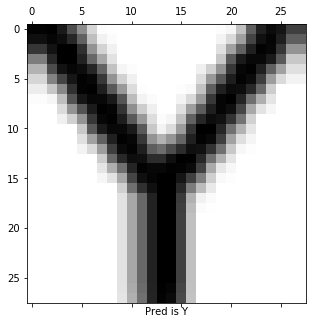

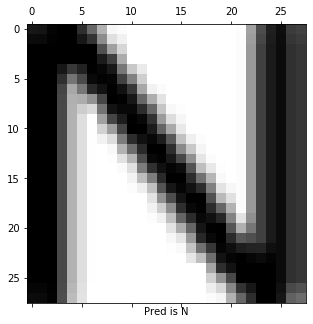

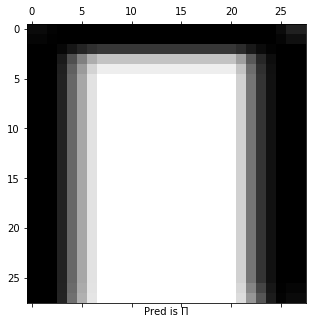

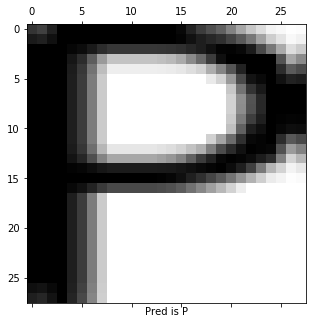

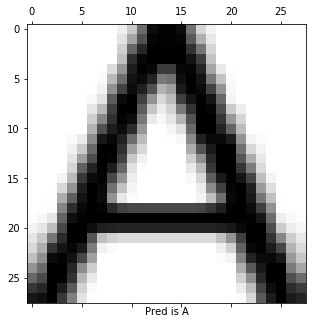

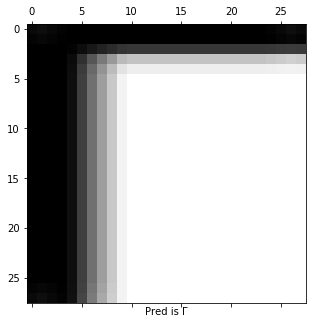

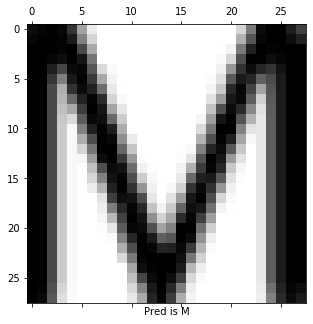

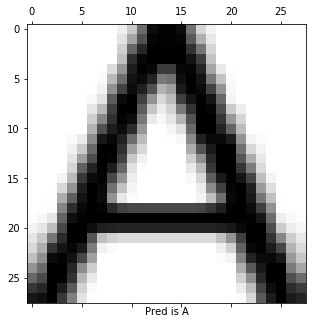

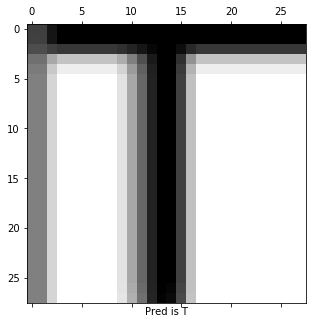

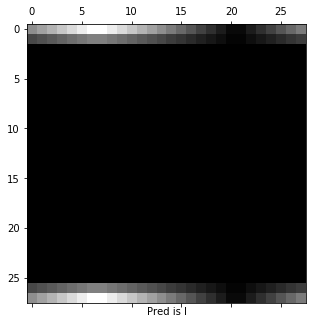

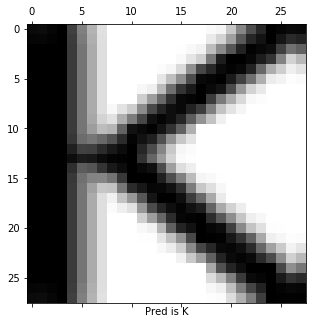

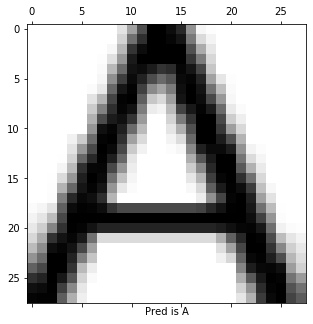

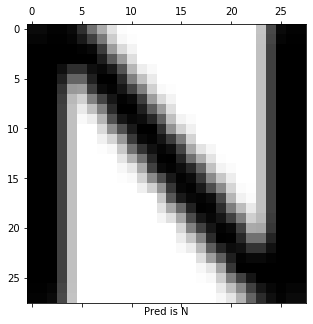

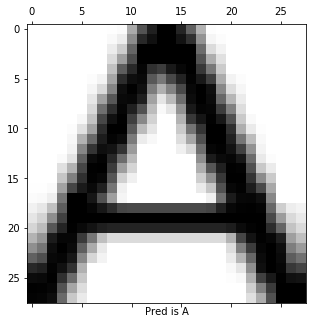

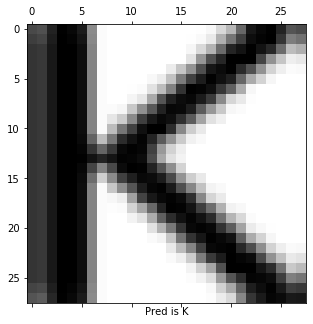

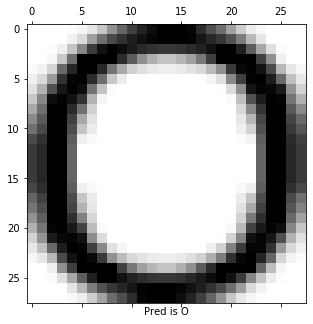

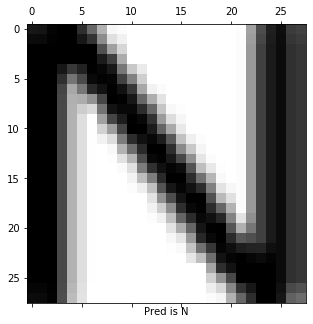

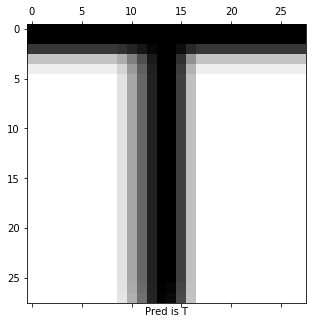

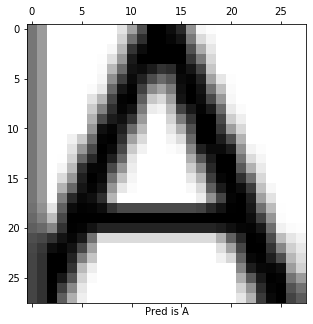

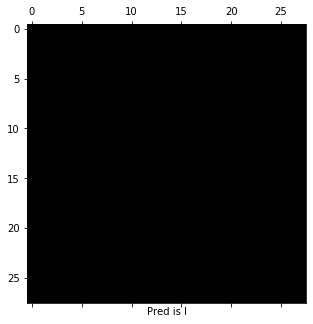

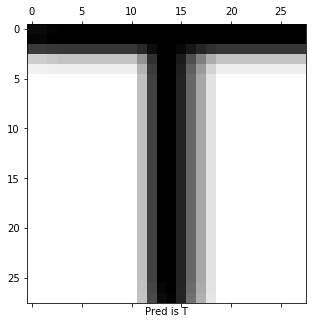

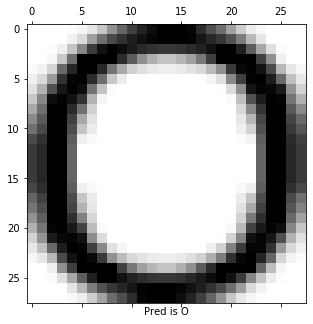

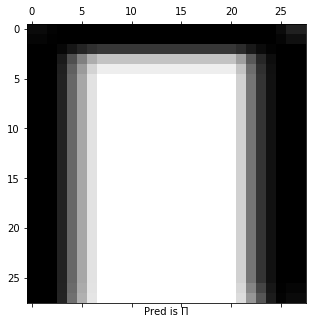

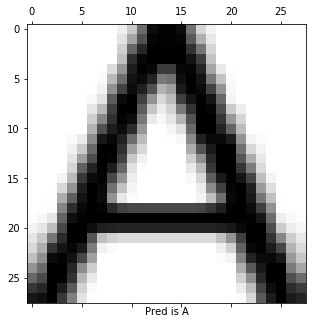

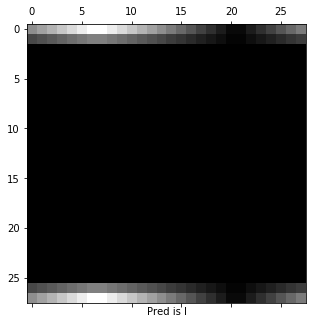

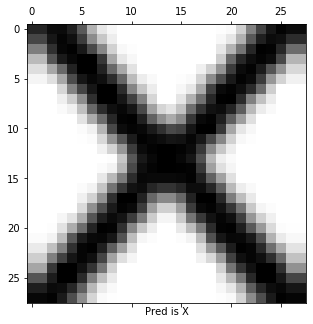

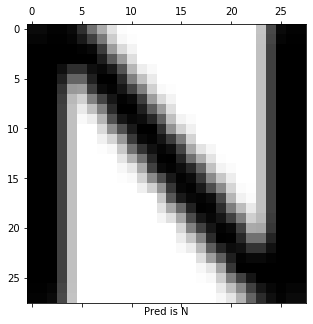

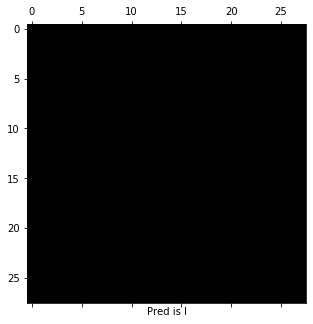

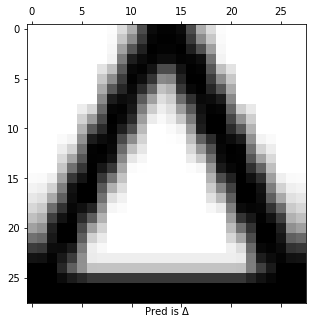

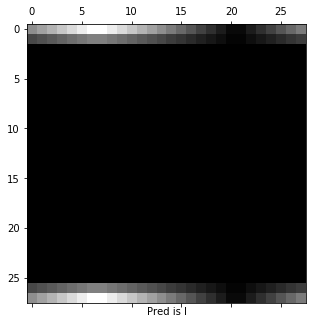

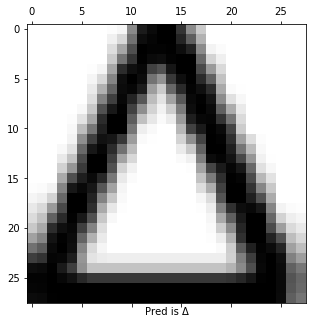

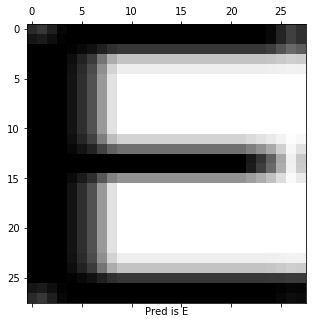

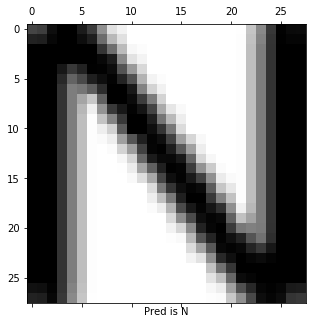

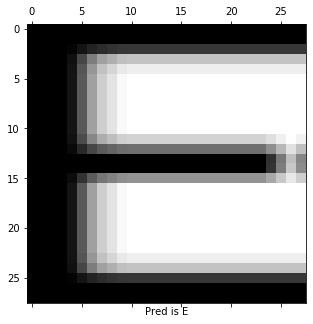

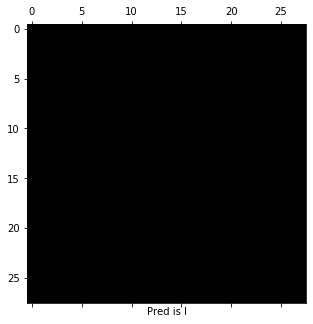

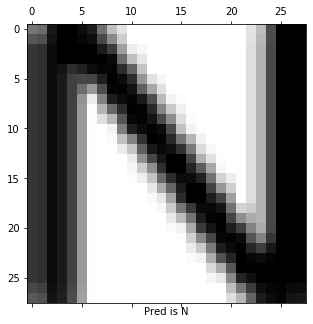

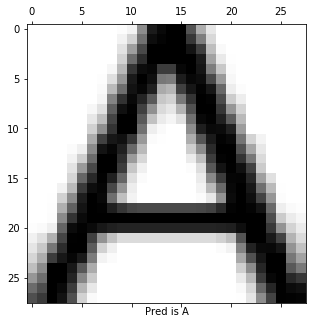

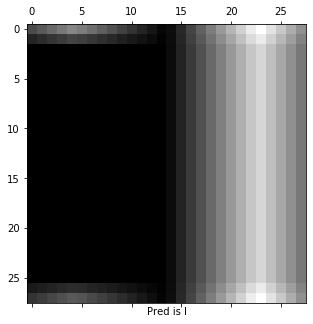

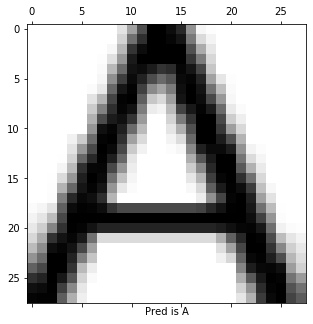

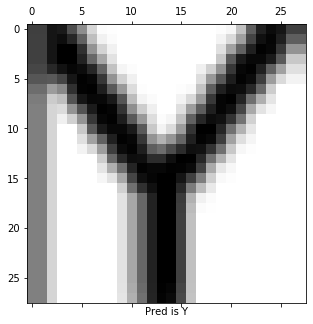

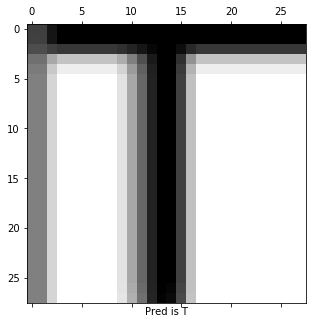

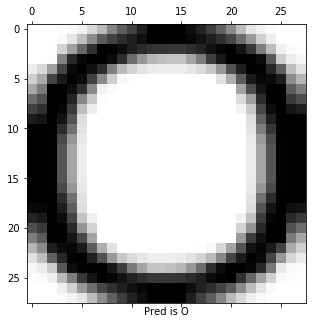

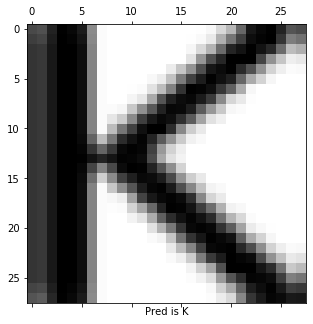

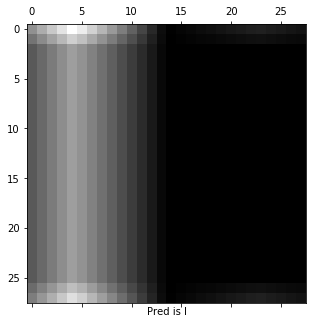

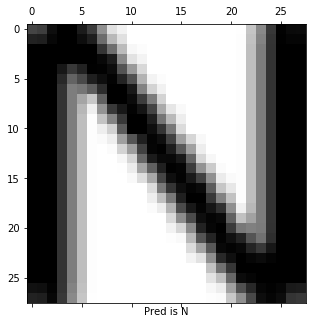

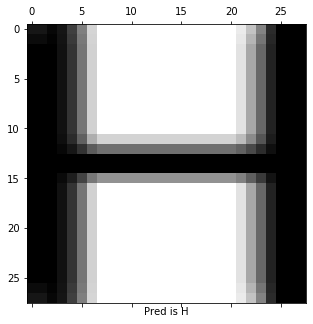

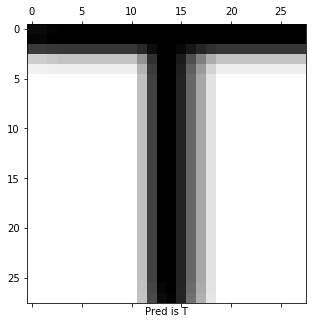

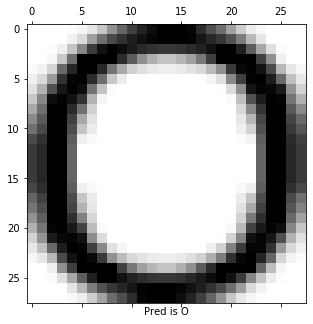

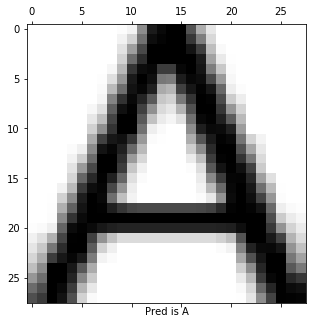

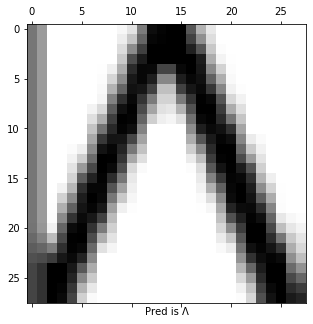

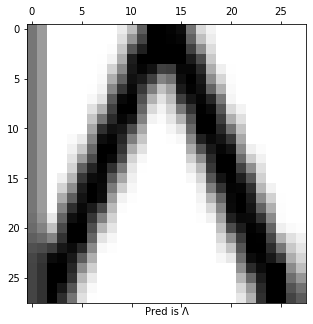

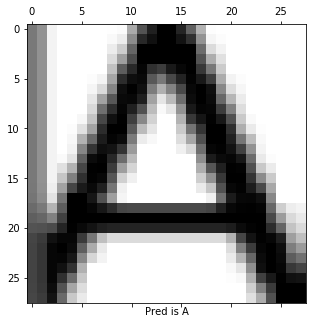

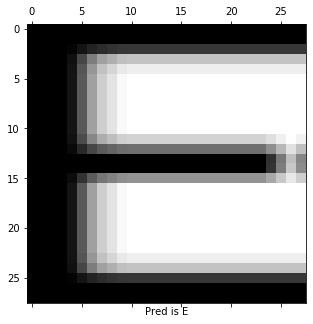

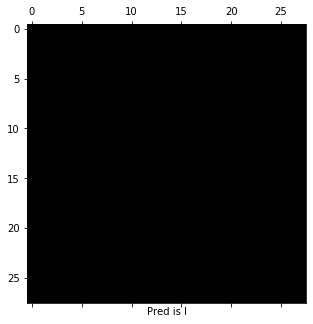

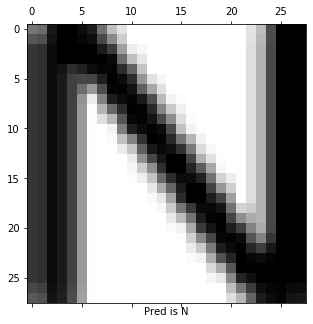

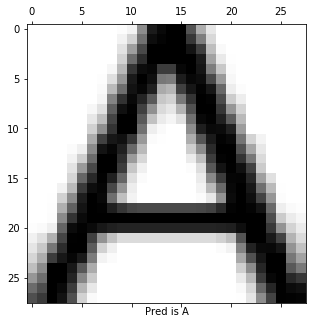

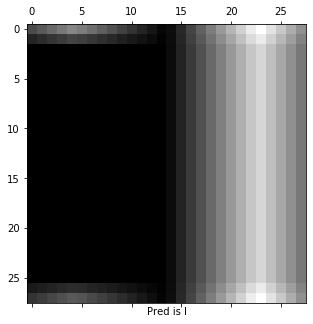

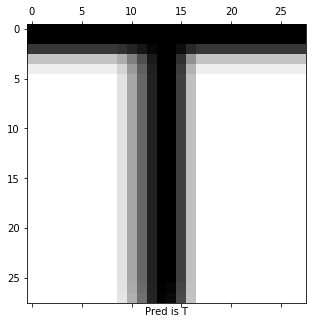

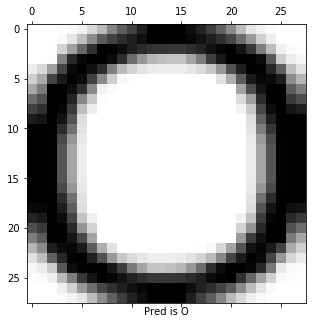

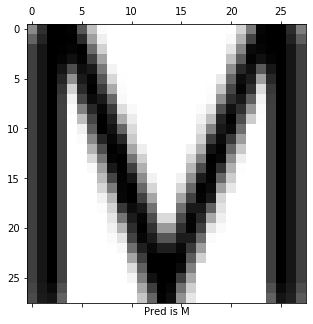

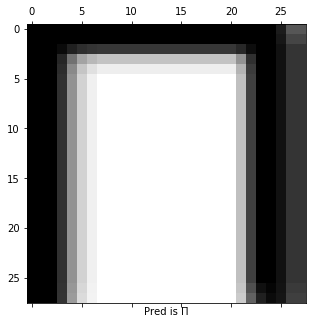

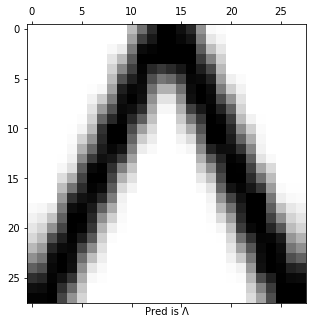

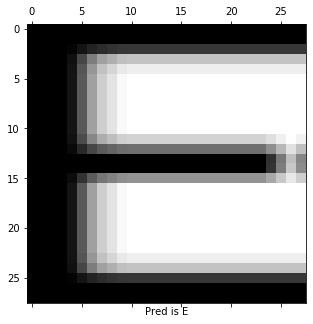

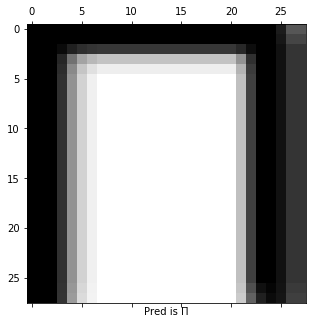

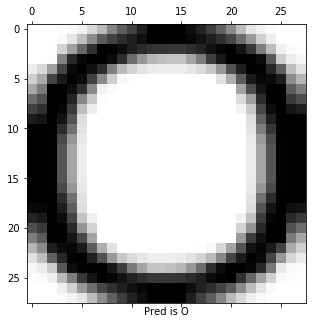

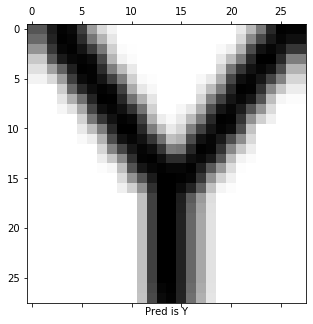

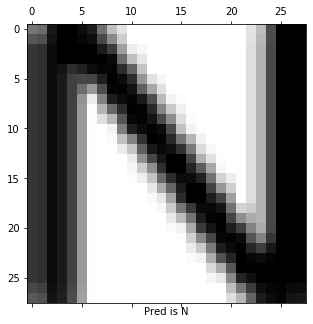

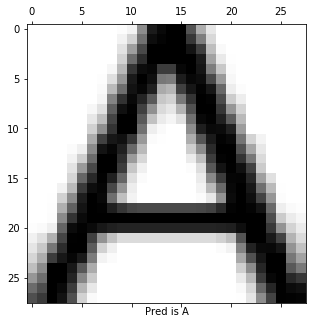

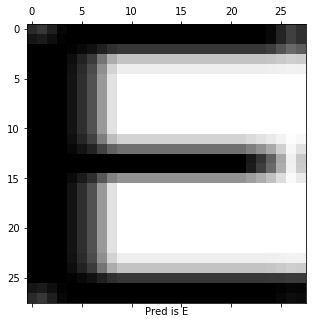

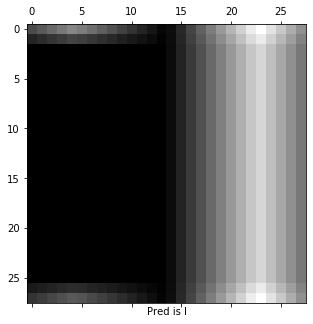

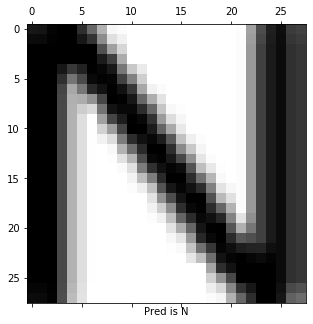

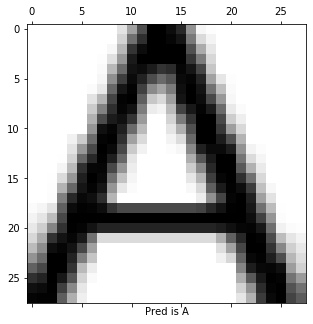

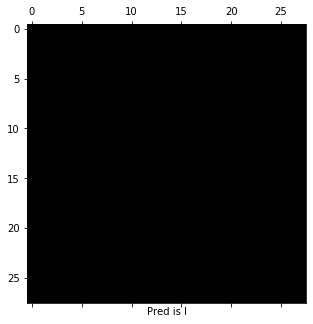

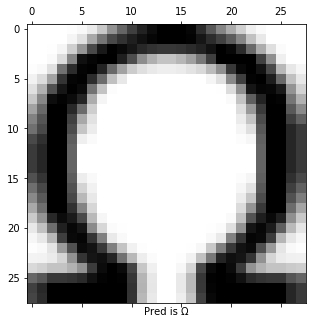

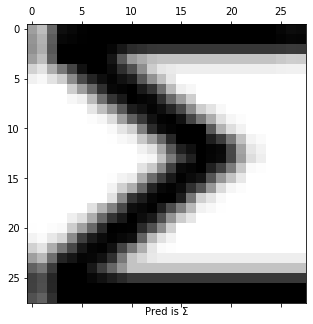

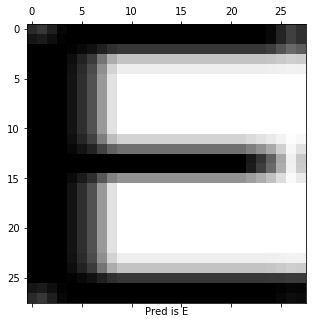

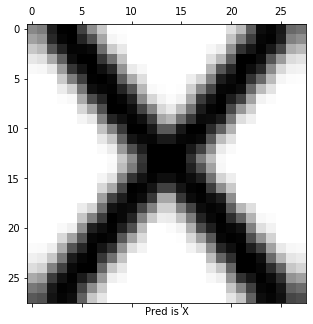

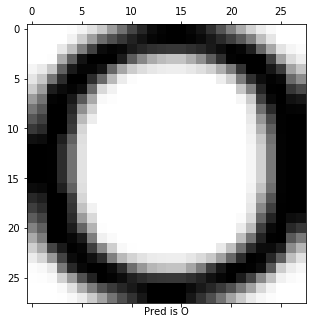

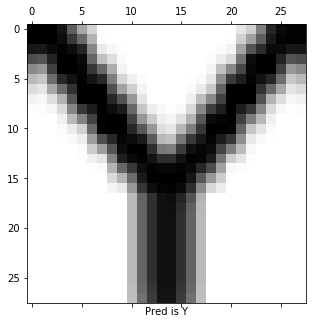

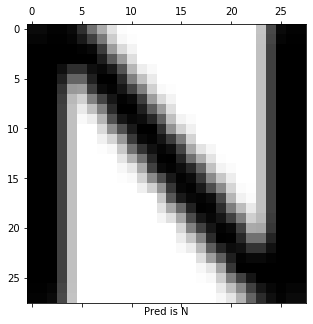

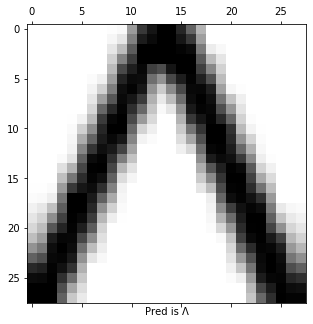

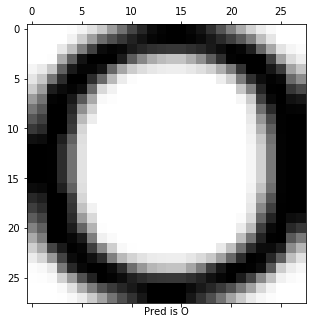

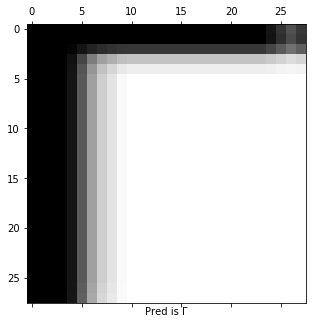

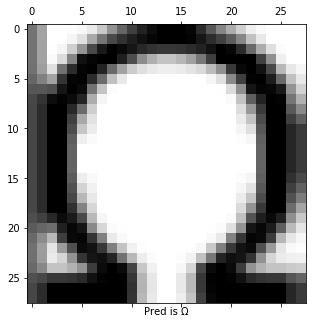

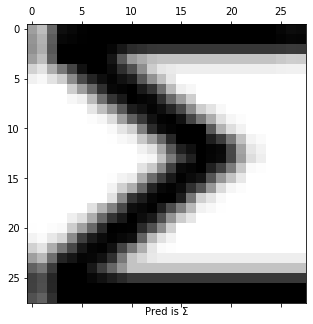

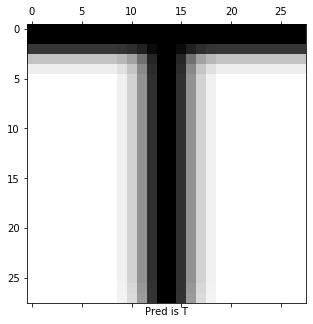

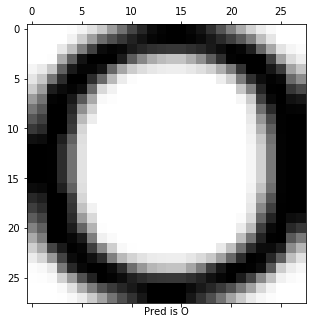

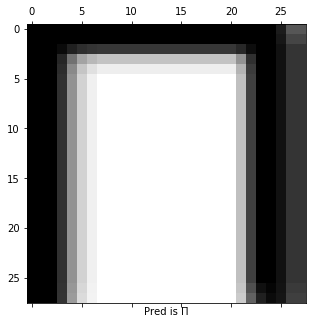

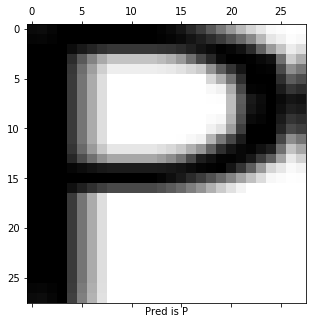

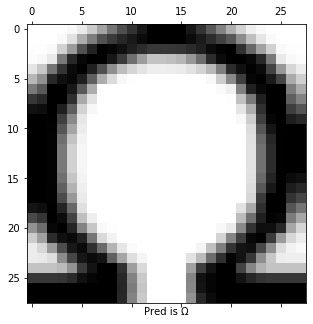

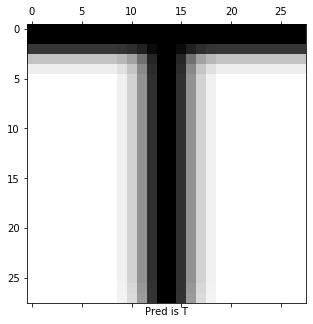

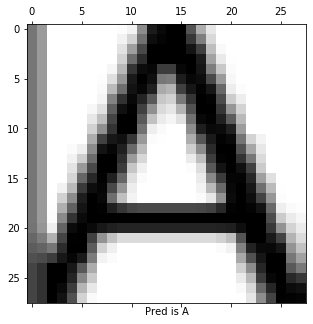

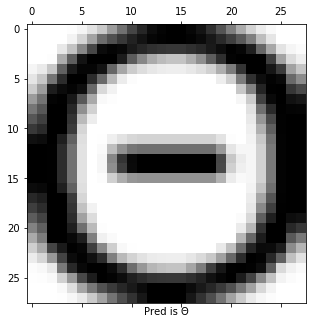

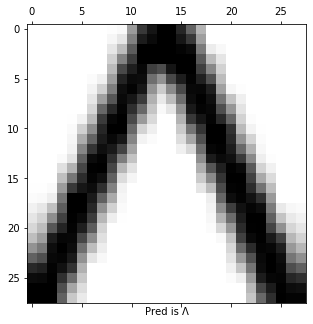

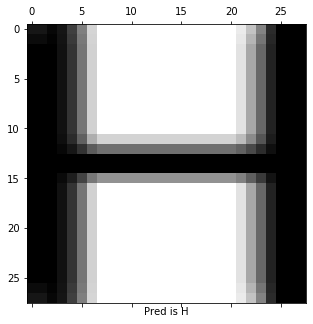

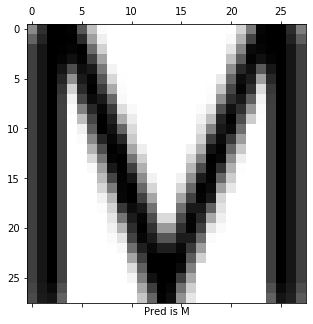

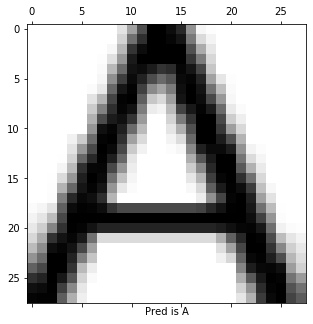

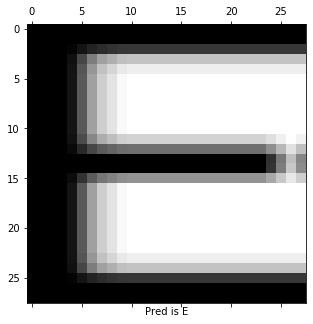

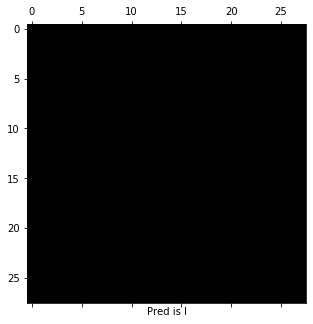

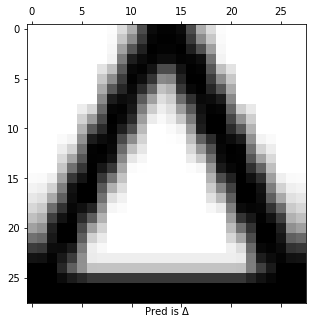

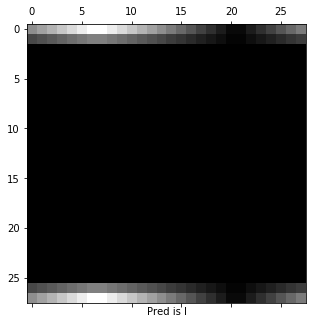

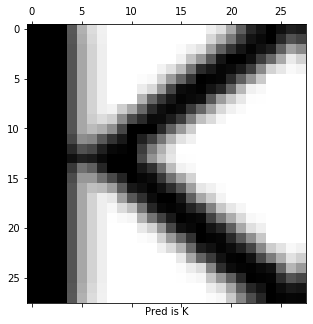

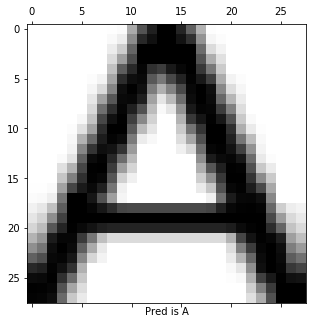

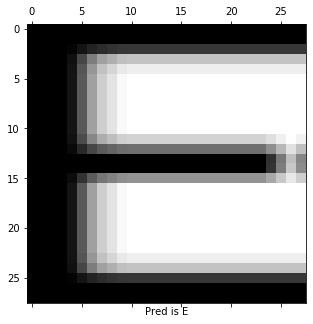

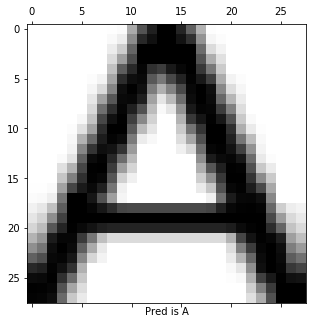

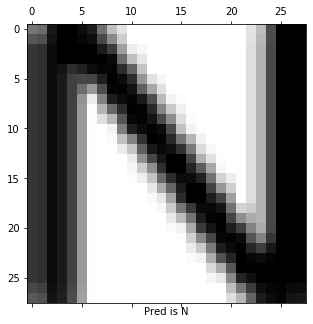

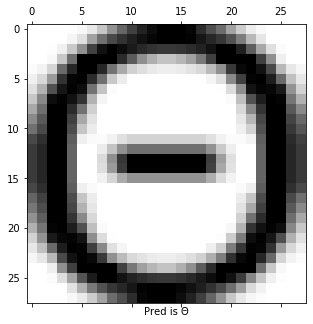

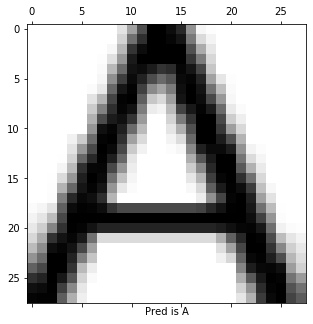

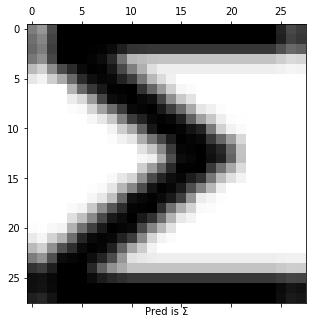

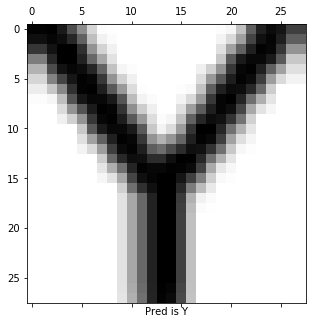

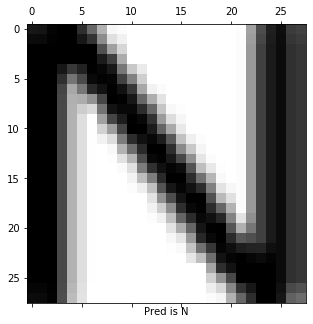

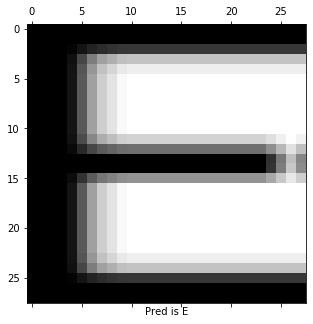

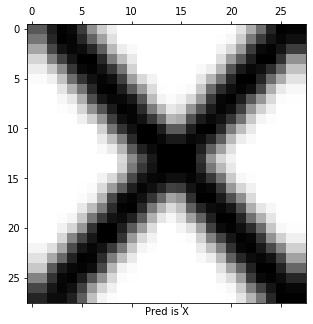

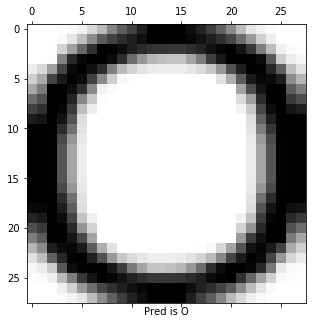

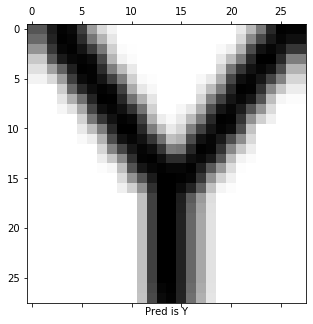

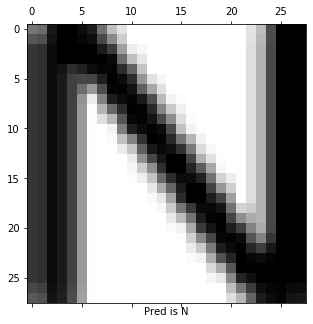

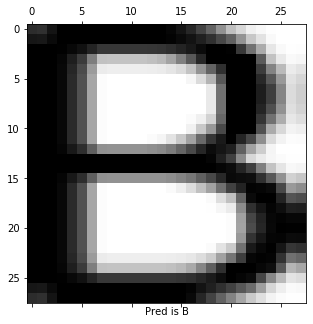

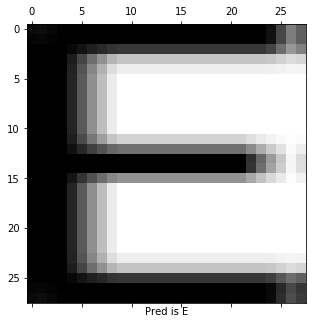

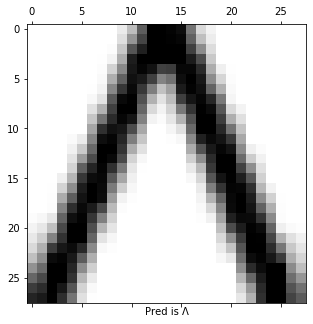

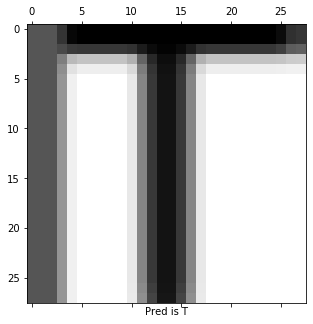

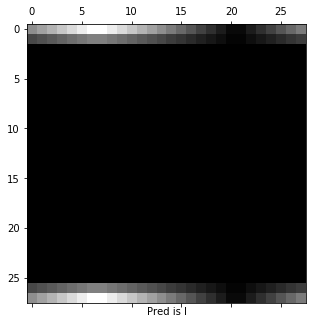

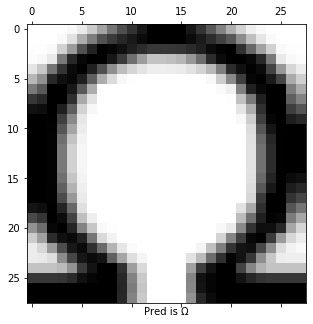

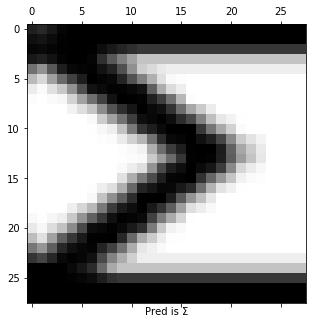

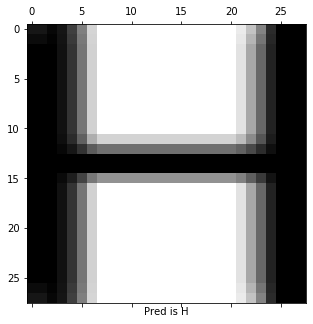

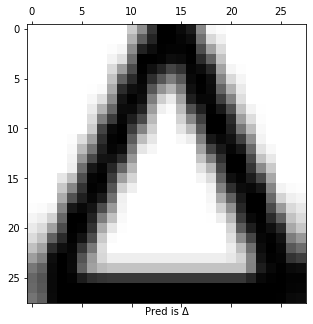

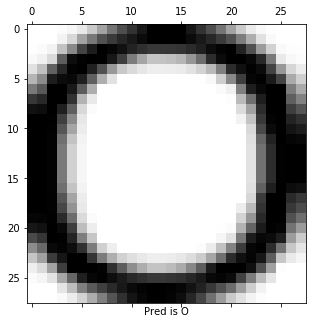

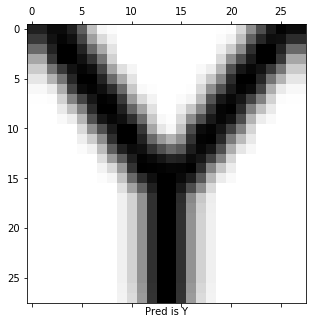

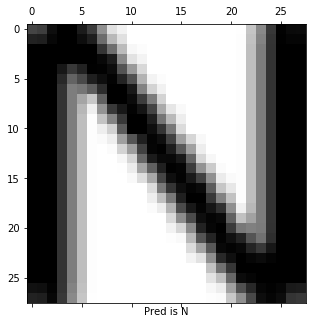

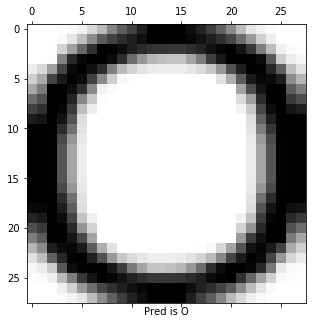

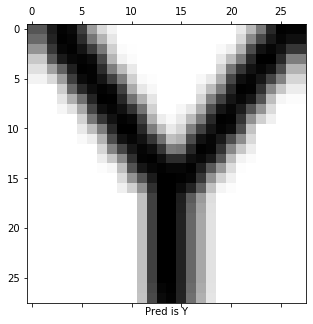

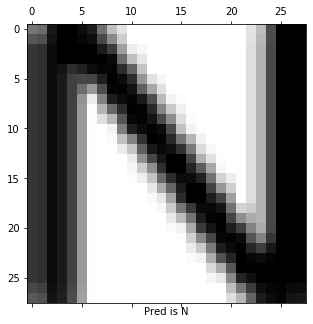

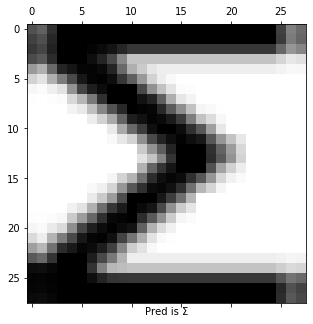

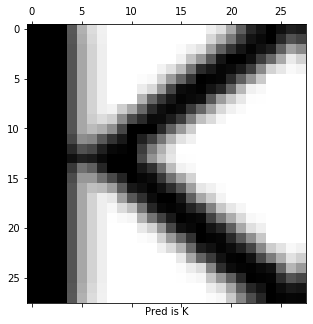

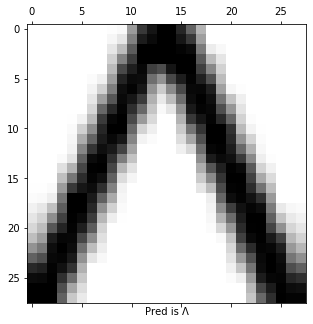

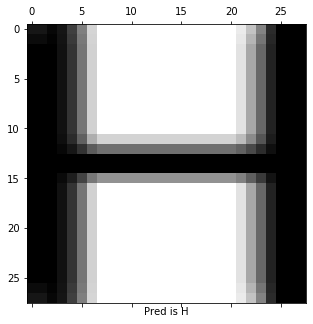

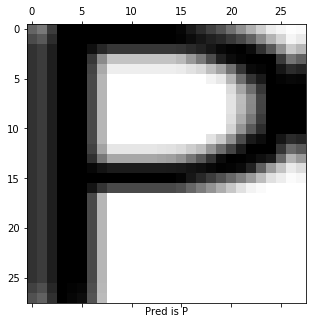

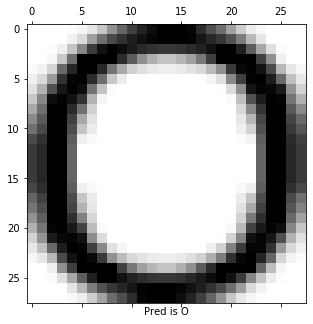

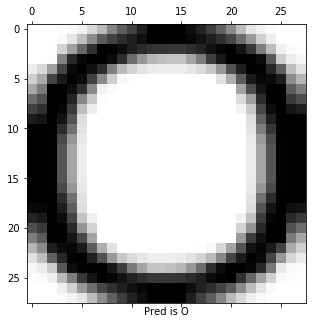

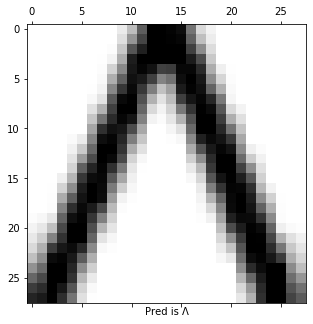

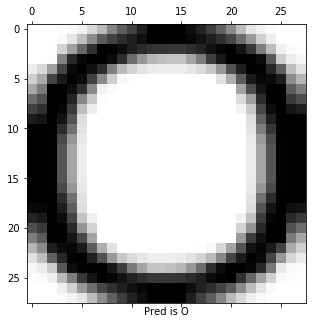

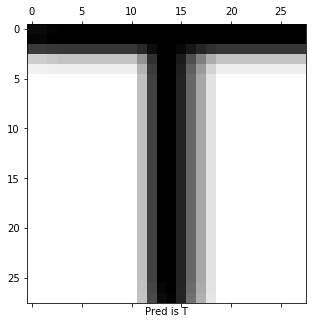

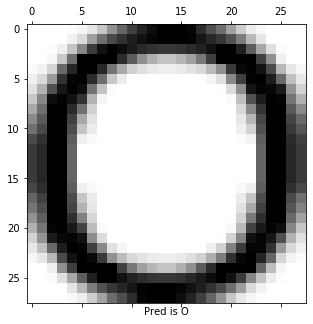

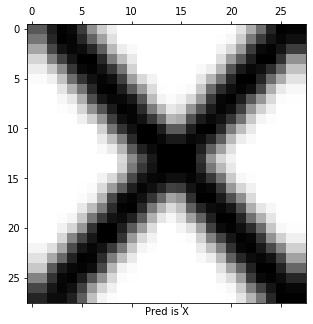

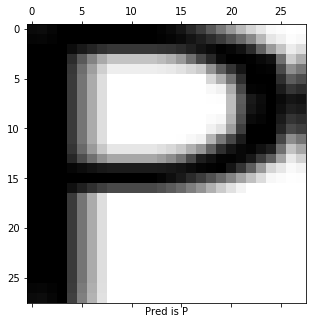

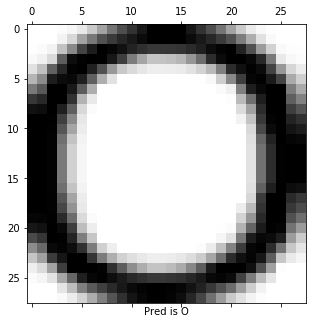

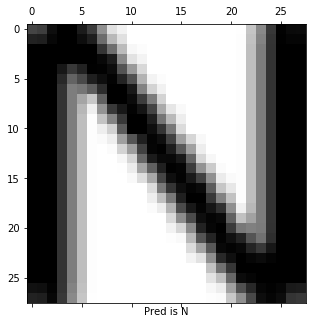

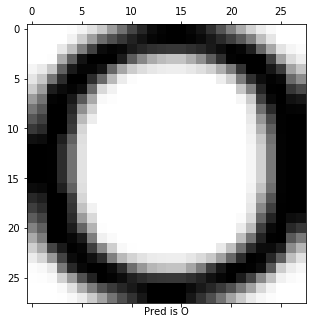

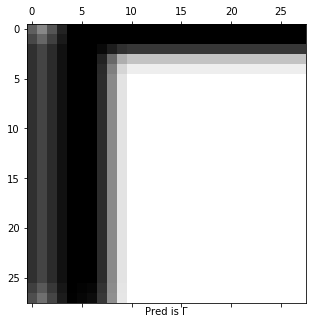

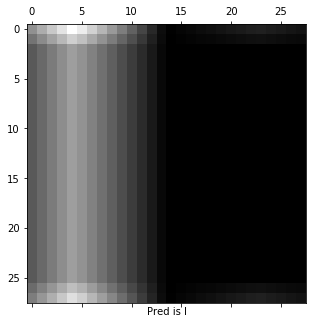

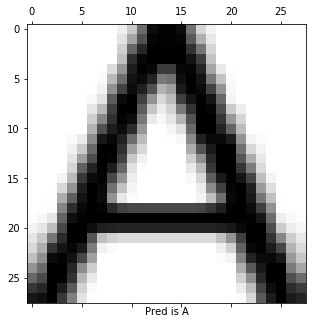

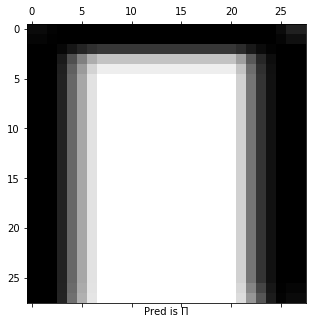

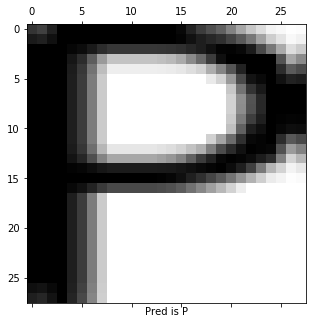

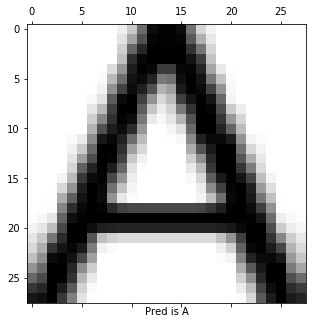

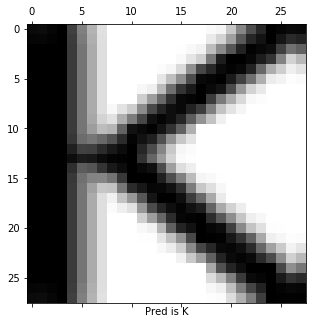

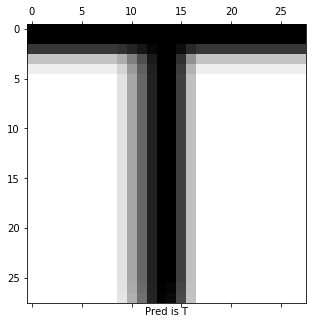

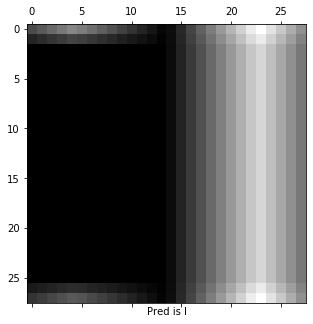

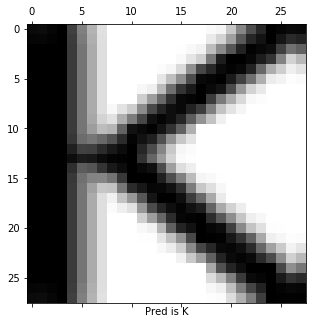

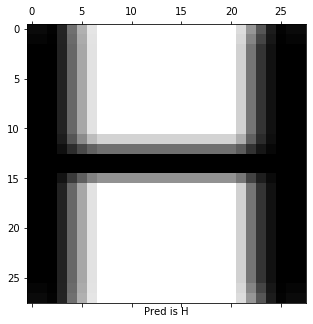

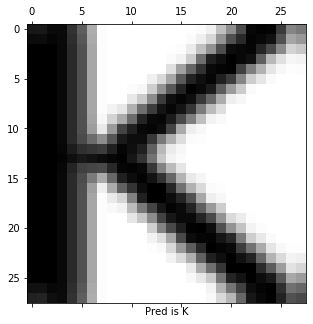

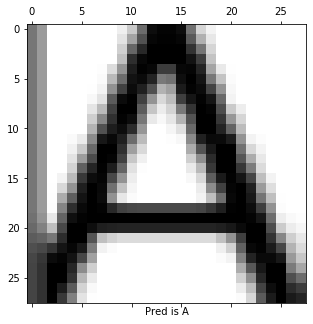

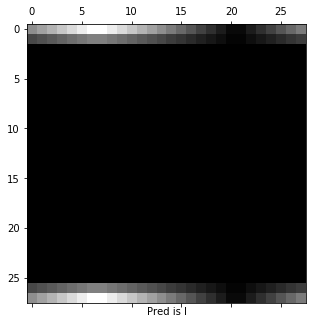

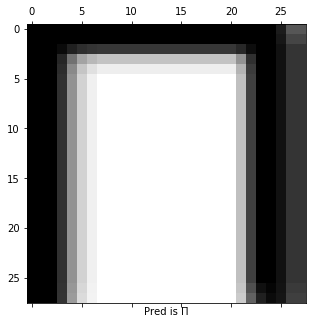

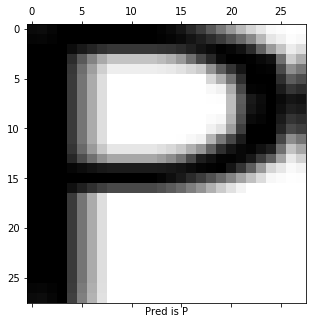

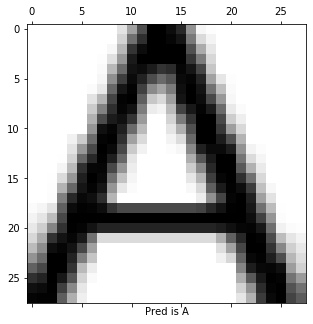

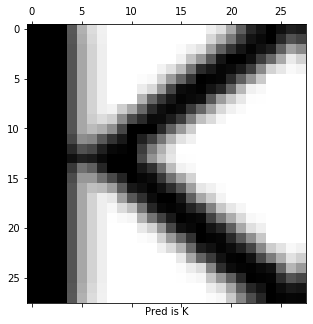

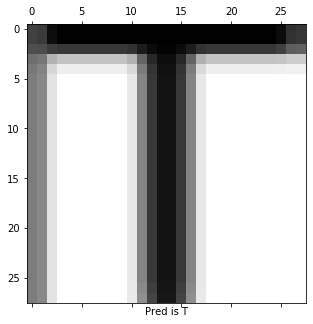

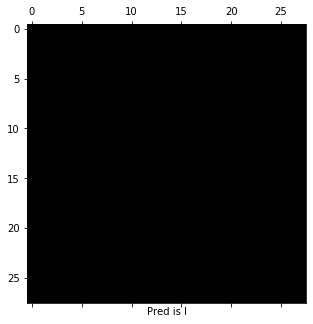

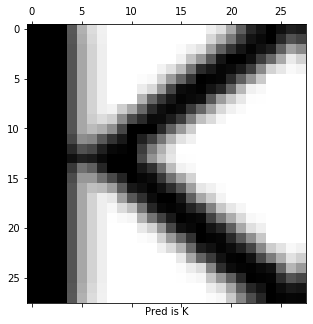

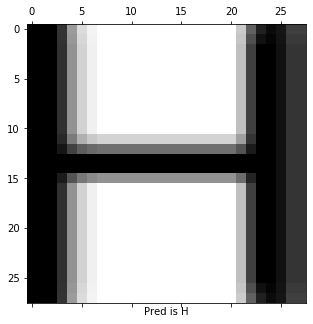

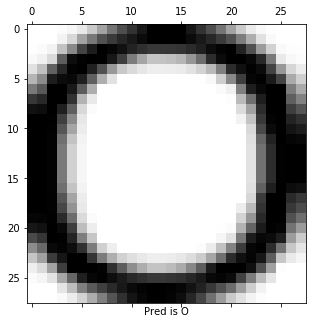

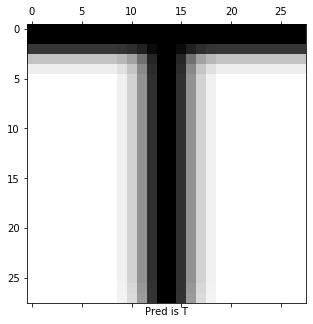

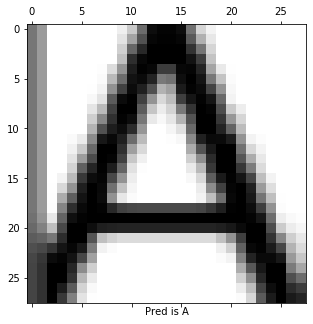

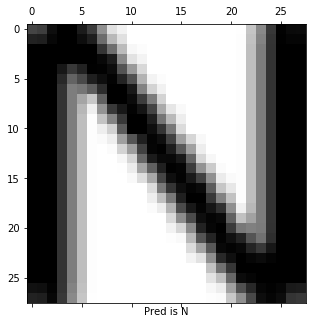

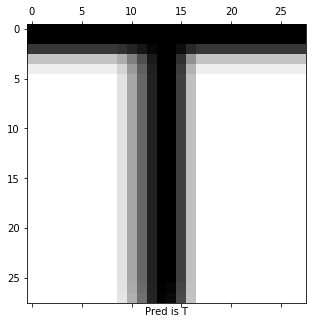

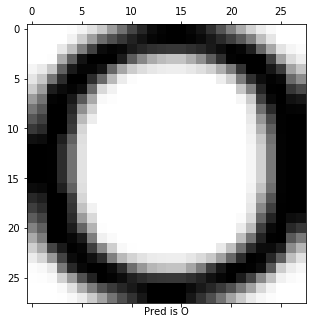

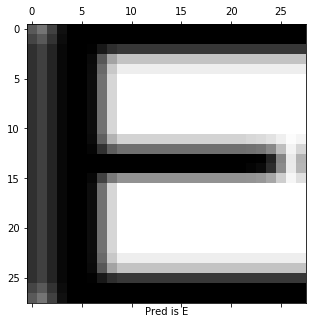

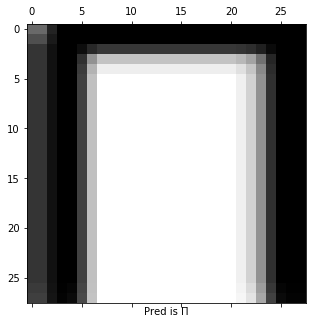

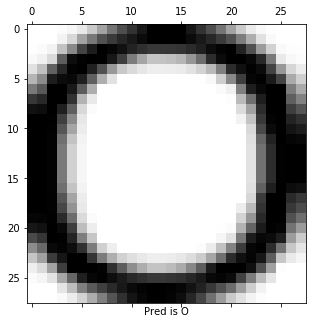

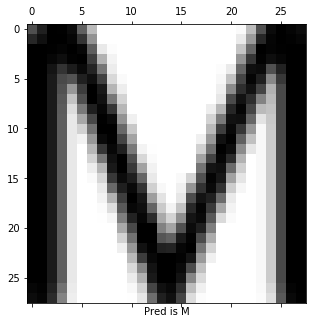

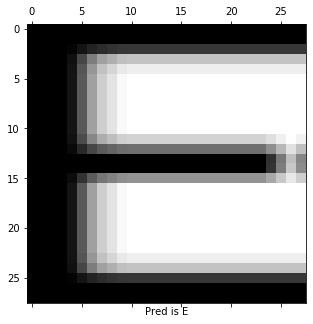

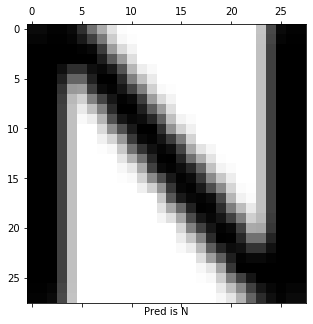

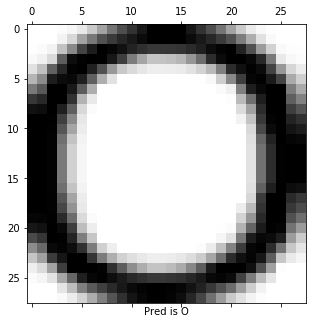

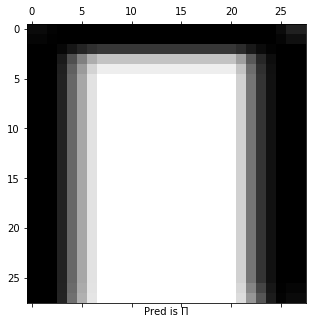

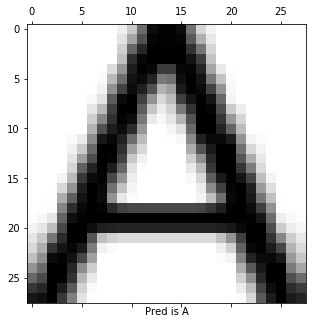

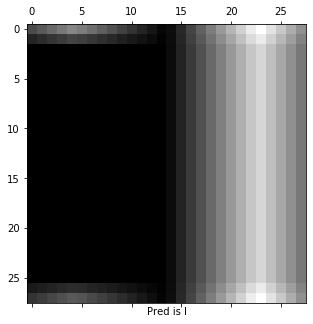

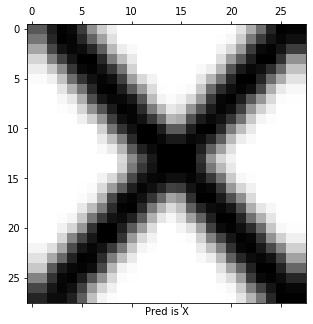

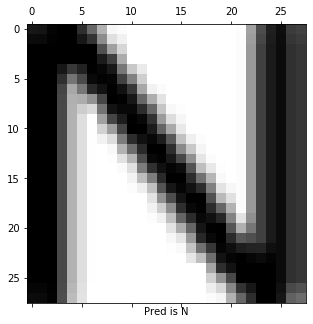

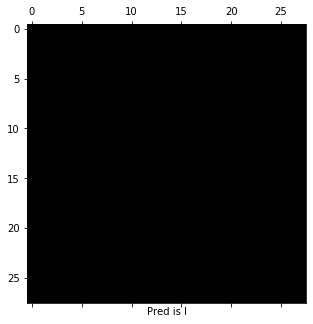

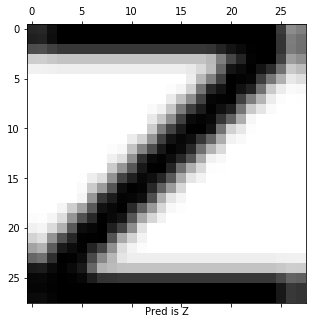

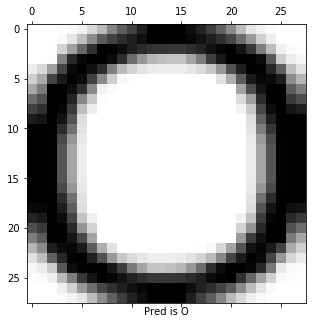

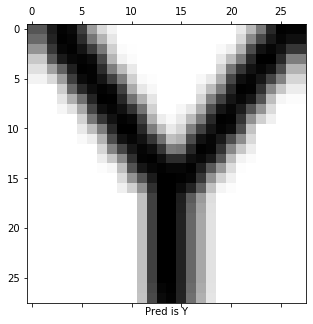

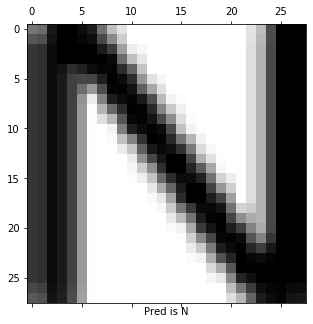

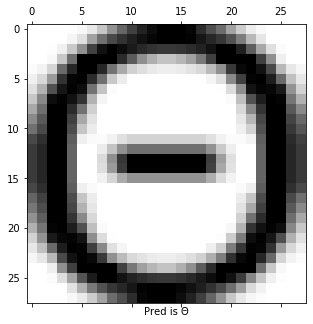

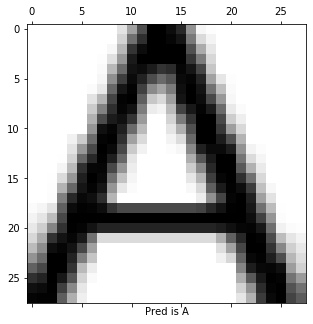

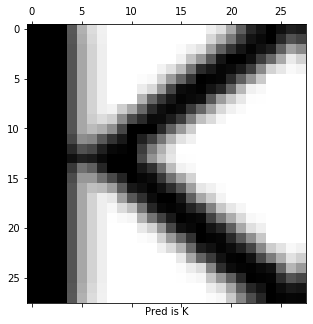

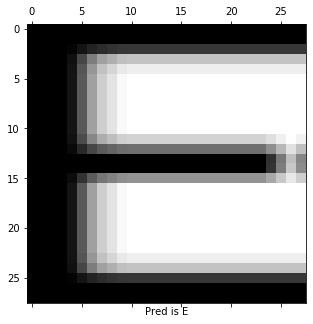

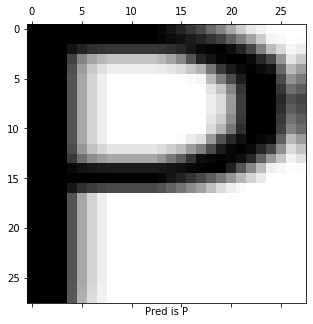

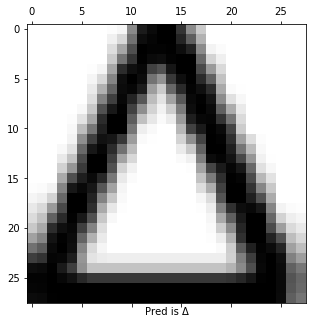

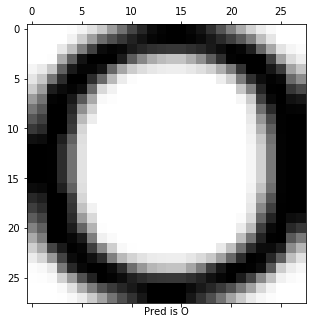

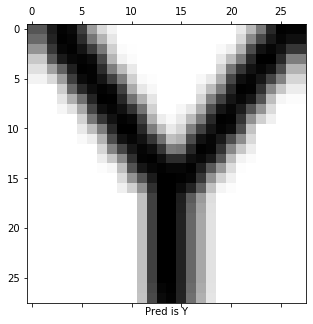

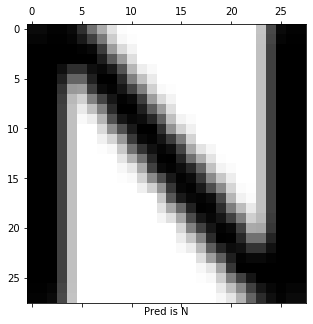

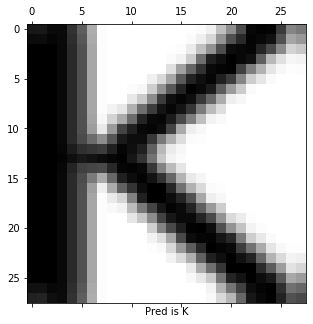

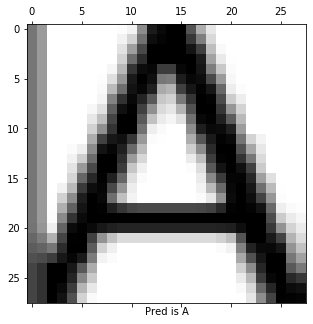

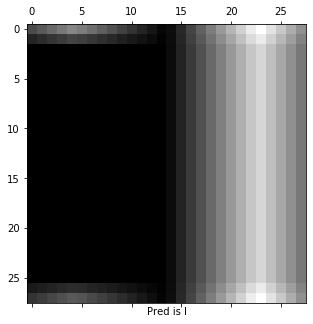

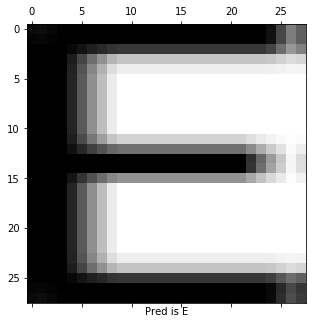

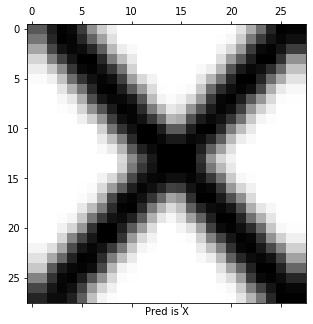

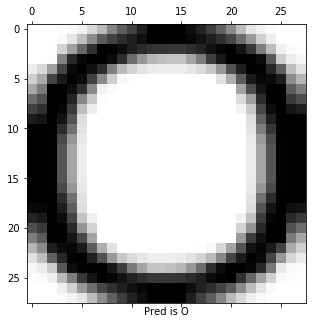

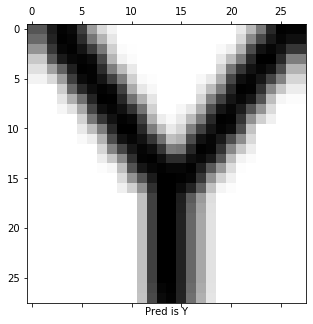

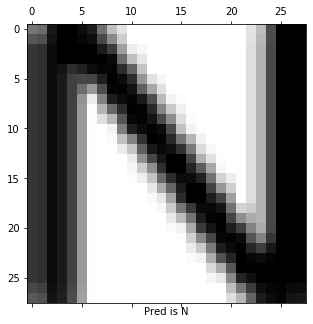

In [34]:
for i in range(0, segments.shape[0]):
    plt.matshow(segments[i], cmap = 'gray')
    plt.xlabel('Pred is ' + y_pred[i])

In [35]:
print(str(test_target))
print(' ')
print(str(y_pred))

['Η' 'Ο' 'Μ' 'Α' 'Δ' 'Α' 'Π' 'Α' 'Ι' 'Χ' 'Ν' 'Ι' 'Ζ' 'Ε' 'Ι' 'Τ' 'Ο' 'Π'
 'Ρ' 'Ω' 'Τ' 'Ο' 'Π' 'Α' 'Ι' 'Χ' 'Ν' 'Ι' 'Δ' 'Ι' 'Ο' 'Μ' 'Π' 'Α' 'Σ' 'Κ'
 'Ε' 'Λ' 'Τ' 'Ο' 'Υ' 'Τ' 'Η' 'Σ' 'Ν' 'Ε' 'Α' 'Σ' 'Ε' 'Π' 'Ο' 'Χ' 'Η' 'Σ'
 'Π' 'Ι' 'Σ' 'Ω' 'Α' 'Υ' 'Τ' 'Ο' 'Ε' 'Ι' 'Ν' 'Α' 'Ι' 'Τ' 'Ο' 'Π' 'Ε' 'Ρ'
 'Ι' 'Σ' 'Σ' 'Ο' 'Τ' 'Ε' 'Ρ' 'Ο' 'Γ' 'Ι' 'Α' 'Τ' 'Ο' 'Π' 'Ε' 'Ρ' 'Ι' 'Σ'
 'Σ' 'Ο' 'Τ' 'Ε' 'Ρ' 'Ο' 'Τ' 'Ο' 'Υ' 'Χ' 'Α' 'Ν' 'Ο' 'Υ' 'Ν' 'Ε' 'Ν' 'Α'
 'Ν' 'Α' 'Ρ' 'Ι' 'Σ' 'Τ' 'Η' 'Ο' 'Μ' 'Α' 'Δ' 'Α' 'Π' 'Ο' 'Υ' 'Ε' 'Χ' 'Ε'
 'Ι' 'Κ' 'Ο' 'Ν' 'Τ' 'Α' 'Σ' 'Τ' 'Ο' 'Π' 'Ρ' 'Ω' 'Τ' 'Ο' 'Τ' 'Υ' 'Π' 'Ο'
 'Τ' 'Η' 'Ν' 'Ο' 'Μ' 'Α' 'Δ' 'Α' 'Π' 'Ο' 'Υ' 'Ε' 'Ι' 'Ν' 'Α' 'Ι' 'Δ' 'Υ'
 'Ν' 'Α' 'Τ' 'Ο' 'Π' 'Α' 'Ι' 'Χ' 'Ν' 'Ι' 'Δ' 'Ι' 'Τ' 'Ο' 'Π' 'Α' 'Ι' 'Χ'
 'Ν' 'Ι' 'Δ' 'Ι' 'Η' 'Ο' 'Μ' 'Α' 'Δ' 'Α' 'Π' 'Ε' 'Ρ' 'Ι' 'Σ' 'Σ' 'Ο' 'Τ'
 'Ε' 'Ρ' 'Α' 'Χ' 'Ο' 'Ρ' 'Η' 'Γ' 'Ε' 'Ι' 'Ε' 'Σ' 'Κ' 'Α' 'Ι' 'Σ' 'Κ' 'Ο'
 'Ρ' 'Ε' 'Ι' 'Ο' 'Κ' 'Τ' 'Ω' 'Ο' 'Κ' 'Τ' 'Ι' 'Ε' 'Ι' 'Ν' 'Α' 'Ι' 'Α' 'Ρ'
 'Ι' 'Σ' 'Τ' 'Ε' 'Ρ' 'Α' 'Δ' 'Υ' 'Ο' 'Δ' 'Υ' 'Ο' 'Π